In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [7]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

s = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_1.xlsx')
s.set_index('year_month', inplace=True)
v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)
o = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_7.xlsx')
o.set_index('year_month', inplace=True)

In [8]:
df['Abstraction'] = w['Usage']
df['2526CC00033'] = s[' 2526CC00033']
df['D4N0127'] = s[' D4N0127']
df['D4N0146'] = s[' D4N0146']
df['D4N0147'] = s[' D4N0147']
df['D4N0148'] = s[' D4N0148']

In [9]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  2526CC00033  D4N0127  \
year_month                                                                
1950-01-01                NaN                 NaN          NaN      NaN   
1950-02-01                NaN                 NaN          NaN      NaN   
1950-03-01                NaN                 NaN          NaN      NaN   
1950-04-01                NaN                 NaN          NaN      NaN   
1950-05-01                NaN                 NaN          NaN      NaN   
...                       ...                 ...          ...      ...   
2019-08-01                NaN                 NaN     14.04337      NaN   
2019-09-01                NaN                 NaN     14.04000      NaN   
2019-10-01                NaN                 NaN          NaN      NaN   
2019-11-01                NaN                 NaN          NaN      NaN   
2019-12-01                NaN                 NaN          NaN      NaN   

            D4N0146  D4N0147  D4N0148  
year_month                             
1950-01-01      NaN      NaN      NaN  
1950-02-01      NaN      NaN      NaN  
1950-03-01      NaN      NaN      NaN  
1950-04-01      NaN      NaN      NaN  
1950-05-01      NaN      NaN      NaN  
...             ...      ...      ...  
2019-08-01      NaN      NaN      NaN  
2019-09-01      NaN  

In [10]:
df = df[['2526CC00033' ,'D4N0127','D4N0146' ,'D4N0147' ,'D4N0148','Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [11]:
df

2526CC00033  D4N0127  D4N0146  D4N0147  D4N0148  Temperature  \
year_month                                                                 
1950-01-01          NaN      NaN      NaN      NaN      NaN        23.90   
1950-02-01          NaN      NaN      NaN      NaN      NaN        25.10   
1950-03-01          NaN      NaN      NaN      NaN      NaN        23.75   
1950-04-01          NaN      NaN      NaN      NaN      NaN        19.65   
1950-05-01          NaN      NaN      NaN      NaN      NaN        14.60   
...                 ...      ...      ...      ...      ...          ...   
2019-08-01     14.04337      NaN      NaN      NaN      NaN          NaN   
2019-09-01     14.04000      NaN      NaN      NaN      NaN          NaN   
2019-10-01          NaN      NaN      NaN      NaN      NaN          NaN   
2019-11-01          NaN      NaN      NaN      NaN      NaN          NaN   
2019-12-01          NaN      NaN      NaN      NaN      NaN          NaN   

            precip_trend  Discharge  Abstraction  
year_month                                        
1950-01-01           NaN        NaN          NaN  
1950-02-01           NaN        NaN          NaN  
1950-03-01           NaN        NaN          NaN  
1950-04-01           NaN        NaN          NaN  
1950-05-01           NaN        NaN          NaN  
...                  ...        ...          ...  
2019-08-01           NaN        NaN          NaN  
2019-09-01           NaN        NaN          NaN  
2019-10-01           NaN        NaN          NaN  
2019-11-01           NaN        NaN          NaN  
2019-12-01           NaN        NaN          NaN  

[840 rows x 9 columns]

In [12]:
f = lambda x: -x; 
gwls = df[['2526CC00033' ,'D4N0127','D4N0146' ,'D4N0147' ,'D4N0148']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [13]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


2526CC00033    D4N0127    D4N0146    D4N0147    D4N0148
0  1977-01-01 1976-09-01 1977-01-01 1977-01-01 1977-01-01
1  2019-09-01 2005-01-01 2011-11-01 2015-06-01 2019-04-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [14]:

gwls = gwls[gwls.index > '1976-12-01']  
gwls = gwls[gwls.index < '2015-07-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

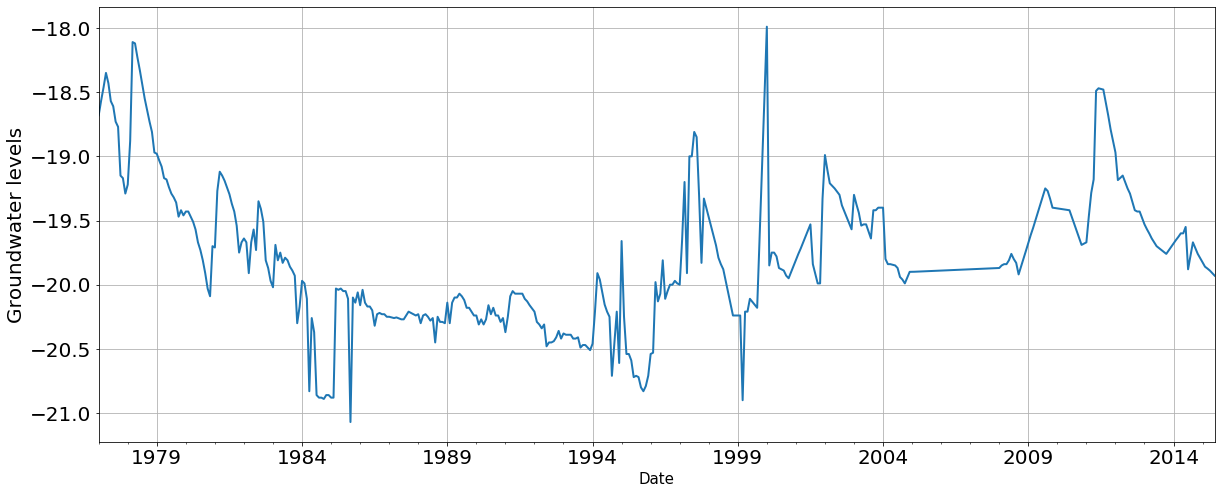

In [15]:
#visual illustration just to show all groundwater levels 

gwls['D4N0147'].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [16]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

2526CC00033  D4N0127  D4N0146    D4N0147    D4N0148  Temperature  \
year_month                                                                     
1977-01-01   -13.290000 -24.9005    -7.31 -18.680000 -31.500000          NaN   
1977-02-01   -13.210000 -23.8700    -7.27 -18.566333 -31.369111        24.40   
1977-03-01   -13.110000 -23.6610    -7.19 -18.463667 -31.250889        20.70   
1977-04-01   -13.120000 -23.7100    -7.31 -18.350000 -31.120000        19.60   
1977-05-01   -13.180000 -23.8700    -7.17 -18.430000 -31.220000          NaN   
...                 ...      ...      ...        ...        ...          ...   
2015-02-01   -14.000000      NaN      NaN -19.860000 -33.420000        22.65   
2015-03-01   -13.938305      NaN      NaN -19.874237 -33.500678        21.95   
2015-04-01   -13.870000      NaN      NaN -19.890000 -33.590000        18.75   
2015-05-01   -13.884754      NaN      NaN -19.909672 -33.653934        15.70   
2015-06-01   -13.900000      NaN      NaN -19.930000 -33.720000        10.10   

            precip_trend  Discharge  Abstraction  
year_month                                        
1977-01-01     49.508333      1.041    436477.25  
1977-02-01     51.341667      1.092    436477.25  
1977-03-01     51.983333        NaN    436477.25  
1977-04-01     48.604167        NaN    436477.25  
1977-05-01     48.808333      1.406    436477.25  
...                  ...        ...          ...  
2015-02-01     29.583333      0.346   2598800.00  
2015-03-01     35.191667      0.331   2598800.00  
2015-04-01     41.050000      0.324   2598800.00  
2015-05-01     38.908333      0.322   2598800.00  
2015-06-01     33.700000      0.306   2598800.00  

[462 rows x 9 columns]

### Reframing length of dataset based on bhid D4N0834 start and end dates 

In [17]:
pima = gwls.filter(['D4N0147', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
pima = pima[pima.index > '1976-12-01']  
pima = pima[pima.index < '2004-01-01'] 

In [18]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0147          0
Temperature     13
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [19]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

#### Calculating start and end dates for new dataframa

In [20]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0147 Temperature precip_trend  Discharge Abstraction
0 1977-01-01  1977-01-01   1977-01-01 1977-01-01  1977-01-01
1 2003-12-01  2003-12-01   2003-12-01 2003-12-01  2003-12-01

### Mutual information stats

In [21]:
from sklearn.feature_selection import mutual_info_regression

In [22]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0147']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [23]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Temperature     0.007710
precip_trend    0.281641
Discharge       0.900569
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [24]:
precip834  = pima.filter(['D4N0147', 'precip_trend'])
discha834  = pima.filter(['D4N0147', 'Discharge'])
temp834    = pima.filter(['D4N0147', 'Temperature'])
abstr834   = pima.filter(['D4N0147', 'Abstraction'])

In [25]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip0834 = precip834.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip834[[ 'precip_trend']].shift(t) for t in lags for col in precip834})
# disharge
discha0834 = discha834.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha834[[ 'Discharge']].shift(t) for t in lags for col in discha834})
# temperature
temp0834 = temp834.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp834[[ 'Temperature']].shift(t) for t in lags for col in temp834})
# abstraction
abstr0834 = abstr834.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr834[[ 'Abstraction']].shift(t) for t in lags for col in abstr834})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

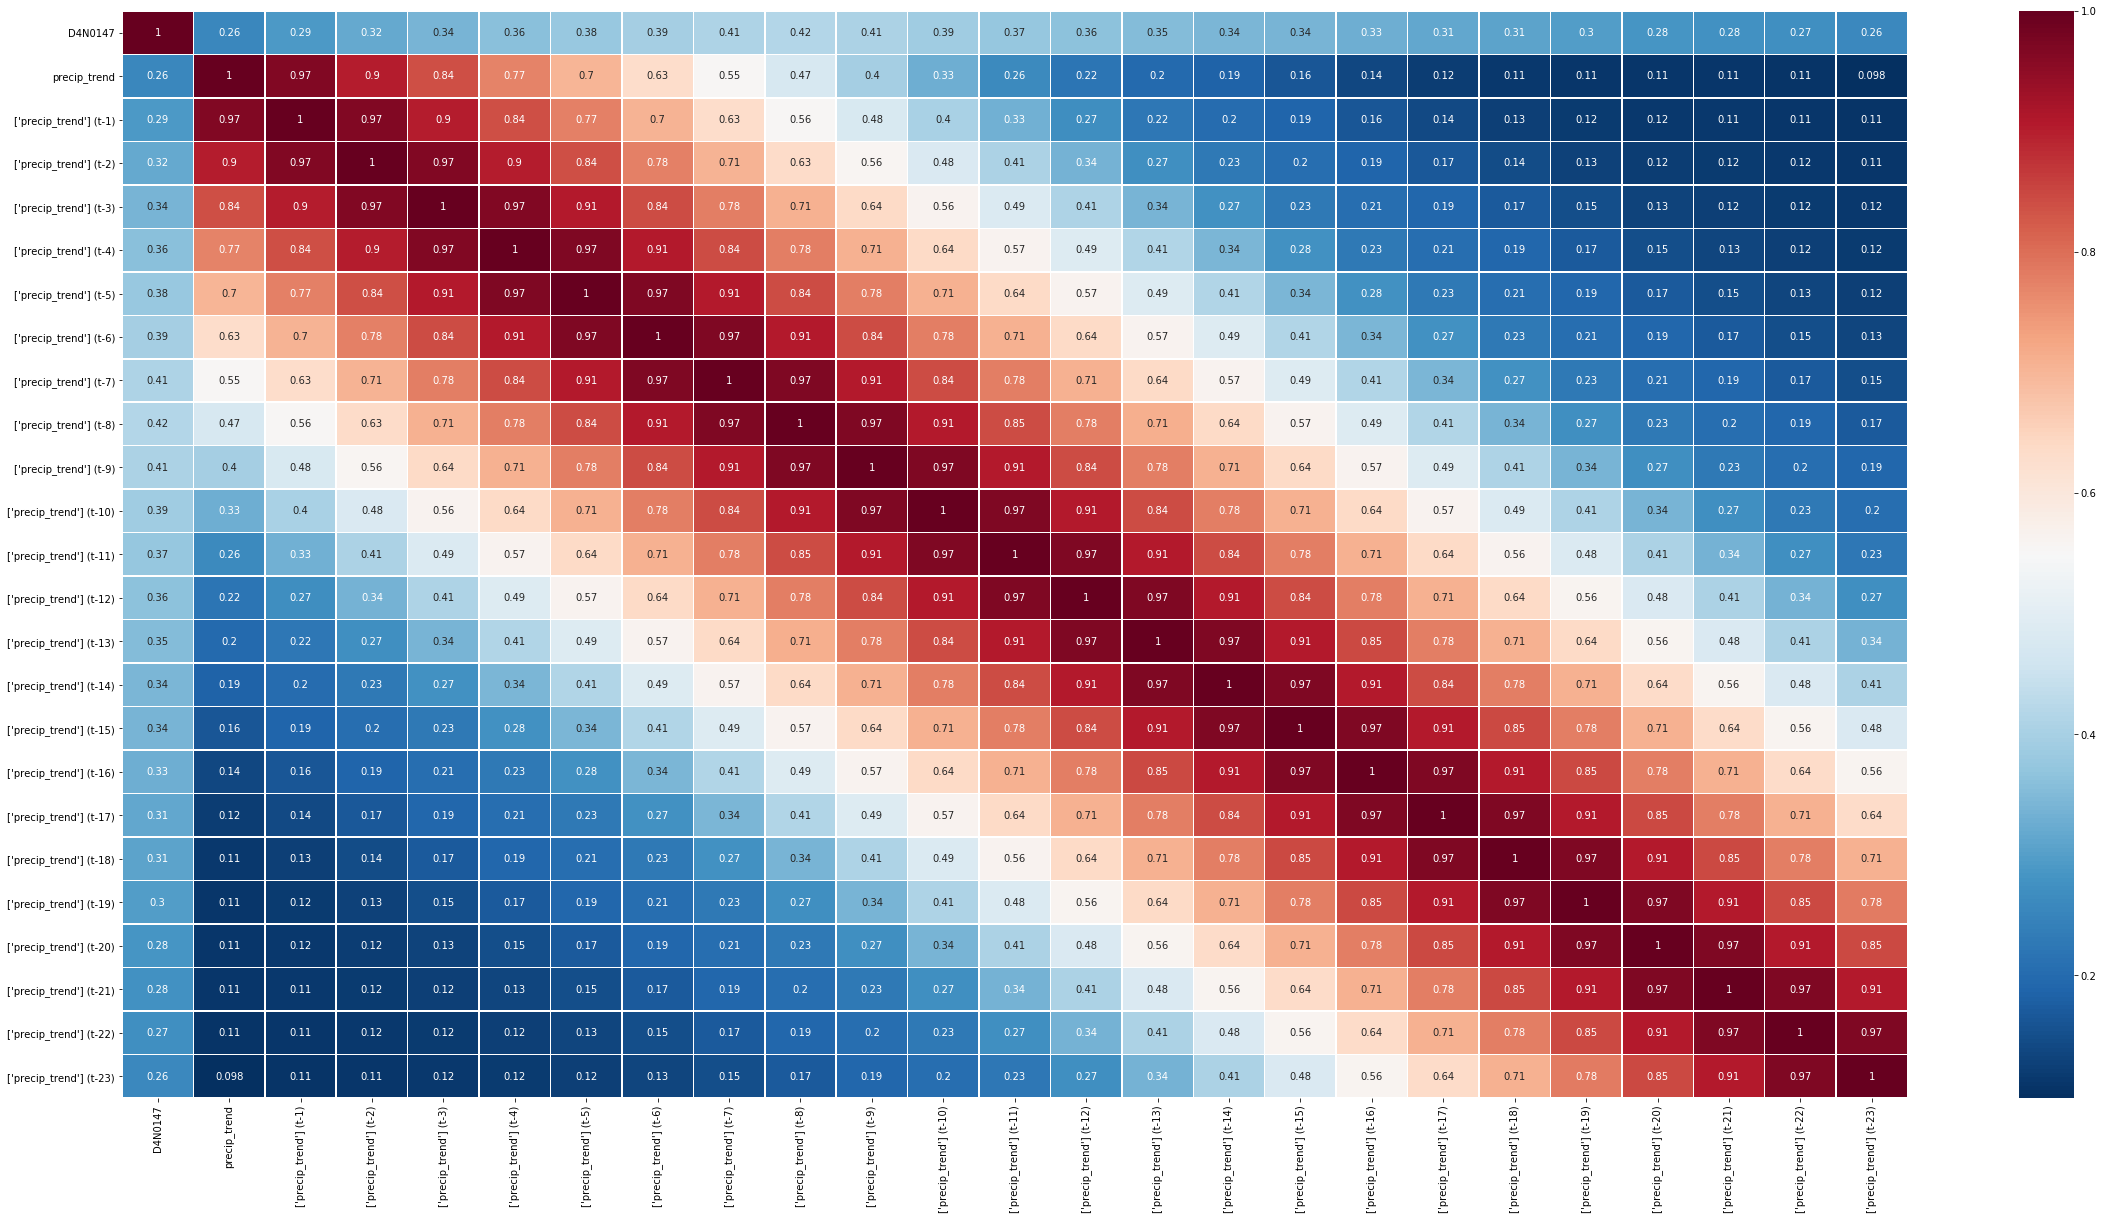

In [26]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip0834.corr(method = 'spearman')
corrm2 = precip0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

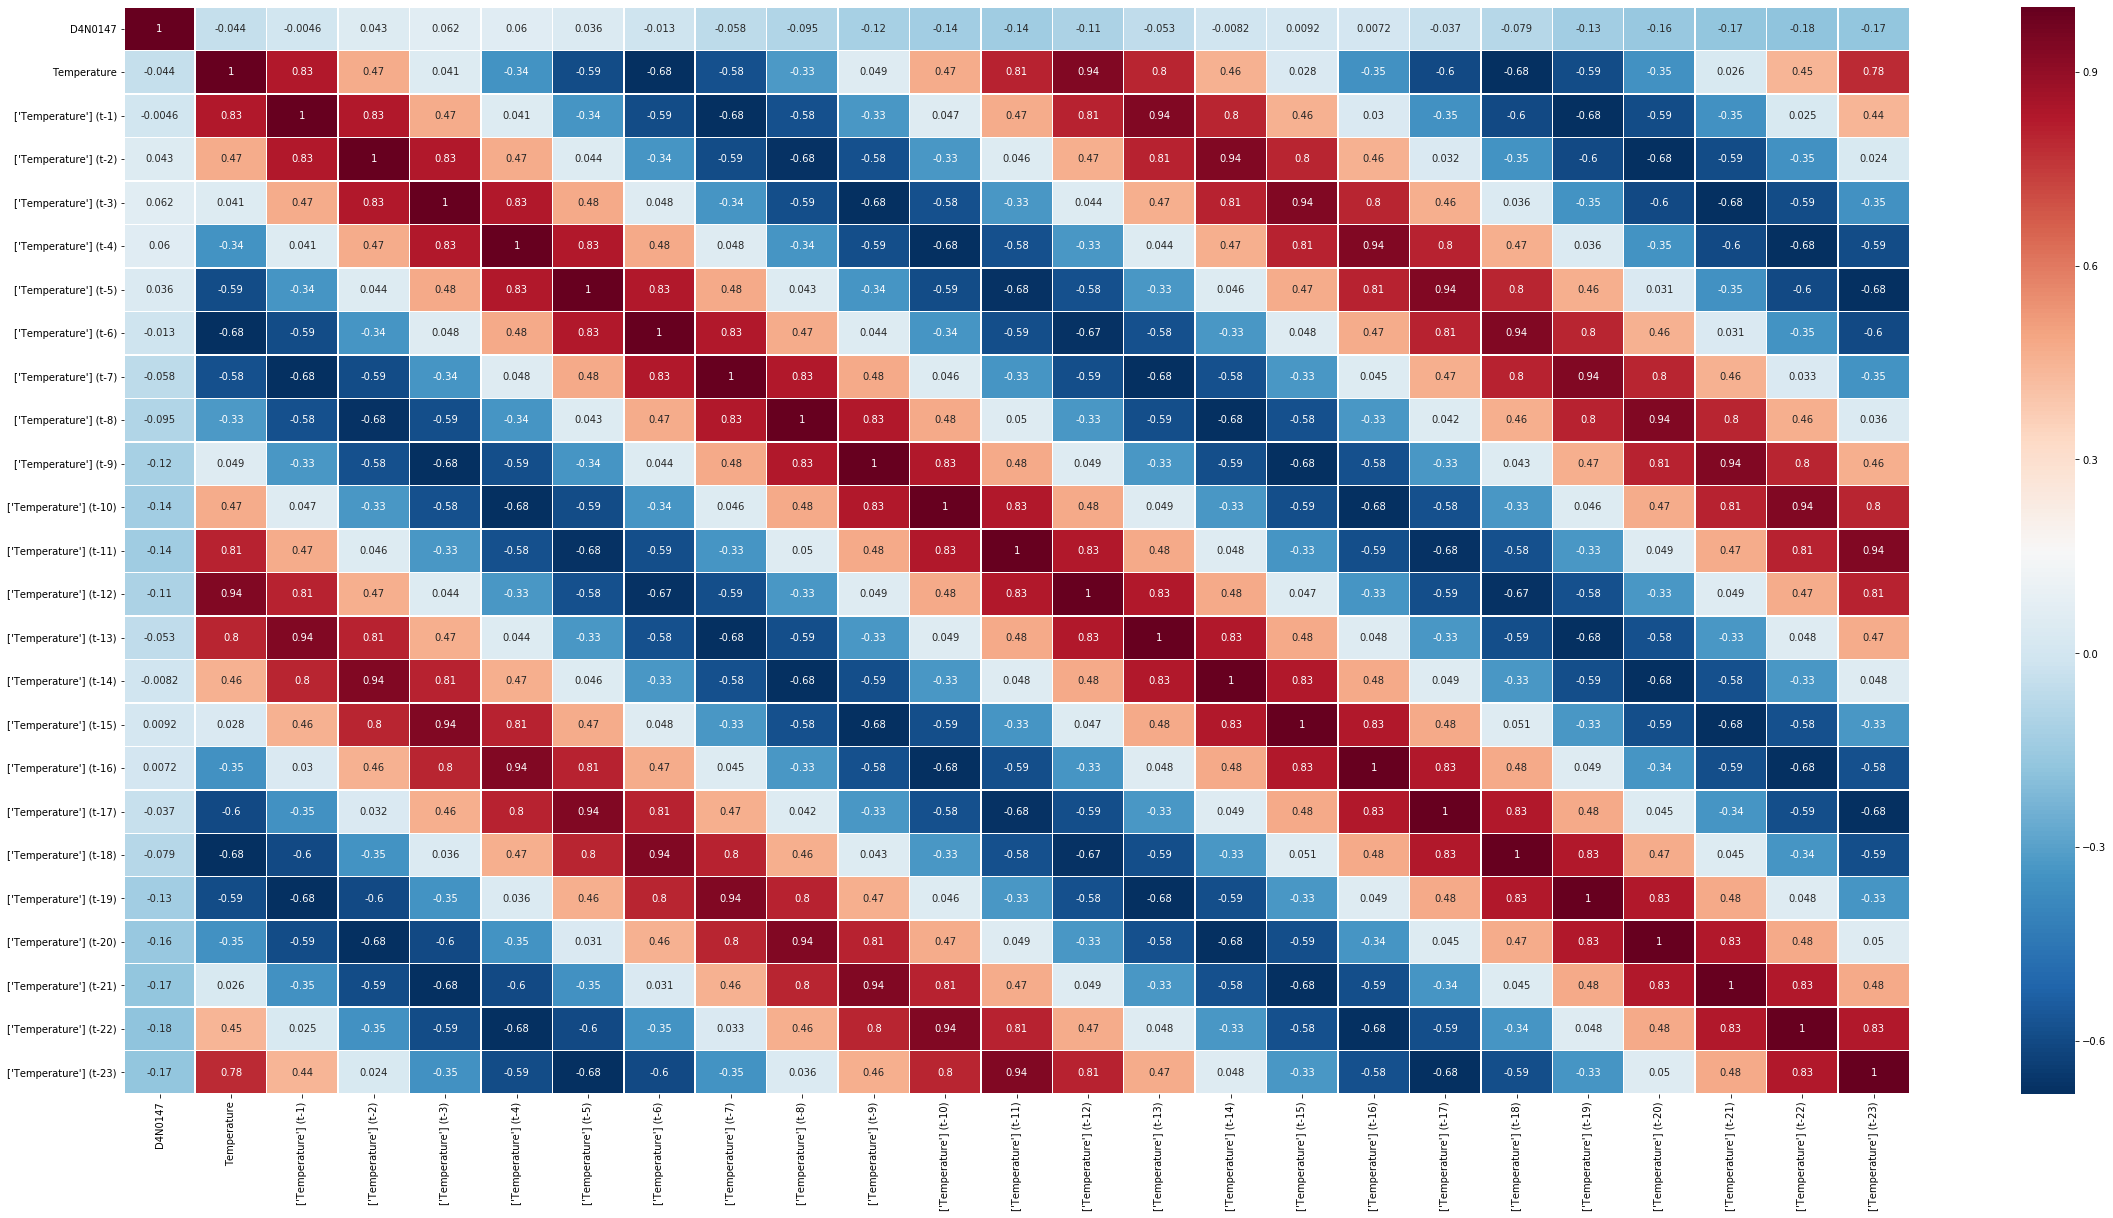

In [27]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp0834.corr(method = 'spearman')
corrm2 = temp0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [28]:
pima['Temperature (t-5)'] = pima.Temperature.shift(4)
pima['precip_trend (t-16)'] = pima.precip_trend.shift(4)
pima

D4N0147  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1977-01-01 -18.680000    24.400000     49.508333   1.041000  4.364772e+05   
1977-02-01 -18.566333    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01 -18.463667    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01 -18.350000    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01 -18.430000    16.231148     48.808333   1.406000  4.364772e+05   
...               ...          ...           ...        ...           ...   
2003-08-01 -19.640000    11.750000     42.721558   0.423000  2.735368e+06   
2003-09-01 -19.420000    18.700000     50.304891   0.407000  2.735368e+06   
2003-10-01 -19.420000    21.300000     57.896558   0.410000  2.735368e+06   
2003-11-01 -19.400000    21.800000     58.746558   0.401000  2.735368e+06   
2003-12-01 -19.400000    24.050000     58.728261   0.393000  2.735368e+06   

            Temperature (t-5)  precip_trend (t-16)  
year_month                                          
1977-01-01                NaN                  NaN  
1977-02-01                NaN                  NaN  
1977-03-01                NaN                  NaN  
1977-04-01                NaN                  NaN  
1977-05-01              24.40            49.508333  
...                       ...                  ...  
2003-08-01              19.50            37.863225  
2003-09-01              13.35            41.904891  
2003-10-01              10.25            42.054891  
2003-11-01              10.60            41.096558  
2003-12-01              11.75            42.721558  

[324 rows x 7 columns]

In [32]:
X = pima[['Temperature (t-5)', 'precip_trend (t-16)', 'Discharge','Abstraction']] # Features
y = pima[['D4N0147']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [33]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [34]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Temperature (t-5)      0.063649
precip_trend (t-16)    0.323168
Discharge              0.899919
Abstraction            1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [36]:
rainfall = X['precip_trend (t-16)']
temperature = X['Temperature (t-5)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0147']

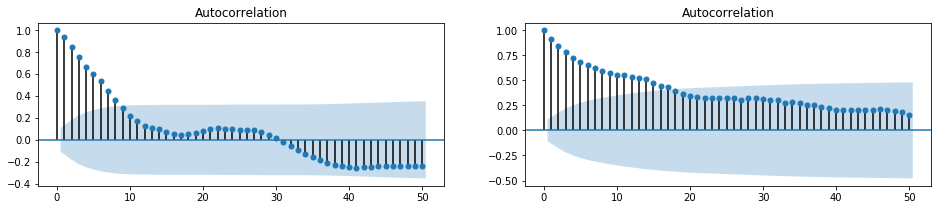

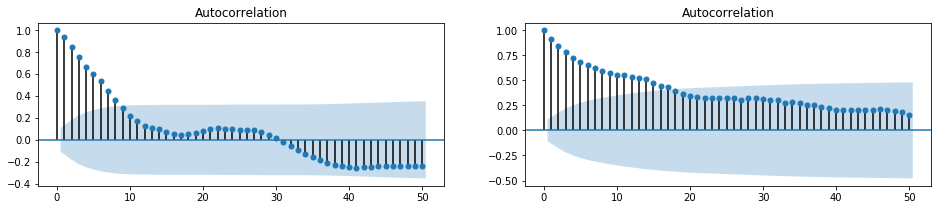

In [37]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

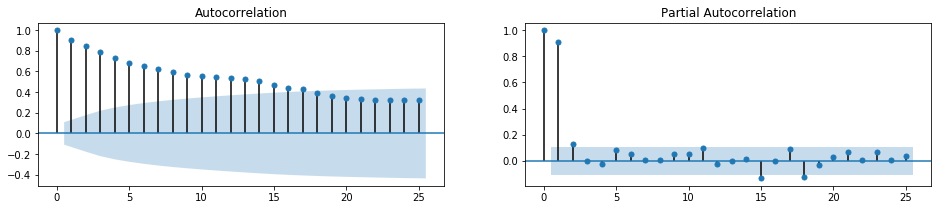

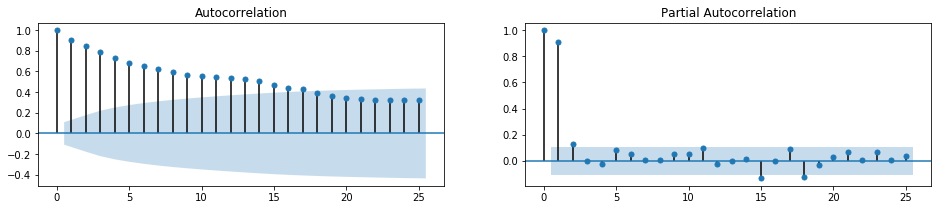

In [38]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

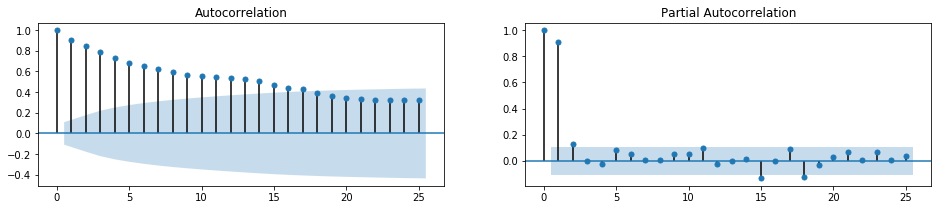

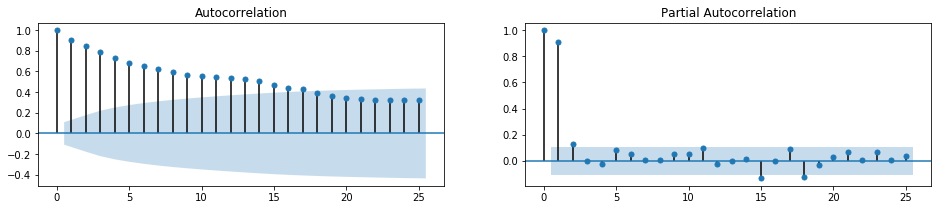

In [39]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

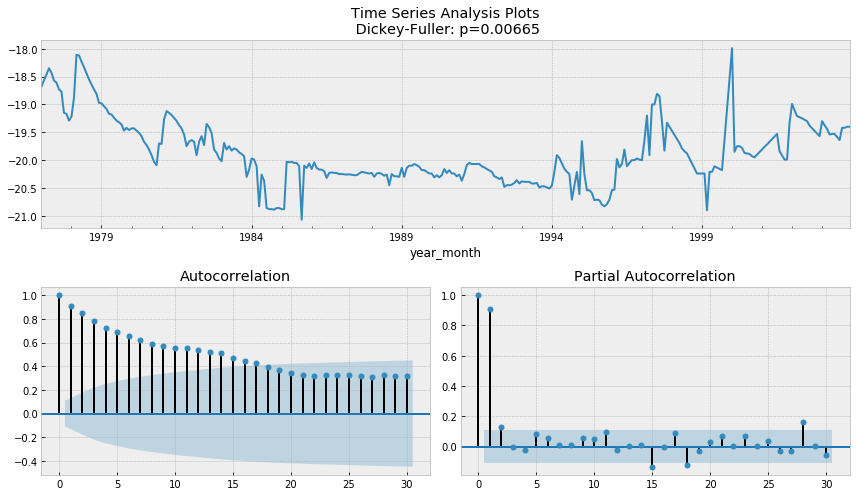

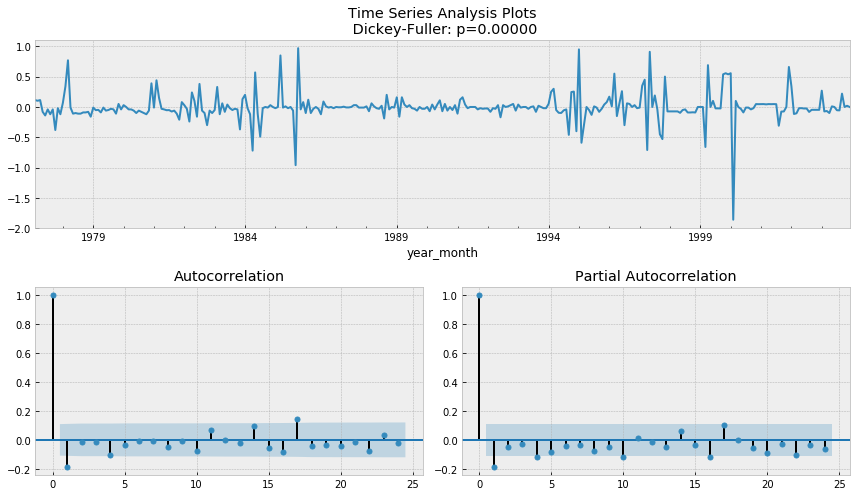

In [40]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0123_diff = bhid - bhid.shift(1)

tsplot(D4N0123_diff[1:], lags=24)

#### Rainfall

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


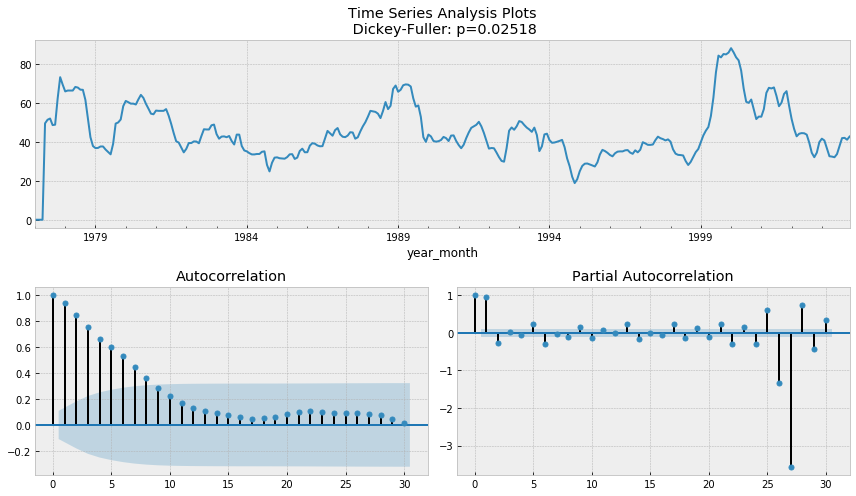

In [41]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

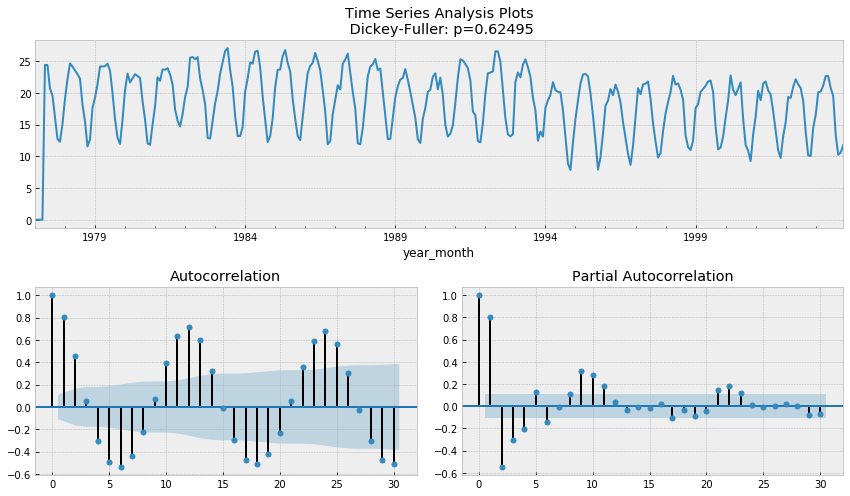

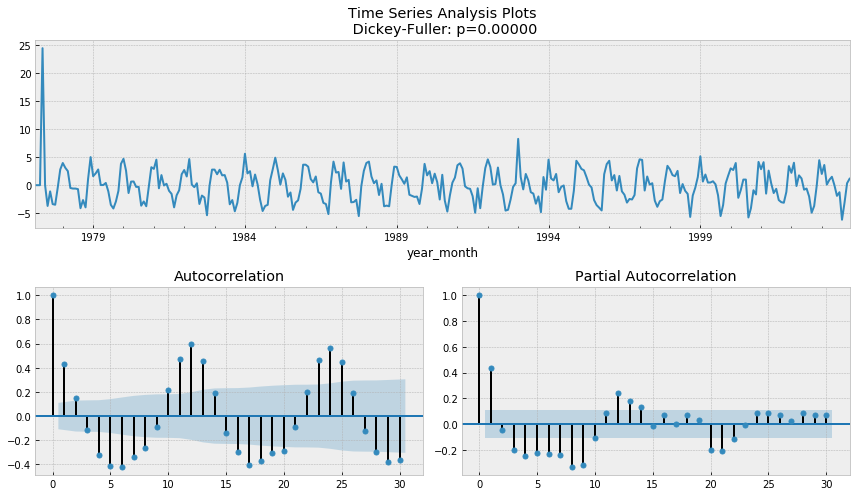

In [42]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

#Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)


tsplot(temp_diff[1:], lags=30)


#### Discharge

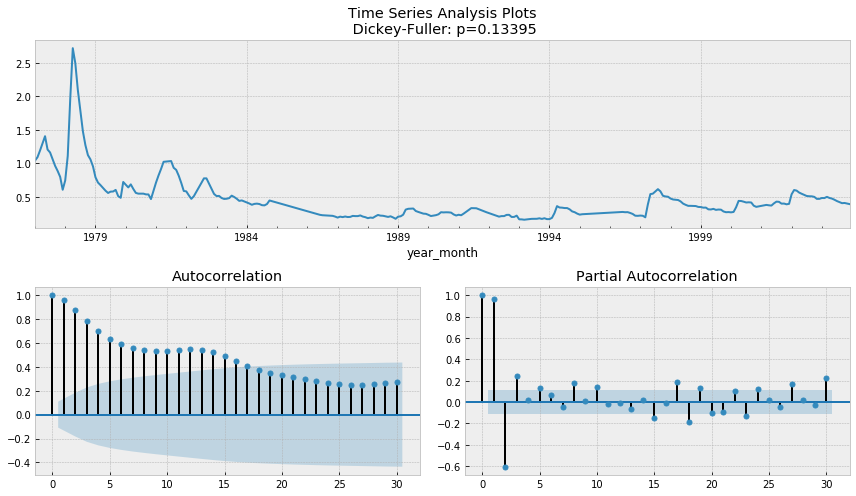

In [43]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

#### Usage

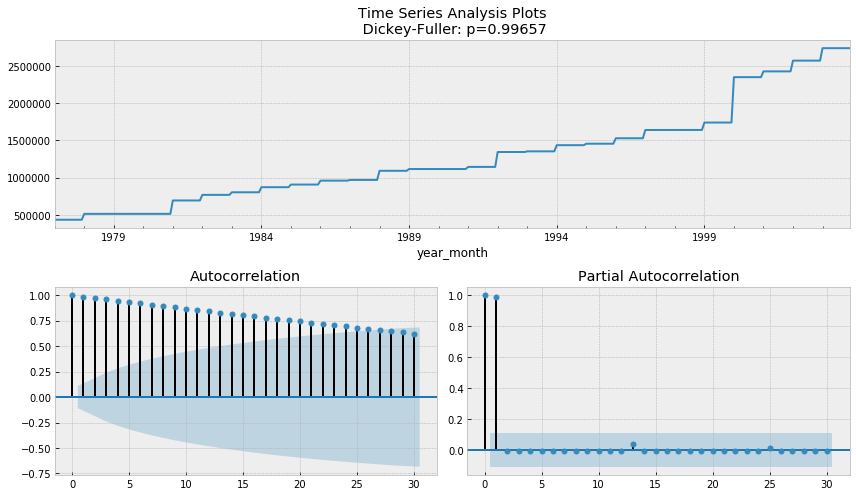

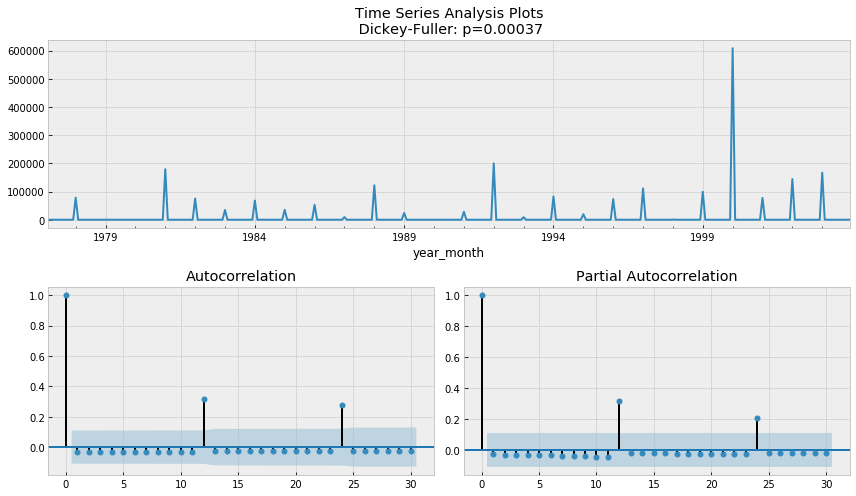

In [44]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [45]:
pima_diff = pd.DataFrame({'D4N0123': D4N0123_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': discharge, 'Abstraction': usage_diff}, columns=['D4N0123','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0123           1
Temperature       1
precip_trend    324
Discharge         0
Abstraction       1
dtype: int64

In [46]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

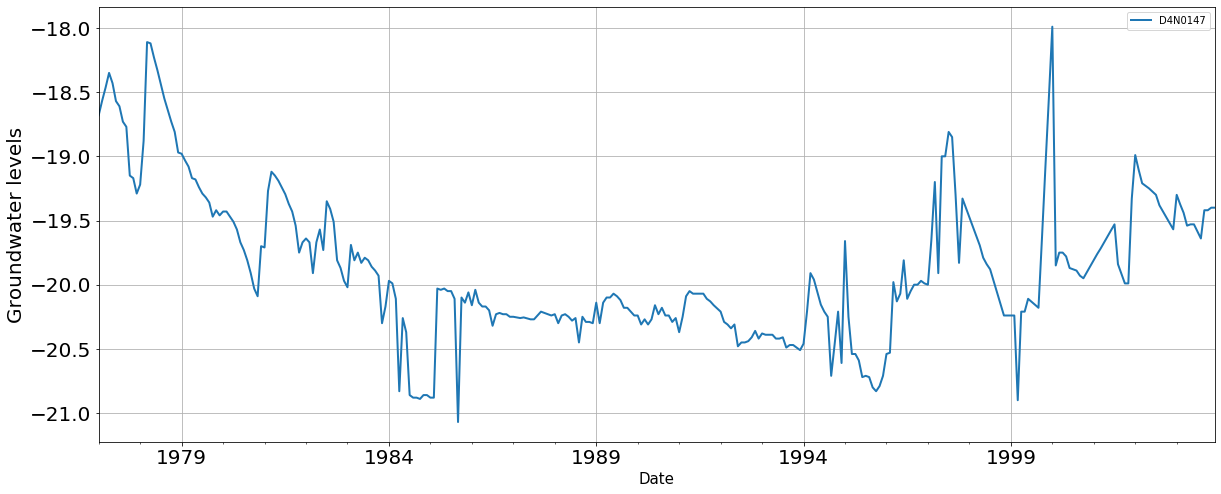

In [47]:
pima[['D4N0147']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


### Model Parameters

In [48]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-16)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-5)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [49]:
pima

D4N0147  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1977-01-01 -18.680000    24.400000     49.508333   1.041000  4.364772e+05   
1977-02-01 -18.566333    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01 -18.463667    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01 -18.350000    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01 -18.430000    16.231148     48.808333   1.406000  4.364772e+05   
...               ...          ...           ...        ...           ...   
2003-08-01 -19.640000    11.750000     42.721558   0.423000  2.735368e+06   
2003-09-01 -19.420000    18.700000     50.304891   0.407000  2.735368e+06   
2003-10-01 -19.420000    21.300000     57.896558   0.410000  2.735368e+06   
2003-11-01 -19.400000    21.800000     58.746558   0.401000  2.735368e+06   
2003-12-01 -19.400000    24.050000     58.728261   0.393000  2.735368e+06   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1977-01-01                NaN                  NaN               NaN   
1977-02-01                NaN                  NaN               NaN   
1977-03-01                NaN                  NaN               NaN   
1977-04-01                NaN                  NaN               NaN   
1977-05-01              24.40            49.508333          4.922138   
...                       ...                  ...               ...   
2003-08-01              19.50            37.863225          4.660048   
2003-09-01              13.35            41.904891          4.758986   
2003-10-01              10.25            42.054891          4.762476   
2003-11-01              10.60            41.096558          4.739966   
2003-12-01              11.75            42.721558          4.777841   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1977-01-01              NaN       1.713440        13.986494  
1977-02-01              NaN       1.738121        13.986494  
1977-03-01              NaN       1.784261        13.986494  
1977-04-01              NaN       1.832978        13.986494  
1977-05-01         4.234749       1.877966        13.986494  
...                     ...            ...              ...  
2003-08-01         4.020425       1.352767        15.821777  
2003-09-01         3.663750       1.341460        15.821777  
2003-10-01         3.420368       1.343590        15.821777  
2003-11-01         3.451005       1.337186        15.821777  
2003-12-01         3.545531       1.331460        15.821777  

[324 rows x 11 columns]

In [50]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima['D4N0147'].shift(obs)
pima.fillna(0, inplace=True)

In [51]:
pima

D4N0147  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1977-01-01 -18.680000    24.400000     49.508333   1.041000  4.364772e+05   
1977-02-01 -18.566333    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01 -18.463667    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01 -18.350000    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01 -18.430000    16.231148     48.808333   1.406000  4.364772e+05   
...               ...          ...           ...        ...           ...   
2003-08-01 -19.640000    11.750000     42.721558   0.423000  2.735368e+06   
2003-09-01 -19.420000    18.700000     50.304891   0.407000  2.735368e+06   
2003-10-01 -19.420000    21.300000     57.896558   0.410000  2.735368e+06   
2003-11-01 -19.400000    21.800000     58.746558   0.401000  2.735368e+06   
2003-12-01 -19.400000    24.050000     58.728261   0.393000  2.735368e+06   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1977-01-01               0.00             0.000000          0.000000   
1977-02-01               0.00             0.000000          0.000000   
1977-03-01               0.00             0.000000          0.000000   
1977-04-01               0.00             0.000000          0.000000   
1977-05-01              24.40            49.508333          4.922138   
...                       ...                  ...               ...   
2003-08-01              19.50            37.863225          4.660048   
2003-09-01              13.35            41.904891          4.758986   
2003-10-01              10.25            42.054891          4.762476   
2003-11-01              10.60            41.096558          4.739966   
2003-12-01              11.75            42.721558          4.777841   

            Temperature_log  Discharge_log  Abstraction_log        t_1  \
year_month                                                               
1977-01-01         0.000000       1.713440        13.986494   0.000000   
1977-02-01         0.000000       1.738121        13.986494 -18.680000   
1977-03-01         0.000000       1.784261        13.986494 -18.566333   
1977-04-01         0.000000       1.832978        13.986494 -18.463667   
1977-05-01         4.234749       1.877966        13.986494 -18.350000   
...                     ...            ...              ...        ...   
2003-08-01         4.020425       1.352767        15.821777 -19.584098   
2003-09-01         3.663750       1.341460        15.821777 -19.640000   
2003-10-01         3.420368       1.343590        15.821777 -19.420000   
2003-11-01         3.451005       1.337186        15.821777 -19.420000   
2003-12-01         3.545531       1.331460        15.821777 -19.400000   

                  t_2        t_3        t_4  
year_month                                   
1977-01-01   0.000000   0.000000   0.000000  
1977-02-01   0.000000   0.000000   0.000000  
1977-03-01 -18.680000   0.000000   0.000000  
1977-04-01 -18.566333 -18.680000   0.000000  
1977-05-01 -18.463667 -18.566333 -18.680000  
...               ...        ...        ...  
2003-08-01 -19.530000 -19.530000 -19.540000  
2003-09-01 -19.584098 -19.530000 -19.530000  
2003-10-01 -19.640000 -19.584098 -19.530000  
2003-11-01 -19.420000 -19.640000 -19.584098  
2003-12-01 -19.420000 -19.420000 -19.640000  

[324 rows x 15 columns]

In [52]:
pima.shape

(324, 15)

In [53]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0147']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [54]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0147']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.039135
precip_trend_log    0.217174
Discharge_log       0.666044
Abstraction_log     0.743161
t_1                 1.000000
t_2                 0.745112
dtype: float64

In [86]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0147'].values
y = y.reshape(-1,1)

In [87]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(270, 6) (270, 1)
(54, 6) (54, 1)


In [89]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [92]:
y_test[0]

array([-0.45728445])

### LSTM

In [91]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

In [93]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mae', optimizer='adam')

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    history = model.fit(X_t_reshaped, y_train, epochs=700
                    , batch_size=72, validation_data=(X_val_reshaped, y_test), verbose=2, callbacks=[check, early], shuffle=False)

    #running function
    gwl = -0.45728445
    test_forecast = X_test
    steps_ahead = 54
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 270 samples, validate on 54 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/700

Epoch 00001: val_loss improved from inf to 0.61843, saving model to model.h5
270/270 - 3s - loss: 0.8184 - val_loss: 0.6184
Epoch 2/700

Epoch 00002: val_loss did not improve from 0.61843
270/270 - 0s - loss: 0.7939 - val_loss: 0.6210
Epoch 3/700

Epoch 00003: val_loss did not improve from 0.61843
270/270 - 0s - loss: 0.7738 - val_loss: 0.6237
Epoch 4/700

Epoch 00004: val_loss did not improve from 0.61843
270/270 - 0s - loss: 0.7494 - val_loss: 0.6264
Epoch 5/700

Epoch 00005: val_loss did not improve from 0.61843
270/270 - 0s - loss: 0.7272 - val_loss: 0.6291
Epoch 6/700

Epoch 00006: val_loss did not improve from 0.61843
270/270 - 0s - loss: 0.7057 - val_loss: 0.6327
Epoch 7/700

Epoch 00007: v

Epoch 63/700

Epoch 00063: val_loss improved from 0.54677 to 0.54206, saving model to model.h5
270/270 - 0s - loss: 0.2548 - val_loss: 0.5421
Epoch 64/700

Epoch 00064: val_loss improved from 0.54206 to 0.53731, saving model to model.h5
270/270 - 0s - loss: 0.2533 - val_loss: 0.5373
Epoch 65/700

Epoch 00065: val_loss improved from 0.53731 to 0.53307, saving model to model.h5
270/270 - 0s - loss: 0.2583 - val_loss: 0.5331
Epoch 66/700

Epoch 00066: val_loss improved from 0.53307 to 0.52858, saving model to model.h5
270/270 - 0s - loss: 0.2497 - val_loss: 0.5286
Epoch 67/700

Epoch 00067: val_loss improved from 0.52858 to 0.52427, saving model to model.h5
270/270 - 0s - loss: 0.2503 - val_loss: 0.5243
Epoch 68/700

Epoch 00068: val_loss improved from 0.52427 to 0.52006, saving model to model.h5
270/270 - 0s - loss: 0.2485 - val_loss: 0.5201
Epoch 69/700

Epoch 00069: val_loss improved from 0.52006 to 0.51571, saving model to model.h5
270/270 - 0s - loss: 0.2485 - val_loss: 0.5157
Epoch 

Epoch 121/700

Epoch 00121: val_loss improved from 0.34824 to 0.34606, saving model to model.h5
270/270 - 0s - loss: 0.2177 - val_loss: 0.3461
Epoch 122/700

Epoch 00122: val_loss improved from 0.34606 to 0.34428, saving model to model.h5
270/270 - 0s - loss: 0.2137 - val_loss: 0.3443
Epoch 123/700

Epoch 00123: val_loss improved from 0.34428 to 0.34323, saving model to model.h5
270/270 - 0s - loss: 0.2094 - val_loss: 0.3432
Epoch 124/700

Epoch 00124: val_loss improved from 0.34323 to 0.34259, saving model to model.h5
270/270 - 0s - loss: 0.2060 - val_loss: 0.3426
Epoch 125/700

Epoch 00125: val_loss improved from 0.34259 to 0.34178, saving model to model.h5
270/270 - 0s - loss: 0.2109 - val_loss: 0.3418
Epoch 126/700

Epoch 00126: val_loss improved from 0.34178 to 0.34123, saving model to model.h5
270/270 - 0s - loss: 0.2074 - val_loss: 0.3412
Epoch 127/700

Epoch 00127: val_loss improved from 0.34123 to 0.34009, saving model to model.h5
270/270 - 0s - loss: 0.2122 - val_loss: 0.3401


Epoch 00185: val_loss did not improve from 0.31997
270/270 - 0s - loss: 0.2019 - val_loss: 0.3251
Epoch 186/700

Epoch 00186: val_loss did not improve from 0.31997
270/270 - 0s - loss: 0.2030 - val_loss: 0.3263
Epoch 187/700

Epoch 00187: val_loss did not improve from 0.31997
270/270 - 0s - loss: 0.2008 - val_loss: 0.3272
Epoch 188/700

Epoch 00188: val_loss did not improve from 0.31997
270/270 - 0s - loss: 0.1994 - val_loss: 0.3272
Epoch 189/700

Epoch 00189: val_loss did not improve from 0.31997
270/270 - 0s - loss: 0.2013 - val_loss: 0.3270
Epoch 190/700

Epoch 00190: val_loss did not improve from 0.31997
270/270 - 0s - loss: 0.2007 - val_loss: 0.3256
Epoch 191/700

Epoch 00191: val_loss did not improve from 0.31997
270/270 - 0s - loss: 0.2009 - val_loss: 0.3235
Epoch 192/700

Epoch 00192: val_loss did not improve from 0.31997
270/270 - 0s - loss: 0.2006 - val_loss: 0.3215
Epoch 193/700

Epoch 00193: val_loss improved from 0.31997 to 0.31894, saving model to model.h5
270/270 - 0s -

Epoch 255/700

Epoch 00255: val_loss improved from 0.31205 to 0.31054, saving model to model.h5
270/270 - 0s - loss: 0.2018 - val_loss: 0.3105
Epoch 256/700

Epoch 00256: val_loss improved from 0.31054 to 0.31007, saving model to model.h5
270/270 - 0s - loss: 0.1947 - val_loss: 0.3101
Epoch 257/700

Epoch 00257: val_loss improved from 0.31007 to 0.30951, saving model to model.h5
270/270 - 0s - loss: 0.1983 - val_loss: 0.3095
Epoch 258/700

Epoch 00258: val_loss did not improve from 0.30951
270/270 - 0s - loss: 0.2026 - val_loss: 0.3103
Epoch 259/700

Epoch 00259: val_loss did not improve from 0.30951
270/270 - 0s - loss: 0.1987 - val_loss: 0.3120
Epoch 260/700

Epoch 00260: val_loss did not improve from 0.30951
270/270 - 0s - loss: 0.1980 - val_loss: 0.3129
Epoch 261/700

Epoch 00261: val_loss did not improve from 0.30951
270/270 - 0s - loss: 0.1989 - val_loss: 0.3138
Epoch 262/700

Epoch 00262: val_loss did not improve from 0.30951
270/270 - 0s - loss: 0.2028 - val_loss: 0.3146
Epoch 

Epoch 324/700

Epoch 00324: val_loss did not improve from 0.29736
270/270 - 0s - loss: 0.1916 - val_loss: 0.2989
Epoch 325/700

Epoch 00325: val_loss did not improve from 0.29736
270/270 - 0s - loss: 0.1928 - val_loss: 0.3003
Epoch 326/700

Epoch 00326: val_loss did not improve from 0.29736
270/270 - 0s - loss: 0.1922 - val_loss: 0.3015
Epoch 327/700

Epoch 00327: val_loss did not improve from 0.29736
270/270 - 0s - loss: 0.1930 - val_loss: 0.3012
Epoch 328/700

Epoch 00328: val_loss did not improve from 0.29736
270/270 - 0s - loss: 0.1926 - val_loss: 0.3015
Epoch 329/700

Epoch 00329: val_loss did not improve from 0.29736
270/270 - 0s - loss: 0.1909 - val_loss: 0.3023
Epoch 330/700

Epoch 00330: val_loss did not improve from 0.29736
270/270 - 0s - loss: 0.1954 - val_loss: 0.3026
Epoch 331/700

Epoch 00331: val_loss did not improve from 0.29736
270/270 - 0s - loss: 0.1947 - val_loss: 0.3026
Epoch 332/700

Epoch 00332: val_loss did not improve from 0.29736
270/270 - 0s - loss: 0.1894 - 

270/270 - 0s - loss: 0.1910 - val_loss: 0.2889
Epoch 394/700

Epoch 00394: val_loss improved from 0.28892 to 0.28825, saving model to model.h5
270/270 - 0s - loss: 0.1926 - val_loss: 0.2883
Epoch 395/700

Epoch 00395: val_loss improved from 0.28825 to 0.28777, saving model to model.h5
270/270 - 0s - loss: 0.1928 - val_loss: 0.2878
Epoch 396/700

Epoch 00396: val_loss did not improve from 0.28777
270/270 - 0s - loss: 0.1939 - val_loss: 0.2880
Epoch 397/700

Epoch 00397: val_loss improved from 0.28777 to 0.28758, saving model to model.h5
270/270 - 0s - loss: 0.1923 - val_loss: 0.2876
Epoch 398/700

Epoch 00398: val_loss improved from 0.28758 to 0.28737, saving model to model.h5
270/270 - 0s - loss: 0.1918 - val_loss: 0.2874
Epoch 399/700

Epoch 00399: val_loss did not improve from 0.28737
270/270 - 0s - loss: 0.1913 - val_loss: 0.2877
Epoch 400/700

Epoch 00400: val_loss did not improve from 0.28737
270/270 - 0s - loss: 0.1928 - val_loss: 0.2876
Epoch 401/700

Epoch 00401: val_loss did n


Epoch 00462: val_loss improved from 0.27810 to 0.27741, saving model to model.h5
270/270 - 0s - loss: 0.1909 - val_loss: 0.2774
Epoch 463/700

Epoch 00463: val_loss improved from 0.27741 to 0.27661, saving model to model.h5
270/270 - 0s - loss: 0.1892 - val_loss: 0.2766
Epoch 464/700

Epoch 00464: val_loss improved from 0.27661 to 0.27653, saving model to model.h5
270/270 - 0s - loss: 0.1925 - val_loss: 0.2765
Epoch 465/700

Epoch 00465: val_loss did not improve from 0.27653
270/270 - 0s - loss: 0.1929 - val_loss: 0.2777
Epoch 466/700

Epoch 00466: val_loss did not improve from 0.27653
270/270 - 0s - loss: 0.1954 - val_loss: 0.2787
Epoch 467/700

Epoch 00467: val_loss did not improve from 0.27653
270/270 - 0s - loss: 0.1915 - val_loss: 0.2798
Epoch 468/700

Epoch 00468: val_loss did not improve from 0.27653
270/270 - 0s - loss: 0.1945 - val_loss: 0.2801
Epoch 469/700

Epoch 00469: val_loss did not improve from 0.27653
270/270 - 0s - loss: 0.1904 - val_loss: 0.2791
Epoch 470/700

Epoch

Epoch 532/700

Epoch 00532: val_loss did not improve from 0.26934
270/270 - 0s - loss: 0.1898 - val_loss: 0.2697
Epoch 533/700

Epoch 00533: val_loss did not improve from 0.26934
270/270 - 0s - loss: 0.1923 - val_loss: 0.2702
Epoch 534/700

Epoch 00534: val_loss did not improve from 0.26934
270/270 - 0s - loss: 0.1924 - val_loss: 0.2705
Epoch 535/700

Epoch 00535: val_loss did not improve from 0.26934
270/270 - 0s - loss: 0.1982 - val_loss: 0.2697
Epoch 536/700

Epoch 00536: val_loss improved from 0.26934 to 0.26896, saving model to model.h5
270/270 - 0s - loss: 0.1948 - val_loss: 0.2690
Epoch 537/700

Epoch 00537: val_loss did not improve from 0.26896
270/270 - 0s - loss: 0.1920 - val_loss: 0.2695
Epoch 538/700

Epoch 00538: val_loss did not improve from 0.26896
270/270 - 0s - loss: 0.1914 - val_loss: 0.2703
Epoch 539/700

Epoch 00539: val_loss did not improve from 0.26896
270/270 - 0s - loss: 0.1961 - val_loss: 0.2710
Epoch 540/700

Epoch 00540: val_loss did not improve from 0.26896


Epoch 600/700

Epoch 00600: val_loss improved from 0.26198 to 0.26165, saving model to model.h5
270/270 - 0s - loss: 0.1883 - val_loss: 0.2617
Epoch 601/700

Epoch 00601: val_loss improved from 0.26165 to 0.26131, saving model to model.h5
270/270 - 0s - loss: 0.1885 - val_loss: 0.2613
Epoch 602/700

Epoch 00602: val_loss did not improve from 0.26131
270/270 - 0s - loss: 0.1887 - val_loss: 0.2615
Epoch 603/700

Epoch 00603: val_loss did not improve from 0.26131
270/270 - 0s - loss: 0.1892 - val_loss: 0.2620
Epoch 604/700

Epoch 00604: val_loss did not improve from 0.26131
270/270 - 0s - loss: 0.1875 - val_loss: 0.2623
Epoch 605/700

Epoch 00605: val_loss did not improve from 0.26131
270/270 - 0s - loss: 0.1917 - val_loss: 0.2626
Epoch 606/700

Epoch 00606: val_loss did not improve from 0.26131
270/270 - 0s - loss: 0.1878 - val_loss: 0.2627
Epoch 607/700

Epoch 00607: val_loss did not improve from 0.26131
270/270 - 0s - loss: 0.1902 - val_loss: 0.2626
Epoch 608/700

Epoch 00608: val_loss

Epoch 671/700

Epoch 00671: val_loss did not improve from 0.25949
270/270 - 0s - loss: 0.1961 - val_loss: 0.2633
Epoch 672/700

Epoch 00672: val_loss did not improve from 0.25949
270/270 - 0s - loss: 0.1926 - val_loss: 0.2626
Epoch 673/700

Epoch 00673: val_loss did not improve from 0.25949
270/270 - 0s - loss: 0.1918 - val_loss: 0.2622
Epoch 674/700

Epoch 00674: val_loss did not improve from 0.25949
270/270 - 0s - loss: 0.1889 - val_loss: 0.2629
Epoch 675/700

Epoch 00675: val_loss did not improve from 0.25949
270/270 - 0s - loss: 0.1923 - val_loss: 0.2640
Epoch 676/700

Epoch 00676: val_loss did not improve from 0.25949
270/270 - 0s - loss: 0.1925 - val_loss: 0.2644
Epoch 677/700

Epoch 00677: val_loss did not improve from 0.25949
270/270 - 0s - loss: 0.1880 - val_loss: 0.2630
Epoch 678/700

Epoch 00678: val_loss did not improve from 0.25949
270/270 - 0s - loss: 0.1904 - val_loss: 0.2623
Epoch 679/700

Epoch 00679: val_loss did not improve from 0.25949
270/270 - 0s - loss: 0.1905 - 


Epoch 00043: val_loss did not improve from 0.65633
270/270 - 0s - loss: 0.2760 - val_loss: 0.6828
Epoch 44/700

Epoch 00044: val_loss did not improve from 0.65633
270/270 - 0s - loss: 0.2785 - val_loss: 0.6776
Epoch 45/700

Epoch 00045: val_loss did not improve from 0.65633
270/270 - 0s - loss: 0.2726 - val_loss: 0.6724
Epoch 46/700

Epoch 00046: val_loss did not improve from 0.65633
270/270 - 0s - loss: 0.2708 - val_loss: 0.6667
Epoch 47/700

Epoch 00047: val_loss did not improve from 0.65633
270/270 - 0s - loss: 0.2777 - val_loss: 0.6608
Epoch 48/700

Epoch 00048: val_loss improved from 0.65633 to 0.65472, saving model to model.h5
270/270 - 0s - loss: 0.2777 - val_loss: 0.6547
Epoch 49/700

Epoch 00049: val_loss improved from 0.65472 to 0.64818, saving model to model.h5
270/270 - 0s - loss: 0.2732 - val_loss: 0.6482
Epoch 50/700

Epoch 00050: val_loss improved from 0.64818 to 0.64193, saving model to model.h5
270/270 - 0s - loss: 0.2702 - val_loss: 0.6419
Epoch 51/700

Epoch 00051: 

Epoch 102/700

Epoch 00102: val_loss improved from 0.40080 to 0.39686, saving model to model.h5
270/270 - 0s - loss: 0.2259 - val_loss: 0.3969
Epoch 103/700

Epoch 00103: val_loss improved from 0.39686 to 0.39301, saving model to model.h5
270/270 - 0s - loss: 0.2238 - val_loss: 0.3930
Epoch 104/700

Epoch 00104: val_loss improved from 0.39301 to 0.38965, saving model to model.h5
270/270 - 0s - loss: 0.2217 - val_loss: 0.3897
Epoch 105/700

Epoch 00105: val_loss improved from 0.38965 to 0.38649, saving model to model.h5
270/270 - 0s - loss: 0.2227 - val_loss: 0.3865
Epoch 106/700

Epoch 00106: val_loss improved from 0.38649 to 0.38361, saving model to model.h5
270/270 - 0s - loss: 0.2194 - val_loss: 0.3836
Epoch 107/700

Epoch 00107: val_loss improved from 0.38361 to 0.38028, saving model to model.h5
270/270 - 0s - loss: 0.2239 - val_loss: 0.3803
Epoch 108/700

Epoch 00108: val_loss improved from 0.38028 to 0.37623, saving model to model.h5
270/270 - 0s - loss: 0.2191 - val_loss: 0.3762

Epoch 163/700

Epoch 00163: val_loss improved from 0.30308 to 0.30215, saving model to model.h5
270/270 - 0s - loss: 0.2111 - val_loss: 0.3022
Epoch 164/700

Epoch 00164: val_loss improved from 0.30215 to 0.30159, saving model to model.h5
270/270 - 0s - loss: 0.1987 - val_loss: 0.3016
Epoch 165/700

Epoch 00165: val_loss improved from 0.30159 to 0.30089, saving model to model.h5
270/270 - 0s - loss: 0.2011 - val_loss: 0.3009
Epoch 166/700

Epoch 00166: val_loss improved from 0.30089 to 0.30032, saving model to model.h5
270/270 - 0s - loss: 0.2007 - val_loss: 0.3003
Epoch 167/700

Epoch 00167: val_loss improved from 0.30032 to 0.29991, saving model to model.h5
270/270 - 0s - loss: 0.2042 - val_loss: 0.2999
Epoch 168/700

Epoch 00168: val_loss improved from 0.29991 to 0.29913, saving model to model.h5
270/270 - 0s - loss: 0.2017 - val_loss: 0.2991
Epoch 169/700

Epoch 00169: val_loss did not improve from 0.29913
270/270 - 0s - loss: 0.2028 - val_loss: 0.2993
Epoch 170/700

Epoch 00170: v

Epoch 233/700

Epoch 00233: val_loss did not improve from 0.29662
270/270 - 0s - loss: 0.1979 - val_loss: 0.2972
Epoch 234/700

Epoch 00234: val_loss did not improve from 0.29662
270/270 - 0s - loss: 0.2011 - val_loss: 0.2978
Epoch 235/700

Epoch 00235: val_loss did not improve from 0.29662
270/270 - 0s - loss: 0.1957 - val_loss: 0.2976
Epoch 236/700

Epoch 00236: val_loss did not improve from 0.29662
270/270 - 0s - loss: 0.1986 - val_loss: 0.2975
Epoch 237/700

Epoch 00237: val_loss did not improve from 0.29662
270/270 - 0s - loss: 0.2008 - val_loss: 0.2975
Epoch 238/700

Epoch 00238: val_loss did not improve from 0.29662
270/270 - 0s - loss: 0.1962 - val_loss: 0.2972
Epoch 239/700

Epoch 00239: val_loss improved from 0.29662 to 0.29544, saving model to model.h5
270/270 - 0s - loss: 0.1973 - val_loss: 0.2954
Epoch 240/700

Epoch 00240: val_loss improved from 0.29544 to 0.29300, saving model to model.h5
270/270 - 0s - loss: 0.1984 - val_loss: 0.2930
Epoch 241/700

Epoch 00241: val_loss

Epoch 305/700

Epoch 00305: val_loss improved from 0.28936 to 0.28819, saving model to model.h5
270/270 - 0s - loss: 0.1920 - val_loss: 0.2882
Epoch 306/700

Epoch 00306: val_loss improved from 0.28819 to 0.28709, saving model to model.h5
270/270 - 0s - loss: 0.1877 - val_loss: 0.2871
Epoch 307/700

Epoch 00307: val_loss improved from 0.28709 to 0.28552, saving model to model.h5
270/270 - 0s - loss: 0.1983 - val_loss: 0.2855
Epoch 308/700

Epoch 00308: val_loss improved from 0.28552 to 0.28539, saving model to model.h5
270/270 - 0s - loss: 0.1954 - val_loss: 0.2854
Epoch 309/700

Epoch 00309: val_loss improved from 0.28539 to 0.28462, saving model to model.h5
270/270 - 0s - loss: 0.1915 - val_loss: 0.2846
Epoch 310/700

Epoch 00310: val_loss did not improve from 0.28462
270/270 - 0s - loss: 0.1928 - val_loss: 0.2847
Epoch 311/700

Epoch 00311: val_loss improved from 0.28462 to 0.28435, saving model to model.h5
270/270 - 0s - loss: 0.1949 - val_loss: 0.2843
Epoch 312/700

Epoch 00312: v


Epoch 00374: val_loss did not improve from 0.27907
270/270 - 0s - loss: 0.1922 - val_loss: 0.2811
Epoch 375/700

Epoch 00375: val_loss did not improve from 0.27907
270/270 - 0s - loss: 0.1956 - val_loss: 0.2795
Epoch 376/700

Epoch 00376: val_loss did not improve from 0.27907
270/270 - 0s - loss: 0.1897 - val_loss: 0.2791
Epoch 377/700

Epoch 00377: val_loss improved from 0.27907 to 0.27906, saving model to model.h5
270/270 - 0s - loss: 0.1895 - val_loss: 0.2791
Epoch 378/700

Epoch 00378: val_loss improved from 0.27906 to 0.27880, saving model to model.h5
270/270 - 0s - loss: 0.1898 - val_loss: 0.2788
Epoch 379/700

Epoch 00379: val_loss did not improve from 0.27880
270/270 - 0s - loss: 0.1921 - val_loss: 0.2793
Epoch 380/700

Epoch 00380: val_loss did not improve from 0.27880
270/270 - 0s - loss: 0.1962 - val_loss: 0.2793
Epoch 381/700

Epoch 00381: val_loss improved from 0.27880 to 0.27818, saving model to model.h5
270/270 - 0s - loss: 0.1958 - val_loss: 0.2782
Epoch 382/700

Epoch

Epoch 443/700

Epoch 00443: val_loss improved from 0.26962 to 0.26864, saving model to model.h5
270/270 - 0s - loss: 0.1977 - val_loss: 0.2686
Epoch 444/700

Epoch 00444: val_loss improved from 0.26864 to 0.26764, saving model to model.h5
270/270 - 0s - loss: 0.1929 - val_loss: 0.2676
Epoch 445/700

Epoch 00445: val_loss improved from 0.26764 to 0.26735, saving model to model.h5
270/270 - 0s - loss: 0.1997 - val_loss: 0.2673
Epoch 446/700

Epoch 00446: val_loss did not improve from 0.26735
270/270 - 0s - loss: 0.1935 - val_loss: 0.2678
Epoch 447/700

Epoch 00447: val_loss did not improve from 0.26735
270/270 - 0s - loss: 0.1934 - val_loss: 0.2681
Epoch 448/700

Epoch 00448: val_loss did not improve from 0.26735
270/270 - 0s - loss: 0.1927 - val_loss: 0.2688
Epoch 449/700

Epoch 00449: val_loss did not improve from 0.26735
270/270 - 0s - loss: 0.1978 - val_loss: 0.2696
Epoch 450/700

Epoch 00450: val_loss did not improve from 0.26735
270/270 - 0s - loss: 0.1914 - val_loss: 0.2712
Epoch 

270/270 - 0s - loss: 0.1924 - val_loss: 0.2641
Epoch 511/700

Epoch 00511: val_loss did not improve from 0.26406
270/270 - 0s - loss: 0.1879 - val_loss: 0.2641
Epoch 512/700

Epoch 00512: val_loss did not improve from 0.26406
270/270 - 0s - loss: 0.1956 - val_loss: 0.2642
Epoch 513/700

Epoch 00513: val_loss improved from 0.26406 to 0.26403, saving model to model.h5
270/270 - 0s - loss: 0.1890 - val_loss: 0.2640
Epoch 514/700

Epoch 00514: val_loss improved from 0.26403 to 0.26346, saving model to model.h5
270/270 - 0s - loss: 0.1915 - val_loss: 0.2635
Epoch 515/700

Epoch 00515: val_loss did not improve from 0.26346
270/270 - 0s - loss: 0.1909 - val_loss: 0.2641
Epoch 516/700

Epoch 00516: val_loss did not improve from 0.26346
270/270 - 0s - loss: 0.1914 - val_loss: 0.2647
Epoch 517/700

Epoch 00517: val_loss did not improve from 0.26346
270/270 - 0s - loss: 0.1888 - val_loss: 0.2652
Epoch 518/700

Epoch 00518: val_loss did not improve from 0.26346
270/270 - 0s - loss: 0.1944 - val_lo

Epoch 582/700

Epoch 00582: val_loss did not improve from 0.26234
270/270 - 0s - loss: 0.1916 - val_loss: 0.2669
Epoch 583/700

Epoch 00583: val_loss did not improve from 0.26234
270/270 - 0s - loss: 0.1915 - val_loss: 0.2655
Epoch 584/700

Epoch 00584: val_loss did not improve from 0.26234
270/270 - 0s - loss: 0.1926 - val_loss: 0.2650
Epoch 585/700

Epoch 00585: val_loss did not improve from 0.26234
270/270 - 0s - loss: 0.1908 - val_loss: 0.2652
Epoch 586/700

Epoch 00586: val_loss did not improve from 0.26234
270/270 - 0s - loss: 0.1920 - val_loss: 0.2665
Epoch 587/700

Epoch 00587: val_loss did not improve from 0.26234
270/270 - 0s - loss: 0.1902 - val_loss: 0.2668
Epoch 588/700

Epoch 00588: val_loss did not improve from 0.26234
270/270 - 0s - loss: 0.1913 - val_loss: 0.2670
Epoch 589/700

Epoch 00589: val_loss did not improve from 0.26234
270/270 - 0s - loss: 0.1903 - val_loss: 0.2689
Epoch 590/700

Epoch 00590: val_loss did not improve from 0.26234
270/270 - 0s - loss: 0.1951 - 

Epoch 28/700

Epoch 00028: val_loss did not improve from 0.61331
270/270 - 0s - loss: 0.2773 - val_loss: 0.7100
Epoch 29/700

Epoch 00029: val_loss did not improve from 0.61331
270/270 - 0s - loss: 0.2776 - val_loss: 0.7042
Epoch 30/700

Epoch 00030: val_loss did not improve from 0.61331
270/270 - 0s - loss: 0.2778 - val_loss: 0.6983
Epoch 31/700

Epoch 00031: val_loss did not improve from 0.61331
270/270 - 0s - loss: 0.2778 - val_loss: 0.6924
Epoch 32/700

Epoch 00032: val_loss did not improve from 0.61331
270/270 - 0s - loss: 0.2781 - val_loss: 0.6864
Epoch 33/700

Epoch 00033: val_loss did not improve from 0.61331
270/270 - 0s - loss: 0.2775 - val_loss: 0.6805
Epoch 34/700

Epoch 00034: val_loss did not improve from 0.61331
270/270 - 0s - loss: 0.2707 - val_loss: 0.6743
Epoch 35/700

Epoch 00035: val_loss did not improve from 0.61331
270/270 - 0s - loss: 0.2746 - val_loss: 0.6682
Epoch 36/700

Epoch 00036: val_loss did not improve from 0.61331
270/270 - 0s - loss: 0.2746 - val_loss:

Epoch 90/700

Epoch 00090: val_loss improved from 0.41719 to 0.41399, saving model to model.h5
270/270 - 0s - loss: 0.2270 - val_loss: 0.4140
Epoch 91/700

Epoch 00091: val_loss improved from 0.41399 to 0.41039, saving model to model.h5
270/270 - 0s - loss: 0.2244 - val_loss: 0.4104
Epoch 92/700

Epoch 00092: val_loss improved from 0.41039 to 0.40614, saving model to model.h5
270/270 - 0s - loss: 0.2257 - val_loss: 0.4061
Epoch 93/700

Epoch 00093: val_loss improved from 0.40614 to 0.40197, saving model to model.h5
270/270 - 0s - loss: 0.2293 - val_loss: 0.4020
Epoch 94/700

Epoch 00094: val_loss improved from 0.40197 to 0.39813, saving model to model.h5
270/270 - 0s - loss: 0.2298 - val_loss: 0.3981
Epoch 95/700

Epoch 00095: val_loss improved from 0.39813 to 0.39490, saving model to model.h5
270/270 - 0s - loss: 0.2211 - val_loss: 0.3949
Epoch 96/700

Epoch 00096: val_loss improved from 0.39490 to 0.39204, saving model to model.h5
270/270 - 0s - loss: 0.2226 - val_loss: 0.3920
Epoch 


Epoch 00149: val_loss did not improve from 0.31135
270/270 - 0s - loss: 0.2026 - val_loss: 0.3135
Epoch 150/700

Epoch 00150: val_loss did not improve from 0.31135
270/270 - 0s - loss: 0.1991 - val_loss: 0.3119
Epoch 151/700

Epoch 00151: val_loss improved from 0.31135 to 0.31091, saving model to model.h5
270/270 - 0s - loss: 0.2041 - val_loss: 0.3109
Epoch 152/700

Epoch 00152: val_loss improved from 0.31091 to 0.31052, saving model to model.h5
270/270 - 0s - loss: 0.2091 - val_loss: 0.3105
Epoch 153/700

Epoch 00153: val_loss improved from 0.31052 to 0.30981, saving model to model.h5
270/270 - 0s - loss: 0.2062 - val_loss: 0.3098
Epoch 154/700

Epoch 00154: val_loss improved from 0.30981 to 0.30941, saving model to model.h5
270/270 - 0s - loss: 0.2010 - val_loss: 0.3094
Epoch 155/700

Epoch 00155: val_loss improved from 0.30941 to 0.30925, saving model to model.h5
270/270 - 0s - loss: 0.2009 - val_loss: 0.3092
Epoch 156/700

Epoch 00156: val_loss improved from 0.30925 to 0.30903, sa

Epoch 217/700

Epoch 00217: val_loss did not improve from 0.29974
270/270 - 0s - loss: 0.1980 - val_loss: 0.3031
Epoch 218/700

Epoch 00218: val_loss did not improve from 0.29974
270/270 - 0s - loss: 0.2003 - val_loss: 0.3032
Epoch 219/700

Epoch 00219: val_loss did not improve from 0.29974
270/270 - 0s - loss: 0.1975 - val_loss: 0.3022
Epoch 220/700

Epoch 00220: val_loss did not improve from 0.29974
270/270 - 0s - loss: 0.2050 - val_loss: 0.3017
Epoch 221/700

Epoch 00221: val_loss did not improve from 0.29974
270/270 - 0s - loss: 0.1945 - val_loss: 0.3019
Epoch 222/700

Epoch 00222: val_loss did not improve from 0.29974
270/270 - 0s - loss: 0.2024 - val_loss: 0.3030
Epoch 223/700

Epoch 00223: val_loss did not improve from 0.29974
270/270 - 0s - loss: 0.1956 - val_loss: 0.3034
Epoch 224/700

Epoch 00224: val_loss did not improve from 0.29974
270/270 - 0s - loss: 0.1994 - val_loss: 0.3039
Epoch 225/700

Epoch 00225: val_loss did not improve from 0.29974
270/270 - 0s - loss: 0.2002 - 


Epoch 00287: val_loss did not improve from 0.29566
270/270 - 0s - loss: 0.1968 - val_loss: 0.2958
Epoch 288/700

Epoch 00288: val_loss did not improve from 0.29566
270/270 - 0s - loss: 0.2002 - val_loss: 0.2957
Epoch 289/700

Epoch 00289: val_loss did not improve from 0.29566
270/270 - 0s - loss: 0.1965 - val_loss: 0.2957
Epoch 290/700

Epoch 00290: val_loss did not improve from 0.29566
270/270 - 0s - loss: 0.1956 - val_loss: 0.2966
Epoch 291/700

Epoch 00291: val_loss did not improve from 0.29566
270/270 - 0s - loss: 0.1955 - val_loss: 0.2978
Epoch 292/700

Epoch 00292: val_loss did not improve from 0.29566
270/270 - 0s - loss: 0.1947 - val_loss: 0.2991
Epoch 293/700

Epoch 00293: val_loss did not improve from 0.29566
270/270 - 0s - loss: 0.1984 - val_loss: 0.2992
Epoch 294/700

Epoch 00294: val_loss did not improve from 0.29566
270/270 - 0s - loss: 0.1981 - val_loss: 0.2985
Epoch 295/700

Epoch 00295: val_loss did not improve from 0.29566
270/270 - 0s - loss: 0.1988 - val_loss: 0.29

Epoch 357/700

Epoch 00357: val_loss did not improve from 0.28936
270/270 - 0s - loss: 0.1942 - val_loss: 0.2907
Epoch 358/700

Epoch 00358: val_loss did not improve from 0.28936
270/270 - 0s - loss: 0.1915 - val_loss: 0.2912
Epoch 359/700

Epoch 00359: val_loss did not improve from 0.28936
270/270 - 0s - loss: 0.1921 - val_loss: 0.2923
Epoch 360/700

Epoch 00360: val_loss did not improve from 0.28936
270/270 - 0s - loss: 0.1938 - val_loss: 0.2940
Epoch 361/700

Epoch 00361: val_loss did not improve from 0.28936
270/270 - 0s - loss: 0.1931 - val_loss: 0.2951
Epoch 362/700

Epoch 00362: val_loss did not improve from 0.28936
270/270 - 0s - loss: 0.1975 - val_loss: 0.2951
Epoch 363/700

Epoch 00363: val_loss did not improve from 0.28936
270/270 - 0s - loss: 0.1934 - val_loss: 0.2946
Epoch 364/700

Epoch 00364: val_loss did not improve from 0.28936
270/270 - 0s - loss: 0.1964 - val_loss: 0.2945
Epoch 365/700

Epoch 00365: val_loss did not improve from 0.28936
270/270 - 0s - loss: 0.1926 - 

Epoch 424/700

Epoch 00424: val_loss did not improve from 0.27566
270/270 - 0s - loss: 0.1929 - val_loss: 0.2765
Epoch 425/700

Epoch 00425: val_loss did not improve from 0.27566
270/270 - 0s - loss: 0.1913 - val_loss: 0.2762
Epoch 426/700

Epoch 00426: val_loss improved from 0.27566 to 0.27565, saving model to model.h5
270/270 - 0s - loss: 0.1971 - val_loss: 0.2757
Epoch 427/700

Epoch 00427: val_loss improved from 0.27565 to 0.27523, saving model to model.h5
270/270 - 0s - loss: 0.1911 - val_loss: 0.2752
Epoch 428/700

Epoch 00428: val_loss did not improve from 0.27523
270/270 - 0s - loss: 0.1918 - val_loss: 0.2756
Epoch 429/700

Epoch 00429: val_loss did not improve from 0.27523
270/270 - 0s - loss: 0.1925 - val_loss: 0.2761
Epoch 430/700

Epoch 00430: val_loss did not improve from 0.27523
270/270 - 0s - loss: 0.1907 - val_loss: 0.2776
Epoch 431/700

Epoch 00431: val_loss did not improve from 0.27523
270/270 - 0s - loss: 0.1987 - val_loss: 0.2791
Epoch 432/700

Epoch 00432: val_loss


Epoch 00494: val_loss did not improve from 0.26812
270/270 - 0s - loss: 0.1921 - val_loss: 0.2729
Epoch 495/700

Epoch 00495: val_loss did not improve from 0.26812
270/270 - 0s - loss: 0.1916 - val_loss: 0.2721
Epoch 496/700

Epoch 00496: val_loss did not improve from 0.26812
270/270 - 0s - loss: 0.1954 - val_loss: 0.2719
Epoch 497/700

Epoch 00497: val_loss did not improve from 0.26812
270/270 - 0s - loss: 0.1977 - val_loss: 0.2720
Epoch 498/700

Epoch 00498: val_loss did not improve from 0.26812
270/270 - 0s - loss: 0.1927 - val_loss: 0.2711
Epoch 499/700

Epoch 00499: val_loss did not improve from 0.26812
270/270 - 0s - loss: 0.1938 - val_loss: 0.2697
Epoch 500/700

Epoch 00500: val_loss did not improve from 0.26812
270/270 - 0s - loss: 0.1938 - val_loss: 0.2691
Epoch 501/700

Epoch 00501: val_loss did not improve from 0.26812
270/270 - 0s - loss: 0.1895 - val_loss: 0.2691
Epoch 502/700

Epoch 00502: val_loss did not improve from 0.26812
270/270 - 0s - loss: 0.1952 - val_loss: 0.26

Epoch 567/700

Epoch 00567: val_loss did not improve from 0.26811
270/270 - 0s - loss: 0.1929 - val_loss: 0.2709
Epoch 568/700

Epoch 00568: val_loss did not improve from 0.26811
270/270 - 0s - loss: 0.1922 - val_loss: 0.2708
Epoch 569/700

Epoch 00569: val_loss did not improve from 0.26811
270/270 - 0s - loss: 0.1924 - val_loss: 0.2710
Epoch 570/700

Epoch 00570: val_loss did not improve from 0.26811
270/270 - 0s - loss: 0.1958 - val_loss: 0.2708
Epoch 571/700

Epoch 00571: val_loss did not improve from 0.26811
270/270 - 0s - loss: 0.1899 - val_loss: 0.2714
Epoch 572/700

Epoch 00572: val_loss did not improve from 0.26811
270/270 - 0s - loss: 0.1944 - val_loss: 0.2715
Epoch 573/700

Epoch 00573: val_loss did not improve from 0.26811
270/270 - 0s - loss: 0.1920 - val_loss: 0.2703
Epoch 574/700

Epoch 00574: val_loss did not improve from 0.26811
270/270 - 0s - loss: 0.1930 - val_loss: 0.2703
Epoch 575/700

Epoch 00575: val_loss did not improve from 0.26811
270/270 - 0s - loss: 0.1949 - 

Epoch 640/700

Epoch 00640: val_loss did not improve from 0.26756
270/270 - 0s - loss: 0.1983 - val_loss: 0.2704
Epoch 641/700

Epoch 00641: val_loss did not improve from 0.26756
270/270 - 0s - loss: 0.1920 - val_loss: 0.2723
Epoch 642/700

Epoch 00642: val_loss did not improve from 0.26756
270/270 - 0s - loss: 0.1882 - val_loss: 0.2732
Epoch 643/700

Epoch 00643: val_loss did not improve from 0.26756
270/270 - 0s - loss: 0.1946 - val_loss: 0.2737
Epoch 644/700

Epoch 00644: val_loss did not improve from 0.26756
270/270 - 0s - loss: 0.1955 - val_loss: 0.2741
Epoch 645/700

Epoch 00645: val_loss did not improve from 0.26756
270/270 - 0s - loss: 0.1963 - val_loss: 0.2737
Epoch 646/700

Epoch 00646: val_loss did not improve from 0.26756
270/270 - 0s - loss: 0.1921 - val_loss: 0.2733
Epoch 647/700

Epoch 00647: val_loss did not improve from 0.26756
270/270 - 0s - loss: 0.1937 - val_loss: 0.2734
Epoch 648/700

Epoch 00648: val_loss did not improve from 0.26756
270/270 - 0s - loss: 0.1925 - 

Epoch 12/700

Epoch 00012: val_loss did not improve from 0.62551
270/270 - 0s - loss: 0.5640 - val_loss: 0.6663
Epoch 13/700

Epoch 00013: val_loss did not improve from 0.62551
270/270 - 0s - loss: 0.5404 - val_loss: 0.6715
Epoch 14/700

Epoch 00014: val_loss did not improve from 0.62551
270/270 - 0s - loss: 0.5157 - val_loss: 0.6766
Epoch 15/700

Epoch 00015: val_loss did not improve from 0.62551
270/270 - 0s - loss: 0.4901 - val_loss: 0.6821
Epoch 16/700

Epoch 00016: val_loss did not improve from 0.62551
270/270 - 0s - loss: 0.4677 - val_loss: 0.6879
Epoch 17/700

Epoch 00017: val_loss did not improve from 0.62551
270/270 - 0s - loss: 0.4384 - val_loss: 0.6942
Epoch 18/700

Epoch 00018: val_loss did not improve from 0.62551
270/270 - 0s - loss: 0.4109 - val_loss: 0.7009
Epoch 19/700

Epoch 00019: val_loss did not improve from 0.62551
270/270 - 0s - loss: 0.3873 - val_loss: 0.7075
Epoch 20/700

Epoch 00020: val_loss did not improve from 0.62551
270/270 - 0s - loss: 0.3669 - val_loss:


Epoch 00077: val_loss improved from 0.47734 to 0.47341, saving model to model.h5
270/270 - 0s - loss: 0.2497 - val_loss: 0.4734
Epoch 78/700

Epoch 00078: val_loss improved from 0.47341 to 0.46961, saving model to model.h5
270/270 - 0s - loss: 0.2471 - val_loss: 0.4696
Epoch 79/700

Epoch 00079: val_loss improved from 0.46961 to 0.46608, saving model to model.h5
270/270 - 0s - loss: 0.2477 - val_loss: 0.4661
Epoch 80/700

Epoch 00080: val_loss improved from 0.46608 to 0.46245, saving model to model.h5
270/270 - 0s - loss: 0.2426 - val_loss: 0.4625
Epoch 81/700

Epoch 00081: val_loss improved from 0.46245 to 0.45852, saving model to model.h5
270/270 - 0s - loss: 0.2388 - val_loss: 0.4585
Epoch 82/700

Epoch 00082: val_loss improved from 0.45852 to 0.45439, saving model to model.h5
270/270 - 0s - loss: 0.2411 - val_loss: 0.4544
Epoch 83/700

Epoch 00083: val_loss improved from 0.45439 to 0.45046, saving model to model.h5
270/270 - 0s - loss: 0.2376 - val_loss: 0.4505
Epoch 84/700

Epoch

Epoch 135/700

Epoch 00135: val_loss did not improve from 0.32891
270/270 - 0s - loss: 0.2118 - val_loss: 0.3295
Epoch 136/700

Epoch 00136: val_loss did not improve from 0.32891
270/270 - 0s - loss: 0.2084 - val_loss: 0.3295
Epoch 137/700

Epoch 00137: val_loss improved from 0.32891 to 0.32827, saving model to model.h5
270/270 - 0s - loss: 0.2050 - val_loss: 0.3283
Epoch 138/700

Epoch 00138: val_loss improved from 0.32827 to 0.32720, saving model to model.h5
270/270 - 0s - loss: 0.2123 - val_loss: 0.3272
Epoch 139/700

Epoch 00139: val_loss improved from 0.32720 to 0.32609, saving model to model.h5
270/270 - 0s - loss: 0.2058 - val_loss: 0.3261
Epoch 140/700

Epoch 00140: val_loss improved from 0.32609 to 0.32533, saving model to model.h5
270/270 - 0s - loss: 0.2063 - val_loss: 0.3253
Epoch 141/700

Epoch 00141: val_loss improved from 0.32533 to 0.32470, saving model to model.h5
270/270 - 0s - loss: 0.2085 - val_loss: 0.3247
Epoch 142/700

Epoch 00142: val_loss improved from 0.32470 

Epoch 200/700

Epoch 00200: val_loss did not improve from 0.30101
270/270 - 0s - loss: 0.2017 - val_loss: 0.3015
Epoch 201/700

Epoch 00201: val_loss did not improve from 0.30101
270/270 - 0s - loss: 0.1981 - val_loss: 0.3015
Epoch 202/700

Epoch 00202: val_loss did not improve from 0.30101
270/270 - 0s - loss: 0.2004 - val_loss: 0.3015
Epoch 203/700

Epoch 00203: val_loss did not improve from 0.30101
270/270 - 0s - loss: 0.1992 - val_loss: 0.3017
Epoch 204/700

Epoch 00204: val_loss did not improve from 0.30101
270/270 - 0s - loss: 0.1964 - val_loss: 0.3018
Epoch 205/700

Epoch 00205: val_loss did not improve from 0.30101
270/270 - 0s - loss: 0.2013 - val_loss: 0.3018
Epoch 206/700

Epoch 00206: val_loss did not improve from 0.30101
270/270 - 0s - loss: 0.1987 - val_loss: 0.3022
Epoch 207/700

Epoch 00207: val_loss did not improve from 0.30101
270/270 - 0s - loss: 0.1987 - val_loss: 0.3027
Epoch 208/700

Epoch 00208: val_loss did not improve from 0.30101
270/270 - 0s - loss: 0.2055 - 

Epoch 270/700

Epoch 00270: val_loss improved from 0.29663 to 0.29609, saving model to model.h5
270/270 - 0s - loss: 0.1978 - val_loss: 0.2961
Epoch 271/700

Epoch 00271: val_loss improved from 0.29609 to 0.29585, saving model to model.h5
270/270 - 0s - loss: 0.1971 - val_loss: 0.2959
Epoch 272/700

Epoch 00272: val_loss did not improve from 0.29585
270/270 - 0s - loss: 0.1991 - val_loss: 0.2962
Epoch 273/700

Epoch 00273: val_loss did not improve from 0.29585
270/270 - 0s - loss: 0.1951 - val_loss: 0.2968
Epoch 274/700

Epoch 00274: val_loss did not improve from 0.29585
270/270 - 0s - loss: 0.1968 - val_loss: 0.2972
Epoch 275/700

Epoch 00275: val_loss did not improve from 0.29585
270/270 - 0s - loss: 0.1977 - val_loss: 0.2983
Epoch 276/700

Epoch 00276: val_loss did not improve from 0.29585
270/270 - 0s - loss: 0.2018 - val_loss: 0.2986
Epoch 277/700

Epoch 00277: val_loss did not improve from 0.29585
270/270 - 0s - loss: 0.1948 - val_loss: 0.2991
Epoch 278/700

Epoch 00278: val_loss

Epoch 340/700

Epoch 00340: val_loss did not improve from 0.29062
270/270 - 0s - loss: 0.1951 - val_loss: 0.2945
Epoch 341/700

Epoch 00341: val_loss did not improve from 0.29062
270/270 - 0s - loss: 0.1950 - val_loss: 0.2945
Epoch 342/700

Epoch 00342: val_loss did not improve from 0.29062
270/270 - 0s - loss: 0.1952 - val_loss: 0.2944
Epoch 343/700

Epoch 00343: val_loss did not improve from 0.29062
270/270 - 0s - loss: 0.1975 - val_loss: 0.2939
Epoch 344/700

Epoch 00344: val_loss did not improve from 0.29062
270/270 - 0s - loss: 0.1926 - val_loss: 0.2923
Epoch 345/700

Epoch 00345: val_loss did not improve from 0.29062
270/270 - 0s - loss: 0.1947 - val_loss: 0.2913
Epoch 346/700

Epoch 00346: val_loss improved from 0.29062 to 0.29036, saving model to model.h5
270/270 - 0s - loss: 0.1939 - val_loss: 0.2904
Epoch 347/700

Epoch 00347: val_loss improved from 0.29036 to 0.29004, saving model to model.h5
270/270 - 0s - loss: 0.1973 - val_loss: 0.2900
Epoch 348/700

Epoch 00348: val_loss

Epoch 408/700

Epoch 00408: val_loss did not improve from 0.27893
270/270 - 0s - loss: 0.1947 - val_loss: 0.2853
Epoch 409/700

Epoch 00409: val_loss did not improve from 0.27893
270/270 - 0s - loss: 0.1922 - val_loss: 0.2856
Epoch 410/700

Epoch 00410: val_loss did not improve from 0.27893
270/270 - 0s - loss: 0.1939 - val_loss: 0.2856
Epoch 411/700

Epoch 00411: val_loss did not improve from 0.27893
270/270 - 0s - loss: 0.1905 - val_loss: 0.2840
Epoch 412/700

Epoch 00412: val_loss did not improve from 0.27893
270/270 - 0s - loss: 0.1917 - val_loss: 0.2822
Epoch 413/700

Epoch 00413: val_loss did not improve from 0.27893
270/270 - 0s - loss: 0.1951 - val_loss: 0.2808
Epoch 414/700

Epoch 00414: val_loss did not improve from 0.27893
270/270 - 0s - loss: 0.1936 - val_loss: 0.2803
Epoch 415/700

Epoch 00415: val_loss did not improve from 0.27893
270/270 - 0s - loss: 0.1921 - val_loss: 0.2806
Epoch 416/700

Epoch 00416: val_loss did not improve from 0.27893
270/270 - 0s - loss: 0.1965 - 

Epoch 479/700

Epoch 00479: val_loss did not improve from 0.27281
270/270 - 0s - loss: 0.1947 - val_loss: 0.2779
Epoch 480/700

Epoch 00480: val_loss did not improve from 0.27281
270/270 - 0s - loss: 0.1922 - val_loss: 0.2762
Epoch 481/700

Epoch 00481: val_loss did not improve from 0.27281
270/270 - 0s - loss: 0.1908 - val_loss: 0.2750
Epoch 482/700

Epoch 00482: val_loss did not improve from 0.27281
270/270 - 0s - loss: 0.1911 - val_loss: 0.2736
Epoch 483/700

Epoch 00483: val_loss improved from 0.27281 to 0.27238, saving model to model.h5
270/270 - 0s - loss: 0.1948 - val_loss: 0.2724
Epoch 484/700

Epoch 00484: val_loss improved from 0.27238 to 0.27201, saving model to model.h5
270/270 - 0s - loss: 0.1967 - val_loss: 0.2720
Epoch 485/700

Epoch 00485: val_loss did not improve from 0.27201
270/270 - 0s - loss: 0.1902 - val_loss: 0.2723
Epoch 486/700

Epoch 00486: val_loss did not improve from 0.27201
270/270 - 0s - loss: 0.1913 - val_loss: 0.2722
Epoch 487/700

Epoch 00487: val_loss

Epoch 549/700

Epoch 00549: val_loss did not improve from 0.26793
270/270 - 0s - loss: 0.1964 - val_loss: 0.2696
Epoch 550/700

Epoch 00550: val_loss did not improve from 0.26793
270/270 - 0s - loss: 0.1907 - val_loss: 0.2689
Epoch 551/700

Epoch 00551: val_loss did not improve from 0.26793
270/270 - 0s - loss: 0.1900 - val_loss: 0.2688
Epoch 552/700

Epoch 00552: val_loss did not improve from 0.26793
270/270 - 0s - loss: 0.1931 - val_loss: 0.2690
Epoch 553/700

Epoch 00553: val_loss did not improve from 0.26793
270/270 - 0s - loss: 0.1894 - val_loss: 0.2685
Epoch 554/700

Epoch 00554: val_loss did not improve from 0.26793
270/270 - 0s - loss: 0.1904 - val_loss: 0.2683
Epoch 555/700

Epoch 00555: val_loss improved from 0.26793 to 0.26775, saving model to model.h5
270/270 - 0s - loss: 0.1873 - val_loss: 0.2678
Epoch 556/700

Epoch 00556: val_loss did not improve from 0.26775
270/270 - 0s - loss: 0.1914 - val_loss: 0.2687
Epoch 557/700

Epoch 00557: val_loss did not improve from 0.26775


Epoch 622/700

Epoch 00622: val_loss did not improve from 0.26775
270/270 - 0s - loss: 0.1933 - val_loss: 0.2733
Epoch 623/700

Epoch 00623: val_loss did not improve from 0.26775
270/270 - 0s - loss: 0.1929 - val_loss: 0.2739
Epoch 624/700

Epoch 00624: val_loss did not improve from 0.26775
270/270 - 0s - loss: 0.1858 - val_loss: 0.2738
Epoch 625/700

Epoch 00625: val_loss did not improve from 0.26775
270/270 - 0s - loss: 0.1891 - val_loss: 0.2742
Epoch 626/700

Epoch 00626: val_loss did not improve from 0.26775
270/270 - 0s - loss: 0.1887 - val_loss: 0.2775
Epoch 627/700

Epoch 00627: val_loss did not improve from 0.26775
270/270 - 0s - loss: 0.1956 - val_loss: 0.2793
Epoch 628/700

Epoch 00628: val_loss did not improve from 0.26775
270/270 - 0s - loss: 0.1928 - val_loss: 0.2803
Epoch 629/700

Epoch 00629: val_loss did not improve from 0.26775
270/270 - 0s - loss: 0.1912 - val_loss: 0.2798
Epoch 630/700

Epoch 00630: val_loss did not improve from 0.26775
270/270 - 0s - loss: 0.1896 - 


Epoch 00039: val_loss did not improve from 0.66385
270/270 - 0s - loss: 0.2830 - val_loss: 0.7375
Epoch 40/700

Epoch 00040: val_loss did not improve from 0.66385
270/270 - 0s - loss: 0.2753 - val_loss: 0.7322
Epoch 41/700

Epoch 00041: val_loss did not improve from 0.66385
270/270 - 0s - loss: 0.2757 - val_loss: 0.7276
Epoch 42/700

Epoch 00042: val_loss did not improve from 0.66385
270/270 - 0s - loss: 0.2702 - val_loss: 0.7224
Epoch 43/700

Epoch 00043: val_loss did not improve from 0.66385
270/270 - 0s - loss: 0.2737 - val_loss: 0.7164
Epoch 44/700

Epoch 00044: val_loss did not improve from 0.66385
270/270 - 0s - loss: 0.2734 - val_loss: 0.7104
Epoch 45/700

Epoch 00045: val_loss did not improve from 0.66385
270/270 - 0s - loss: 0.2692 - val_loss: 0.7049
Epoch 46/700

Epoch 00046: val_loss did not improve from 0.66385
270/270 - 0s - loss: 0.2721 - val_loss: 0.6992
Epoch 47/700

Epoch 00047: val_loss did not improve from 0.66385
270/270 - 0s - loss: 0.2644 - val_loss: 0.6934
Epoch

270/270 - 0s - loss: 0.2246 - val_loss: 0.4193
Epoch 100/700

Epoch 00100: val_loss improved from 0.41927 to 0.41563, saving model to model.h5
270/270 - 0s - loss: 0.2276 - val_loss: 0.4156
Epoch 101/700

Epoch 00101: val_loss improved from 0.41563 to 0.41224, saving model to model.h5
270/270 - 0s - loss: 0.2212 - val_loss: 0.4122
Epoch 102/700

Epoch 00102: val_loss improved from 0.41224 to 0.40875, saving model to model.h5
270/270 - 0s - loss: 0.2208 - val_loss: 0.4088
Epoch 103/700

Epoch 00103: val_loss improved from 0.40875 to 0.40522, saving model to model.h5
270/270 - 0s - loss: 0.2183 - val_loss: 0.4052
Epoch 104/700

Epoch 00104: val_loss improved from 0.40522 to 0.40159, saving model to model.h5
270/270 - 0s - loss: 0.2189 - val_loss: 0.4016
Epoch 105/700

Epoch 00105: val_loss improved from 0.40159 to 0.39761, saving model to model.h5
270/270 - 0s - loss: 0.2152 - val_loss: 0.3976
Epoch 106/700

Epoch 00106: val_loss improved from 0.39761 to 0.39374, saving model to model.h5

Epoch 158/700

Epoch 00158: val_loss improved from 0.31600 to 0.31585, saving model to model.h5
270/270 - 0s - loss: 0.2034 - val_loss: 0.3158
Epoch 159/700

Epoch 00159: val_loss did not improve from 0.31585
270/270 - 0s - loss: 0.2046 - val_loss: 0.3161
Epoch 160/700

Epoch 00160: val_loss did not improve from 0.31585
270/270 - 0s - loss: 0.2049 - val_loss: 0.3171
Epoch 161/700

Epoch 00161: val_loss did not improve from 0.31585
270/270 - 0s - loss: 0.2057 - val_loss: 0.3174
Epoch 162/700

Epoch 00162: val_loss did not improve from 0.31585
270/270 - 0s - loss: 0.2008 - val_loss: 0.3165
Epoch 163/700

Epoch 00163: val_loss did not improve from 0.31585
270/270 - 0s - loss: 0.2023 - val_loss: 0.3167
Epoch 164/700

Epoch 00164: val_loss did not improve from 0.31585
270/270 - 0s - loss: 0.2051 - val_loss: 0.3174
Epoch 165/700

Epoch 00165: val_loss did not improve from 0.31585
270/270 - 0s - loss: 0.1957 - val_loss: 0.3179
Epoch 166/700

Epoch 00166: val_loss did not improve from 0.31585


Epoch 227/700

Epoch 00227: val_loss did not improve from 0.30788
270/270 - 0s - loss: 0.1984 - val_loss: 0.3087
Epoch 228/700

Epoch 00228: val_loss did not improve from 0.30788
270/270 - 0s - loss: 0.1948 - val_loss: 0.3097
Epoch 229/700

Epoch 00229: val_loss did not improve from 0.30788
270/270 - 0s - loss: 0.1934 - val_loss: 0.3100
Epoch 230/700

Epoch 00230: val_loss did not improve from 0.30788
270/270 - 0s - loss: 0.2022 - val_loss: 0.3094
Epoch 231/700

Epoch 00231: val_loss did not improve from 0.30788
270/270 - 0s - loss: 0.2003 - val_loss: 0.3086
Epoch 232/700

Epoch 00232: val_loss did not improve from 0.30788
270/270 - 0s - loss: 0.1956 - val_loss: 0.3091
Epoch 233/700

Epoch 00233: val_loss did not improve from 0.30788
270/270 - 0s - loss: 0.2005 - val_loss: 0.3102
Epoch 234/700

Epoch 00234: val_loss did not improve from 0.30788
270/270 - 0s - loss: 0.1995 - val_loss: 0.3105
Epoch 235/700

Epoch 00235: val_loss did not improve from 0.30788
270/270 - 0s - loss: 0.1961 - 


Epoch 00297: val_loss did not improve from 0.30075
270/270 - 0s - loss: 0.1940 - val_loss: 0.3067
Epoch 298/700

Epoch 00298: val_loss did not improve from 0.30075
270/270 - 0s - loss: 0.1980 - val_loss: 0.3053
Epoch 299/700

Epoch 00299: val_loss did not improve from 0.30075
270/270 - 0s - loss: 0.1951 - val_loss: 0.3050
Epoch 300/700

Epoch 00300: val_loss did not improve from 0.30075
270/270 - 0s - loss: 0.1940 - val_loss: 0.3051
Epoch 301/700

Epoch 00301: val_loss did not improve from 0.30075
270/270 - 0s - loss: 0.1954 - val_loss: 0.3051
Epoch 302/700

Epoch 00302: val_loss did not improve from 0.30075
270/270 - 0s - loss: 0.1948 - val_loss: 0.3042
Epoch 303/700

Epoch 00303: val_loss did not improve from 0.30075
270/270 - 0s - loss: 0.1994 - val_loss: 0.3030
Epoch 304/700

Epoch 00304: val_loss did not improve from 0.30075
270/270 - 0s - loss: 0.1979 - val_loss: 0.3016
Epoch 305/700

Epoch 00305: val_loss did not improve from 0.30075
270/270 - 0s - loss: 0.1949 - val_loss: 0.30

Epoch 367/700

Epoch 00367: val_loss did not improve from 0.28900
270/270 - 0s - loss: 0.1917 - val_loss: 0.2895
Epoch 368/700

Epoch 00368: val_loss did not improve from 0.28900
270/270 - 0s - loss: 0.1895 - val_loss: 0.2902
Epoch 369/700

Epoch 00369: val_loss did not improve from 0.28900
270/270 - 0s - loss: 0.1934 - val_loss: 0.2906
Epoch 370/700

Epoch 00370: val_loss did not improve from 0.28900
270/270 - 0s - loss: 0.1972 - val_loss: 0.2909
Epoch 371/700

Epoch 00371: val_loss did not improve from 0.28900
270/270 - 0s - loss: 0.1870 - val_loss: 0.2910
Epoch 372/700

Epoch 00372: val_loss did not improve from 0.28900
270/270 - 0s - loss: 0.1942 - val_loss: 0.2920
Epoch 373/700

Epoch 00373: val_loss did not improve from 0.28900
270/270 - 0s - loss: 0.1965 - val_loss: 0.2929
Epoch 374/700

Epoch 00374: val_loss did not improve from 0.28900
270/270 - 0s - loss: 0.1945 - val_loss: 0.2929
Epoch 375/700

Epoch 00375: val_loss did not improve from 0.28900
270/270 - 0s - loss: 0.1970 - 

Epoch 437/700

Epoch 00437: val_loss improved from 0.28199 to 0.28088, saving model to model.h5
270/270 - 0s - loss: 0.1971 - val_loss: 0.2809
Epoch 438/700

Epoch 00438: val_loss improved from 0.28088 to 0.27972, saving model to model.h5
270/270 - 0s - loss: 0.1885 - val_loss: 0.2797
Epoch 439/700

Epoch 00439: val_loss improved from 0.27972 to 0.27963, saving model to model.h5
270/270 - 0s - loss: 0.1951 - val_loss: 0.2796
Epoch 440/700

Epoch 00440: val_loss did not improve from 0.27963
270/270 - 0s - loss: 0.1928 - val_loss: 0.2802
Epoch 441/700

Epoch 00441: val_loss did not improve from 0.27963
270/270 - 0s - loss: 0.1967 - val_loss: 0.2821
Epoch 442/700

Epoch 00442: val_loss did not improve from 0.27963
270/270 - 0s - loss: 0.1968 - val_loss: 0.2845
Epoch 443/700

Epoch 00443: val_loss did not improve from 0.27963
270/270 - 0s - loss: 0.1919 - val_loss: 0.2859
Epoch 444/700

Epoch 00444: val_loss did not improve from 0.27963
270/270 - 0s - loss: 0.1944 - val_loss: 0.2864
Epoch 

Epoch 506/700

Epoch 00506: val_loss did not improve from 0.27215
270/270 - 0s - loss: 0.1949 - val_loss: 0.2734
Epoch 507/700

Epoch 00507: val_loss did not improve from 0.27215
270/270 - 0s - loss: 0.1930 - val_loss: 0.2725
Epoch 508/700

Epoch 00508: val_loss improved from 0.27215 to 0.27158, saving model to model.h5
270/270 - 0s - loss: 0.1919 - val_loss: 0.2716
Epoch 509/700

Epoch 00509: val_loss improved from 0.27158 to 0.27136, saving model to model.h5
270/270 - 0s - loss: 0.1922 - val_loss: 0.2714
Epoch 510/700

Epoch 00510: val_loss improved from 0.27136 to 0.27005, saving model to model.h5
270/270 - 0s - loss: 0.1893 - val_loss: 0.2701
Epoch 511/700

Epoch 00511: val_loss did not improve from 0.27005
270/270 - 0s - loss: 0.1953 - val_loss: 0.2706
Epoch 512/700

Epoch 00512: val_loss did not improve from 0.27005
270/270 - 0s - loss: 0.1937 - val_loss: 0.2711
Epoch 513/700

Epoch 00513: val_loss did not improve from 0.27005
270/270 - 0s - loss: 0.1951 - val_loss: 0.2703
Epoch 

Epoch 574/700

Epoch 00574: val_loss did not improve from 0.26342
270/270 - 0s - loss: 0.1911 - val_loss: 0.2660
Epoch 575/700

Epoch 00575: val_loss did not improve from 0.26342
270/270 - 0s - loss: 0.1877 - val_loss: 0.2664
Epoch 576/700

Epoch 00576: val_loss did not improve from 0.26342
270/270 - 0s - loss: 0.1889 - val_loss: 0.2663
Epoch 577/700

Epoch 00577: val_loss did not improve from 0.26342
270/270 - 0s - loss: 0.1909 - val_loss: 0.2666
Epoch 578/700

Epoch 00578: val_loss did not improve from 0.26342
270/270 - 0s - loss: 0.1919 - val_loss: 0.2672
Epoch 579/700

Epoch 00579: val_loss did not improve from 0.26342
270/270 - 0s - loss: 0.1962 - val_loss: 0.2686
Epoch 580/700

Epoch 00580: val_loss did not improve from 0.26342
270/270 - 0s - loss: 0.1944 - val_loss: 0.2684
Epoch 581/700

Epoch 00581: val_loss did not improve from 0.26342
270/270 - 0s - loss: 0.1959 - val_loss: 0.2675
Epoch 582/700

Epoch 00582: val_loss did not improve from 0.26342
270/270 - 0s - loss: 0.1935 - 

Epoch 646/700

Epoch 00646: val_loss did not improve from 0.26167
270/270 - 0s - loss: 0.1918 - val_loss: 0.2660
Epoch 647/700

Epoch 00647: val_loss did not improve from 0.26167
270/270 - 0s - loss: 0.1896 - val_loss: 0.2656
Epoch 648/700

Epoch 00648: val_loss did not improve from 0.26167
270/270 - 0s - loss: 0.1953 - val_loss: 0.2659
Epoch 649/700

Epoch 00649: val_loss did not improve from 0.26167
270/270 - 0s - loss: 0.1903 - val_loss: 0.2660
Epoch 650/700

Epoch 00650: val_loss did not improve from 0.26167
270/270 - 0s - loss: 0.1873 - val_loss: 0.2656
Epoch 651/700

Epoch 00651: val_loss did not improve from 0.26167
270/270 - 0s - loss: 0.1883 - val_loss: 0.2650
Epoch 652/700

Epoch 00652: val_loss did not improve from 0.26167
270/270 - 0s - loss: 0.1892 - val_loss: 0.2643
Epoch 653/700

Epoch 00653: val_loss did not improve from 0.26167
270/270 - 0s - loss: 0.1907 - val_loss: 0.2645
Epoch 654/700

Epoch 00654: val_loss did not improve from 0.26167
270/270 - 0s - loss: 0.1953 - 

Epoch 20/700

Epoch 00020: val_loss did not improve from 0.62382
270/270 - 0s - loss: 0.3323 - val_loss: 0.7033
Epoch 21/700

Epoch 00021: val_loss did not improve from 0.62382
270/270 - 0s - loss: 0.3299 - val_loss: 0.7072
Epoch 22/700

Epoch 00022: val_loss did not improve from 0.62382
270/270 - 0s - loss: 0.3149 - val_loss: 0.7092
Epoch 23/700

Epoch 00023: val_loss did not improve from 0.62382
270/270 - 0s - loss: 0.3060 - val_loss: 0.7097
Epoch 24/700

Epoch 00024: val_loss did not improve from 0.62382
270/270 - 0s - loss: 0.3048 - val_loss: 0.7083
Epoch 25/700

Epoch 00025: val_loss did not improve from 0.62382
270/270 - 0s - loss: 0.3007 - val_loss: 0.7055
Epoch 26/700

Epoch 00026: val_loss did not improve from 0.62382
270/270 - 0s - loss: 0.2952 - val_loss: 0.7016
Epoch 27/700

Epoch 00027: val_loss did not improve from 0.62382
270/270 - 0s - loss: 0.2980 - val_loss: 0.6966
Epoch 28/700

Epoch 00028: val_loss did not improve from 0.62382
270/270 - 0s - loss: 0.2888 - val_loss:

Epoch 82/700

Epoch 00082: val_loss improved from 0.42858 to 0.42505, saving model to model.h5
270/270 - 0s - loss: 0.2345 - val_loss: 0.4251
Epoch 83/700

Epoch 00083: val_loss improved from 0.42505 to 0.42172, saving model to model.h5
270/270 - 0s - loss: 0.2330 - val_loss: 0.4217
Epoch 84/700

Epoch 00084: val_loss improved from 0.42172 to 0.41871, saving model to model.h5
270/270 - 0s - loss: 0.2311 - val_loss: 0.4187
Epoch 85/700

Epoch 00085: val_loss improved from 0.41871 to 0.41591, saving model to model.h5
270/270 - 0s - loss: 0.2296 - val_loss: 0.4159
Epoch 86/700

Epoch 00086: val_loss improved from 0.41591 to 0.41251, saving model to model.h5
270/270 - 0s - loss: 0.2320 - val_loss: 0.4125
Epoch 87/700

Epoch 00087: val_loss improved from 0.41251 to 0.40907, saving model to model.h5
270/270 - 0s - loss: 0.2278 - val_loss: 0.4091
Epoch 88/700

Epoch 00088: val_loss improved from 0.40907 to 0.40559, saving model to model.h5
270/270 - 0s - loss: 0.2281 - val_loss: 0.4056
Epoch 


Epoch 00140: val_loss improved from 0.31201 to 0.31108, saving model to model.h5
270/270 - 0s - loss: 0.1995 - val_loss: 0.3111
Epoch 141/700

Epoch 00141: val_loss improved from 0.31108 to 0.31013, saving model to model.h5
270/270 - 0s - loss: 0.2015 - val_loss: 0.3101
Epoch 142/700

Epoch 00142: val_loss improved from 0.31013 to 0.30952, saving model to model.h5
270/270 - 0s - loss: 0.2047 - val_loss: 0.3095
Epoch 143/700

Epoch 00143: val_loss improved from 0.30952 to 0.30922, saving model to model.h5
270/270 - 0s - loss: 0.2062 - val_loss: 0.3092
Epoch 144/700

Epoch 00144: val_loss improved from 0.30922 to 0.30843, saving model to model.h5
270/270 - 0s - loss: 0.2005 - val_loss: 0.3084
Epoch 145/700

Epoch 00145: val_loss improved from 0.30843 to 0.30818, saving model to model.h5
270/270 - 0s - loss: 0.1993 - val_loss: 0.3082
Epoch 146/700

Epoch 00146: val_loss did not improve from 0.30818
270/270 - 0s - loss: 0.2017 - val_loss: 0.3083
Epoch 147/700

Epoch 00147: val_loss did no

Epoch 210/700

Epoch 00210: val_loss did not improve from 0.29997
270/270 - 0s - loss: 0.2053 - val_loss: 0.3036
Epoch 211/700

Epoch 00211: val_loss did not improve from 0.29997
270/270 - 0s - loss: 0.1977 - val_loss: 0.3027
Epoch 212/700

Epoch 00212: val_loss did not improve from 0.29997
270/270 - 0s - loss: 0.2033 - val_loss: 0.3014
Epoch 213/700

Epoch 00213: val_loss did not improve from 0.29997
270/270 - 0s - loss: 0.1998 - val_loss: 0.3007
Epoch 214/700

Epoch 00214: val_loss improved from 0.29997 to 0.29956, saving model to model.h5
270/270 - 0s - loss: 0.2036 - val_loss: 0.2996
Epoch 215/700

Epoch 00215: val_loss improved from 0.29956 to 0.29943, saving model to model.h5
270/270 - 0s - loss: 0.1958 - val_loss: 0.2994
Epoch 216/700

Epoch 00216: val_loss did not improve from 0.29943
270/270 - 0s - loss: 0.2014 - val_loss: 0.3002
Epoch 217/700

Epoch 00217: val_loss did not improve from 0.29943
270/270 - 0s - loss: 0.2008 - val_loss: 0.3003
Epoch 218/700

Epoch 00218: val_loss

Epoch 281/700

Epoch 00281: val_loss did not improve from 0.29522
270/270 - 0s - loss: 0.1999 - val_loss: 0.2961
Epoch 282/700

Epoch 00282: val_loss did not improve from 0.29522
270/270 - 0s - loss: 0.1936 - val_loss: 0.2953
Epoch 283/700

Epoch 00283: val_loss improved from 0.29522 to 0.29445, saving model to model.h5
270/270 - 0s - loss: 0.1942 - val_loss: 0.2944
Epoch 284/700

Epoch 00284: val_loss improved from 0.29445 to 0.29361, saving model to model.h5
270/270 - 0s - loss: 0.1934 - val_loss: 0.2936
Epoch 285/700

Epoch 00285: val_loss improved from 0.29361 to 0.29278, saving model to model.h5
270/270 - 0s - loss: 0.1977 - val_loss: 0.2928
Epoch 286/700

Epoch 00286: val_loss improved from 0.29278 to 0.29112, saving model to model.h5
270/270 - 0s - loss: 0.1968 - val_loss: 0.2911
Epoch 287/700

Epoch 00287: val_loss improved from 0.29112 to 0.28966, saving model to model.h5
270/270 - 0s - loss: 0.1968 - val_loss: 0.2897
Epoch 288/700

Epoch 00288: val_loss did not improve from 0

Epoch 351/700

Epoch 00351: val_loss improved from 0.28218 to 0.28138, saving model to model.h5
270/270 - 0s - loss: 0.1952 - val_loss: 0.2814
Epoch 352/700

Epoch 00352: val_loss improved from 0.28138 to 0.27993, saving model to model.h5
270/270 - 0s - loss: 0.1909 - val_loss: 0.2799
Epoch 353/700

Epoch 00353: val_loss improved from 0.27993 to 0.27944, saving model to model.h5
270/270 - 0s - loss: 0.1915 - val_loss: 0.2794
Epoch 354/700

Epoch 00354: val_loss improved from 0.27944 to 0.27902, saving model to model.h5
270/270 - 0s - loss: 0.1985 - val_loss: 0.2790
Epoch 355/700

Epoch 00355: val_loss did not improve from 0.27902
270/270 - 0s - loss: 0.1943 - val_loss: 0.2791
Epoch 356/700

Epoch 00356: val_loss did not improve from 0.27902
270/270 - 0s - loss: 0.1951 - val_loss: 0.2793
Epoch 357/700

Epoch 00357: val_loss did not improve from 0.27902
270/270 - 0s - loss: 0.1902 - val_loss: 0.2800
Epoch 358/700

Epoch 00358: val_loss did not improve from 0.27902
270/270 - 0s - loss: 0.

Epoch 420/700

Epoch 00420: val_loss did not improve from 0.27527
270/270 - 0s - loss: 0.1926 - val_loss: 0.2764
Epoch 421/700

Epoch 00421: val_loss did not improve from 0.27527
270/270 - 0s - loss: 0.1925 - val_loss: 0.2766
Epoch 422/700

Epoch 00422: val_loss did not improve from 0.27527
270/270 - 0s - loss: 0.1955 - val_loss: 0.2765
Epoch 423/700

Epoch 00423: val_loss did not improve from 0.27527
270/270 - 0s - loss: 0.1913 - val_loss: 0.2755
Epoch 424/700

Epoch 00424: val_loss improved from 0.27527 to 0.27476, saving model to model.h5
270/270 - 0s - loss: 0.1924 - val_loss: 0.2748
Epoch 425/700

Epoch 00425: val_loss improved from 0.27476 to 0.27406, saving model to model.h5
270/270 - 0s - loss: 0.1943 - val_loss: 0.2741
Epoch 426/700

Epoch 00426: val_loss improved from 0.27406 to 0.27370, saving model to model.h5
270/270 - 0s - loss: 0.1963 - val_loss: 0.2737
Epoch 427/700

Epoch 00427: val_loss improved from 0.27370 to 0.27319, saving model to model.h5
270/270 - 0s - loss: 0.

Epoch 488/700

Epoch 00488: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1907 - val_loss: 0.2684
Epoch 489/700

Epoch 00489: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1876 - val_loss: 0.2681
Epoch 490/700

Epoch 00490: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1953 - val_loss: 0.2688
Epoch 491/700

Epoch 00491: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1851 - val_loss: 0.2685
Epoch 492/700

Epoch 00492: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1898 - val_loss: 0.2676
Epoch 493/700

Epoch 00493: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1929 - val_loss: 0.2681
Epoch 494/700

Epoch 00494: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1921 - val_loss: 0.2691
Epoch 495/700

Epoch 00495: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1908 - val_loss: 0.2699
Epoch 496/700

Epoch 00496: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1961 - 

Epoch 561/700

Epoch 00561: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1946 - val_loss: 0.2770
Epoch 562/700

Epoch 00562: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1935 - val_loss: 0.2765
Epoch 563/700

Epoch 00563: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1953 - val_loss: 0.2764
Epoch 564/700

Epoch 00564: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1931 - val_loss: 0.2758
Epoch 565/700

Epoch 00565: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1915 - val_loss: 0.2761
Epoch 566/700

Epoch 00566: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1930 - val_loss: 0.2787
Epoch 567/700

Epoch 00567: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1886 - val_loss: 0.2799
Epoch 568/700

Epoch 00568: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1890 - val_loss: 0.2793
Epoch 569/700

Epoch 00569: val_loss did not improve from 0.26668
270/270 - 0s - loss: 0.1916 - 


Epoch 00053: val_loss improved from 0.57836 to 0.57299, saving model to model.h5
270/270 - 0s - loss: 0.2668 - val_loss: 0.5730
Epoch 54/700

Epoch 00054: val_loss improved from 0.57299 to 0.56764, saving model to model.h5
270/270 - 0s - loss: 0.2654 - val_loss: 0.5676
Epoch 55/700

Epoch 00055: val_loss improved from 0.56764 to 0.56243, saving model to model.h5
270/270 - 0s - loss: 0.2586 - val_loss: 0.5624
Epoch 56/700

Epoch 00056: val_loss improved from 0.56243 to 0.55761, saving model to model.h5
270/270 - 0s - loss: 0.2608 - val_loss: 0.5576
Epoch 57/700

Epoch 00057: val_loss improved from 0.55761 to 0.55245, saving model to model.h5
270/270 - 0s - loss: 0.2564 - val_loss: 0.5524
Epoch 58/700

Epoch 00058: val_loss improved from 0.55245 to 0.54741, saving model to model.h5
270/270 - 0s - loss: 0.2613 - val_loss: 0.5474
Epoch 59/700

Epoch 00059: val_loss improved from 0.54741 to 0.54264, saving model to model.h5
270/270 - 0s - loss: 0.2567 - val_loss: 0.5426
Epoch 60/700

Epoch

Epoch 111/700

Epoch 00111: val_loss improved from 0.37760 to 0.37512, saving model to model.h5
270/270 - 0s - loss: 0.2157 - val_loss: 0.3751
Epoch 112/700

Epoch 00112: val_loss improved from 0.37512 to 0.37251, saving model to model.h5
270/270 - 0s - loss: 0.2215 - val_loss: 0.3725
Epoch 113/700

Epoch 00113: val_loss improved from 0.37251 to 0.36972, saving model to model.h5
270/270 - 0s - loss: 0.2170 - val_loss: 0.3697
Epoch 114/700

Epoch 00114: val_loss improved from 0.36972 to 0.36655, saving model to model.h5
270/270 - 0s - loss: 0.2207 - val_loss: 0.3666
Epoch 115/700

Epoch 00115: val_loss improved from 0.36655 to 0.36330, saving model to model.h5
270/270 - 0s - loss: 0.2140 - val_loss: 0.3633
Epoch 116/700

Epoch 00116: val_loss improved from 0.36330 to 0.36054, saving model to model.h5
270/270 - 0s - loss: 0.2153 - val_loss: 0.3605
Epoch 117/700

Epoch 00117: val_loss improved from 0.36054 to 0.35793, saving model to model.h5
270/270 - 0s - loss: 0.2188 - val_loss: 0.3579

Epoch 173/700

Epoch 00173: val_loss improved from 0.31702 to 0.31695, saving model to model.h5
270/270 - 0s - loss: 0.2066 - val_loss: 0.3170
Epoch 174/700

Epoch 00174: val_loss improved from 0.31695 to 0.31655, saving model to model.h5
270/270 - 0s - loss: 0.2025 - val_loss: 0.3166
Epoch 175/700

Epoch 00175: val_loss improved from 0.31655 to 0.31593, saving model to model.h5
270/270 - 0s - loss: 0.1985 - val_loss: 0.3159
Epoch 176/700

Epoch 00176: val_loss improved from 0.31593 to 0.31500, saving model to model.h5
270/270 - 0s - loss: 0.2048 - val_loss: 0.3150
Epoch 177/700

Epoch 00177: val_loss improved from 0.31500 to 0.31353, saving model to model.h5
270/270 - 0s - loss: 0.1970 - val_loss: 0.3135
Epoch 178/700

Epoch 00178: val_loss improved from 0.31353 to 0.31315, saving model to model.h5
270/270 - 0s - loss: 0.1981 - val_loss: 0.3132
Epoch 179/700

Epoch 00179: val_loss did not improve from 0.31315
270/270 - 0s - loss: 0.2018 - val_loss: 0.3137
Epoch 180/700

Epoch 00180: v

Epoch 242/700

Epoch 00242: val_loss improved from 0.30738 to 0.30652, saving model to model.h5
270/270 - 0s - loss: 0.2034 - val_loss: 0.3065
Epoch 243/700

Epoch 00243: val_loss improved from 0.30652 to 0.30579, saving model to model.h5
270/270 - 0s - loss: 0.1927 - val_loss: 0.3058
Epoch 244/700

Epoch 00244: val_loss improved from 0.30579 to 0.30509, saving model to model.h5
270/270 - 0s - loss: 0.2021 - val_loss: 0.3051
Epoch 245/700

Epoch 00245: val_loss did not improve from 0.30509
270/270 - 0s - loss: 0.1982 - val_loss: 0.3056
Epoch 246/700

Epoch 00246: val_loss did not improve from 0.30509
270/270 - 0s - loss: 0.1980 - val_loss: 0.3057
Epoch 247/700

Epoch 00247: val_loss did not improve from 0.30509
270/270 - 0s - loss: 0.2035 - val_loss: 0.3057
Epoch 248/700

Epoch 00248: val_loss did not improve from 0.30509
270/270 - 0s - loss: 0.2037 - val_loss: 0.3055
Epoch 249/700

Epoch 00249: val_loss did not improve from 0.30509
270/270 - 0s - loss: 0.1935 - val_loss: 0.3064
Epoch 


Epoch 00311: val_loss did not improve from 0.29812
270/270 - 0s - loss: 0.1963 - val_loss: 0.2994
Epoch 312/700

Epoch 00312: val_loss did not improve from 0.29812
270/270 - 0s - loss: 0.1958 - val_loss: 0.2995
Epoch 313/700

Epoch 00313: val_loss did not improve from 0.29812
270/270 - 0s - loss: 0.1990 - val_loss: 0.3006
Epoch 314/700

Epoch 00314: val_loss did not improve from 0.29812
270/270 - 0s - loss: 0.1933 - val_loss: 0.3012
Epoch 315/700

Epoch 00315: val_loss did not improve from 0.29812
270/270 - 0s - loss: 0.1937 - val_loss: 0.3019
Epoch 316/700

Epoch 00316: val_loss did not improve from 0.29812
270/270 - 0s - loss: 0.2013 - val_loss: 0.3013
Epoch 317/700

Epoch 00317: val_loss did not improve from 0.29812
270/270 - 0s - loss: 0.1935 - val_loss: 0.3003
Epoch 318/700

Epoch 00318: val_loss did not improve from 0.29812
270/270 - 0s - loss: 0.1981 - val_loss: 0.2987
Epoch 319/700

Epoch 00319: val_loss improved from 0.29812 to 0.29651, saving model to model.h5
270/270 - 0s -

Epoch 381/700

Epoch 00381: val_loss did not improve from 0.28761
270/270 - 0s - loss: 0.1968 - val_loss: 0.2925
Epoch 382/700

Epoch 00382: val_loss did not improve from 0.28761
270/270 - 0s - loss: 0.1902 - val_loss: 0.2933
Epoch 383/700

Epoch 00383: val_loss did not improve from 0.28761
270/270 - 0s - loss: 0.1925 - val_loss: 0.2925
Epoch 384/700

Epoch 00384: val_loss did not improve from 0.28761
270/270 - 0s - loss: 0.1926 - val_loss: 0.2917
Epoch 385/700

Epoch 00385: val_loss did not improve from 0.28761
270/270 - 0s - loss: 0.1915 - val_loss: 0.2905
Epoch 386/700

Epoch 00386: val_loss did not improve from 0.28761
270/270 - 0s - loss: 0.1992 - val_loss: 0.2891
Epoch 387/700

Epoch 00387: val_loss did not improve from 0.28761
270/270 - 0s - loss: 0.1957 - val_loss: 0.2879
Epoch 388/700

Epoch 00388: val_loss improved from 0.28761 to 0.28733, saving model to model.h5
270/270 - 0s - loss: 0.1926 - val_loss: 0.2873
Epoch 389/700

Epoch 00389: val_loss did not improve from 0.28733


270/270 - 0s - loss: 0.1960 - val_loss: 0.2797
Epoch 451/700

Epoch 00451: val_loss improved from 0.27970 to 0.27815, saving model to model.h5
270/270 - 0s - loss: 0.1885 - val_loss: 0.2781
Epoch 452/700

Epoch 00452: val_loss did not improve from 0.27815
270/270 - 0s - loss: 0.1900 - val_loss: 0.2782
Epoch 453/700

Epoch 00453: val_loss did not improve from 0.27815
270/270 - 0s - loss: 0.1918 - val_loss: 0.2801
Epoch 454/700

Epoch 00454: val_loss did not improve from 0.27815
270/270 - 0s - loss: 0.1910 - val_loss: 0.2812
Epoch 455/700

Epoch 00455: val_loss did not improve from 0.27815
270/270 - 0s - loss: 0.1929 - val_loss: 0.2811
Epoch 456/700

Epoch 00456: val_loss did not improve from 0.27815
270/270 - 0s - loss: 0.1916 - val_loss: 0.2816
Epoch 457/700

Epoch 00457: val_loss did not improve from 0.27815
270/270 - 0s - loss: 0.1950 - val_loss: 0.2825
Epoch 458/700

Epoch 00458: val_loss did not improve from 0.27815
270/270 - 0s - loss: 0.1927 - val_loss: 0.2823
Epoch 459/700

Epoc

Epoch 520/700

Epoch 00520: val_loss did not improve from 0.27162
270/270 - 0s - loss: 0.1929 - val_loss: 0.2727
Epoch 521/700

Epoch 00521: val_loss did not improve from 0.27162
270/270 - 0s - loss: 0.1931 - val_loss: 0.2733
Epoch 522/700

Epoch 00522: val_loss did not improve from 0.27162
270/270 - 0s - loss: 0.1906 - val_loss: 0.2749
Epoch 523/700

Epoch 00523: val_loss did not improve from 0.27162
270/270 - 0s - loss: 0.1924 - val_loss: 0.2750
Epoch 524/700

Epoch 00524: val_loss did not improve from 0.27162
270/270 - 0s - loss: 0.1953 - val_loss: 0.2751
Epoch 525/700

Epoch 00525: val_loss did not improve from 0.27162
270/270 - 0s - loss: 0.1917 - val_loss: 0.2751
Epoch 526/700

Epoch 00526: val_loss did not improve from 0.27162
270/270 - 0s - loss: 0.1947 - val_loss: 0.2737
Epoch 527/700

Epoch 00527: val_loss did not improve from 0.27162
270/270 - 0s - loss: 0.1917 - val_loss: 0.2724
Epoch 528/700

Epoch 00528: val_loss did not improve from 0.27162
270/270 - 0s - loss: 0.1934 - 

Epoch 592/700

Epoch 00592: val_loss did not improve from 0.26993
270/270 - 0s - loss: 0.1892 - val_loss: 0.2709
Epoch 593/700

Epoch 00593: val_loss did not improve from 0.26993
270/270 - 0s - loss: 0.1904 - val_loss: 0.2716
Epoch 594/700

Epoch 00594: val_loss did not improve from 0.26993
270/270 - 0s - loss: 0.1893 - val_loss: 0.2730
Epoch 595/700

Epoch 00595: val_loss did not improve from 0.26993
270/270 - 0s - loss: 0.1900 - val_loss: 0.2743
Epoch 596/700

Epoch 00596: val_loss did not improve from 0.26993
270/270 - 0s - loss: 0.1921 - val_loss: 0.2754
Epoch 597/700

Epoch 00597: val_loss did not improve from 0.26993
270/270 - 0s - loss: 0.1923 - val_loss: 0.2751
Epoch 598/700

Epoch 00598: val_loss did not improve from 0.26993
270/270 - 0s - loss: 0.1891 - val_loss: 0.2745
Epoch 599/700

Epoch 00599: val_loss did not improve from 0.26993
270/270 - 0s - loss: 0.1903 - val_loss: 0.2746
Epoch 600/700

Epoch 00600: val_loss did not improve from 0.26993
270/270 - 0s - loss: 0.1916 - 

Epoch 665/700

Epoch 00665: val_loss did not improve from 0.26993
270/270 - 0s - loss: 0.1852 - val_loss: 0.2794
Epoch 666/700

Epoch 00666: val_loss did not improve from 0.26993
270/270 - 0s - loss: 0.1919 - val_loss: 0.2802
Epoch 667/700

Epoch 00667: val_loss did not improve from 0.26993
270/270 - 0s - loss: 0.1923 - val_loss: 0.2822
Epoch 668/700

Epoch 00668: val_loss did not improve from 0.26993
270/270 - 0s - loss: 0.1950 - val_loss: 0.2814
Running fold 8
(270, 6)
Train on 270 samples, validate on 54 samples
Epoch 1/700

Epoch 00001: val_loss improved from inf to 0.62909, saving model to model.h5
270/270 - 5s - loss: 0.7843 - val_loss: 0.6291
Epoch 2/700

Epoch 00002: val_loss did not improve from 0.62909
270/270 - 0s - loss: 0.7605 - val_loss: 0.6310
Epoch 3/700

Epoch 00003: val_loss did not improve from 0.62909
270/270 - 0s - loss: 0.7372 - val_loss: 0.6340
Epoch 4/700

Epoch 00004: val_loss did not improve from 0.62909
270/270 - 0s - loss: 0.7181 - val_loss: 0.6372
Epoch 5/7

Epoch 64/700

Epoch 00064: val_loss improved from 0.52201 to 0.51790, saving model to model.h5
270/270 - 0s - loss: 0.2493 - val_loss: 0.5179
Epoch 65/700

Epoch 00065: val_loss improved from 0.51790 to 0.51408, saving model to model.h5
270/270 - 0s - loss: 0.2474 - val_loss: 0.5141
Epoch 66/700

Epoch 00066: val_loss improved from 0.51408 to 0.51008, saving model to model.h5
270/270 - 0s - loss: 0.2499 - val_loss: 0.5101
Epoch 67/700

Epoch 00067: val_loss improved from 0.51008 to 0.50619, saving model to model.h5
270/270 - 0s - loss: 0.2466 - val_loss: 0.5062
Epoch 68/700

Epoch 00068: val_loss improved from 0.50619 to 0.50239, saving model to model.h5
270/270 - 0s - loss: 0.2502 - val_loss: 0.5024
Epoch 69/700

Epoch 00069: val_loss improved from 0.50239 to 0.49854, saving model to model.h5
270/270 - 0s - loss: 0.2449 - val_loss: 0.4985
Epoch 70/700

Epoch 00070: val_loss improved from 0.49854 to 0.49431, saving model to model.h5
270/270 - 0s - loss: 0.2515 - val_loss: 0.4943
Epoch 

Epoch 122/700

Epoch 00122: val_loss improved from 0.33655 to 0.33493, saving model to model.h5
270/270 - 0s - loss: 0.2128 - val_loss: 0.3349
Epoch 123/700

Epoch 00123: val_loss improved from 0.33493 to 0.33269, saving model to model.h5
270/270 - 0s - loss: 0.2097 - val_loss: 0.3327
Epoch 124/700

Epoch 00124: val_loss improved from 0.33269 to 0.33084, saving model to model.h5
270/270 - 0s - loss: 0.2134 - val_loss: 0.3308
Epoch 125/700

Epoch 00125: val_loss improved from 0.33084 to 0.32912, saving model to model.h5
270/270 - 0s - loss: 0.2112 - val_loss: 0.3291
Epoch 126/700

Epoch 00126: val_loss improved from 0.32912 to 0.32782, saving model to model.h5
270/270 - 0s - loss: 0.2113 - val_loss: 0.3278
Epoch 127/700

Epoch 00127: val_loss improved from 0.32782 to 0.32739, saving model to model.h5
270/270 - 0s - loss: 0.2071 - val_loss: 0.3274
Epoch 128/700

Epoch 00128: val_loss improved from 0.32739 to 0.32733, saving model to model.h5
270/270 - 0s - loss: 0.2105 - val_loss: 0.3273

Epoch 188/700

Epoch 00188: val_loss improved from 0.30809 to 0.30752, saving model to model.h5
270/270 - 0s - loss: 0.1998 - val_loss: 0.3075
Epoch 189/700

Epoch 00189: val_loss improved from 0.30752 to 0.30665, saving model to model.h5
270/270 - 0s - loss: 0.1954 - val_loss: 0.3066
Epoch 190/700

Epoch 00190: val_loss improved from 0.30665 to 0.30655, saving model to model.h5
270/270 - 0s - loss: 0.1978 - val_loss: 0.3066
Epoch 191/700

Epoch 00191: val_loss did not improve from 0.30655
270/270 - 0s - loss: 0.2011 - val_loss: 0.3073
Epoch 192/700

Epoch 00192: val_loss did not improve from 0.30655
270/270 - 0s - loss: 0.1972 - val_loss: 0.3077
Epoch 193/700

Epoch 00193: val_loss did not improve from 0.30655
270/270 - 0s - loss: 0.1982 - val_loss: 0.3086
Epoch 194/700

Epoch 00194: val_loss did not improve from 0.30655
270/270 - 0s - loss: 0.2045 - val_loss: 0.3096
Epoch 195/700

Epoch 00195: val_loss did not improve from 0.30655
270/270 - 0s - loss: 0.2004 - val_loss: 0.3098
Epoch 

Epoch 257/700

Epoch 00257: val_loss did not improve from 0.29926
270/270 - 0s - loss: 0.1952 - val_loss: 0.3045
Epoch 258/700

Epoch 00258: val_loss did not improve from 0.29926
270/270 - 0s - loss: 0.2013 - val_loss: 0.3044
Epoch 259/700

Epoch 00259: val_loss did not improve from 0.29926
270/270 - 0s - loss: 0.1979 - val_loss: 0.3040
Epoch 260/700

Epoch 00260: val_loss did not improve from 0.29926
270/270 - 0s - loss: 0.1973 - val_loss: 0.3033
Epoch 261/700

Epoch 00261: val_loss did not improve from 0.29926
270/270 - 0s - loss: 0.1955 - val_loss: 0.3027
Epoch 262/700

Epoch 00262: val_loss did not improve from 0.29926
270/270 - 0s - loss: 0.2003 - val_loss: 0.3031
Epoch 263/700

Epoch 00263: val_loss did not improve from 0.29926
270/270 - 0s - loss: 0.2024 - val_loss: 0.3031
Epoch 264/700

Epoch 00264: val_loss did not improve from 0.29926
270/270 - 0s - loss: 0.1962 - val_loss: 0.3030
Epoch 265/700

Epoch 00265: val_loss did not improve from 0.29926
270/270 - 0s - loss: 0.1982 - 

Epoch 327/700

Epoch 00327: val_loss did not improve from 0.29229
270/270 - 0s - loss: 0.1965 - val_loss: 0.3007
Epoch 328/700

Epoch 00328: val_loss did not improve from 0.29229
270/270 - 0s - loss: 0.2018 - val_loss: 0.3020
Epoch 329/700

Epoch 00329: val_loss did not improve from 0.29229
270/270 - 0s - loss: 0.1909 - val_loss: 0.3022
Epoch 330/700

Epoch 00330: val_loss did not improve from 0.29229
270/270 - 0s - loss: 0.1931 - val_loss: 0.3013
Epoch 331/700

Epoch 00331: val_loss did not improve from 0.29229
270/270 - 0s - loss: 0.1893 - val_loss: 0.3007
Epoch 332/700

Epoch 00332: val_loss did not improve from 0.29229
270/270 - 0s - loss: 0.1964 - val_loss: 0.2999
Epoch 333/700

Epoch 00333: val_loss did not improve from 0.29229
270/270 - 0s - loss: 0.1955 - val_loss: 0.2981
Epoch 334/700

Epoch 00334: val_loss did not improve from 0.29229
270/270 - 0s - loss: 0.1909 - val_loss: 0.2972
Epoch 335/700

Epoch 00335: val_loss did not improve from 0.29229
270/270 - 0s - loss: 0.1958 - 

Epoch 397/700

Epoch 00397: val_loss did not improve from 0.28163
270/270 - 0s - loss: 0.1901 - val_loss: 0.2826
Epoch 398/700

Epoch 00398: val_loss did not improve from 0.28163
270/270 - 0s - loss: 0.1937 - val_loss: 0.2833
Epoch 399/700

Epoch 00399: val_loss did not improve from 0.28163
270/270 - 0s - loss: 0.1968 - val_loss: 0.2835
Epoch 400/700

Epoch 00400: val_loss did not improve from 0.28163
270/270 - 0s - loss: 0.1956 - val_loss: 0.2838
Epoch 401/700

Epoch 00401: val_loss did not improve from 0.28163
270/270 - 0s - loss: 0.1949 - val_loss: 0.2847
Epoch 402/700

Epoch 00402: val_loss did not improve from 0.28163
270/270 - 0s - loss: 0.1936 - val_loss: 0.2854
Epoch 403/700

Epoch 00403: val_loss did not improve from 0.28163
270/270 - 0s - loss: 0.1959 - val_loss: 0.2867
Epoch 404/700

Epoch 00404: val_loss did not improve from 0.28163
270/270 - 0s - loss: 0.1968 - val_loss: 0.2879
Epoch 405/700

Epoch 00405: val_loss did not improve from 0.28163
270/270 - 0s - loss: 0.1901 - 


Epoch 00467: val_loss improved from 0.27686 to 0.27502, saving model to model.h5
270/270 - 0s - loss: 0.1946 - val_loss: 0.2750
Epoch 468/700

Epoch 00468: val_loss improved from 0.27502 to 0.27439, saving model to model.h5
270/270 - 0s - loss: 0.1970 - val_loss: 0.2744
Epoch 469/700

Epoch 00469: val_loss improved from 0.27439 to 0.27414, saving model to model.h5
270/270 - 0s - loss: 0.1855 - val_loss: 0.2741
Epoch 470/700

Epoch 00470: val_loss did not improve from 0.27414
270/270 - 0s - loss: 0.1941 - val_loss: 0.2743
Epoch 471/700

Epoch 00471: val_loss improved from 0.27414 to 0.27340, saving model to model.h5
270/270 - 0s - loss: 0.1907 - val_loss: 0.2734
Epoch 472/700

Epoch 00472: val_loss improved from 0.27340 to 0.27267, saving model to model.h5
270/270 - 0s - loss: 0.1927 - val_loss: 0.2727
Epoch 473/700

Epoch 00473: val_loss improved from 0.27267 to 0.27239, saving model to model.h5
270/270 - 0s - loss: 0.1948 - val_loss: 0.2724
Epoch 474/700

Epoch 00474: val_loss did no

Epoch 536/700

Epoch 00536: val_loss did not improve from 0.26824
270/270 - 0s - loss: 0.1958 - val_loss: 0.2684
Epoch 537/700

Epoch 00537: val_loss did not improve from 0.26824
270/270 - 0s - loss: 0.1914 - val_loss: 0.2683
Epoch 538/700

Epoch 00538: val_loss improved from 0.26824 to 0.26819, saving model to model.h5
270/270 - 0s - loss: 0.1921 - val_loss: 0.2682
Epoch 539/700

Epoch 00539: val_loss improved from 0.26819 to 0.26816, saving model to model.h5
270/270 - 0s - loss: 0.1912 - val_loss: 0.2682
Epoch 540/700

Epoch 00540: val_loss did not improve from 0.26816
270/270 - 0s - loss: 0.1935 - val_loss: 0.2685
Epoch 541/700

Epoch 00541: val_loss did not improve from 0.26816
270/270 - 0s - loss: 0.1947 - val_loss: 0.2685
Epoch 542/700

Epoch 00542: val_loss did not improve from 0.26816
270/270 - 0s - loss: 0.1890 - val_loss: 0.2686
Epoch 543/700

Epoch 00543: val_loss did not improve from 0.26816
270/270 - 0s - loss: 0.1903 - val_loss: 0.2688
Epoch 544/700

Epoch 00544: val_loss

Epoch 606/700

Epoch 00606: val_loss did not improve from 0.26578
270/270 - 0s - loss: 0.1941 - val_loss: 0.2684
Epoch 607/700

Epoch 00607: val_loss did not improve from 0.26578
270/270 - 0s - loss: 0.1881 - val_loss: 0.2698
Epoch 608/700

Epoch 00608: val_loss did not improve from 0.26578
270/270 - 0s - loss: 0.1932 - val_loss: 0.2688
Epoch 609/700

Epoch 00609: val_loss did not improve from 0.26578
270/270 - 0s - loss: 0.1919 - val_loss: 0.2675
Epoch 610/700

Epoch 00610: val_loss did not improve from 0.26578
270/270 - 0s - loss: 0.1950 - val_loss: 0.2667
Epoch 611/700

Epoch 00611: val_loss did not improve from 0.26578
270/270 - 0s - loss: 0.1879 - val_loss: 0.2673
Epoch 612/700

Epoch 00612: val_loss did not improve from 0.26578
270/270 - 0s - loss: 0.1916 - val_loss: 0.2685
Epoch 613/700

Epoch 00613: val_loss did not improve from 0.26578
270/270 - 0s - loss: 0.1917 - val_loss: 0.2672
Epoch 614/700

Epoch 00614: val_loss did not improve from 0.26578
270/270 - 0s - loss: 0.1902 - 

Epoch 13/700

Epoch 00013: val_loss did not improve from 0.59992
270/270 - 0s - loss: 0.5226 - val_loss: 0.6449
Epoch 14/700

Epoch 00014: val_loss did not improve from 0.59992
270/270 - 0s - loss: 0.4911 - val_loss: 0.6505
Epoch 15/700

Epoch 00015: val_loss did not improve from 0.59992
270/270 - 0s - loss: 0.4697 - val_loss: 0.6561
Epoch 16/700

Epoch 00016: val_loss did not improve from 0.59992
270/270 - 0s - loss: 0.4426 - val_loss: 0.6619
Epoch 17/700

Epoch 00017: val_loss did not improve from 0.59992
270/270 - 0s - loss: 0.4210 - val_loss: 0.6679
Epoch 18/700

Epoch 00018: val_loss did not improve from 0.59992
270/270 - 0s - loss: 0.3934 - val_loss: 0.6744
Epoch 19/700

Epoch 00019: val_loss did not improve from 0.59992
270/270 - 0s - loss: 0.3677 - val_loss: 0.6806
Epoch 20/700

Epoch 00020: val_loss did not improve from 0.59992
270/270 - 0s - loss: 0.3491 - val_loss: 0.6866
Epoch 21/700

Epoch 00021: val_loss did not improve from 0.59992
270/270 - 0s - loss: 0.3315 - val_loss:

Epoch 78/700

Epoch 00078: val_loss improved from 0.46229 to 0.45852, saving model to model.h5
270/270 - 0s - loss: 0.2466 - val_loss: 0.4585
Epoch 79/700

Epoch 00079: val_loss improved from 0.45852 to 0.45495, saving model to model.h5
270/270 - 0s - loss: 0.2417 - val_loss: 0.4549
Epoch 80/700

Epoch 00080: val_loss improved from 0.45495 to 0.45155, saving model to model.h5
270/270 - 0s - loss: 0.2380 - val_loss: 0.4515
Epoch 81/700

Epoch 00081: val_loss improved from 0.45155 to 0.44768, saving model to model.h5
270/270 - 0s - loss: 0.2315 - val_loss: 0.4477
Epoch 82/700

Epoch 00082: val_loss improved from 0.44768 to 0.44378, saving model to model.h5
270/270 - 0s - loss: 0.2371 - val_loss: 0.4438
Epoch 83/700

Epoch 00083: val_loss improved from 0.44378 to 0.44012, saving model to model.h5
270/270 - 0s - loss: 0.2344 - val_loss: 0.4401
Epoch 84/700

Epoch 00084: val_loss improved from 0.44012 to 0.43689, saving model to model.h5
270/270 - 0s - loss: 0.2360 - val_loss: 0.4369
Epoch 

270/270 - 0s - loss: 0.2014 - val_loss: 0.3104
Epoch 136/700

Epoch 00136: val_loss improved from 0.31040 to 0.30980, saving model to model.h5
270/270 - 0s - loss: 0.2114 - val_loss: 0.3098
Epoch 137/700

Epoch 00137: val_loss improved from 0.30980 to 0.30946, saving model to model.h5
270/270 - 0s - loss: 0.2059 - val_loss: 0.3095
Epoch 138/700

Epoch 00138: val_loss improved from 0.30946 to 0.30938, saving model to model.h5
270/270 - 0s - loss: 0.2020 - val_loss: 0.3094
Epoch 139/700

Epoch 00139: val_loss improved from 0.30938 to 0.30864, saving model to model.h5
270/270 - 0s - loss: 0.2002 - val_loss: 0.3086
Epoch 140/700

Epoch 00140: val_loss improved from 0.30864 to 0.30822, saving model to model.h5
270/270 - 0s - loss: 0.2022 - val_loss: 0.3082
Epoch 141/700

Epoch 00141: val_loss improved from 0.30822 to 0.30815, saving model to model.h5
270/270 - 0s - loss: 0.2099 - val_loss: 0.3081
Epoch 142/700

Epoch 00142: val_loss did not improve from 0.30815
270/270 - 0s - loss: 0.2040 -

Epoch 203/700

Epoch 00203: val_loss did not improve from 0.29950
270/270 - 0s - loss: 0.1985 - val_loss: 0.3039
Epoch 204/700

Epoch 00204: val_loss did not improve from 0.29950
270/270 - 0s - loss: 0.1962 - val_loss: 0.3030
Epoch 205/700

Epoch 00205: val_loss did not improve from 0.29950
270/270 - 0s - loss: 0.1972 - val_loss: 0.3024
Epoch 206/700

Epoch 00206: val_loss did not improve from 0.29950
270/270 - 0s - loss: 0.1979 - val_loss: 0.3027
Epoch 207/700

Epoch 00207: val_loss did not improve from 0.29950
270/270 - 0s - loss: 0.1987 - val_loss: 0.3022
Epoch 208/700

Epoch 00208: val_loss did not improve from 0.29950
270/270 - 0s - loss: 0.1922 - val_loss: 0.3014
Epoch 209/700

Epoch 00209: val_loss did not improve from 0.29950
270/270 - 0s - loss: 0.2021 - val_loss: 0.3001
Epoch 210/700

Epoch 00210: val_loss improved from 0.29950 to 0.29784, saving model to model.h5
270/270 - 0s - loss: 0.2006 - val_loss: 0.2978
Epoch 211/700

Epoch 00211: val_loss improved from 0.29784 to 0.29


Epoch 00272: val_loss did not improve from 0.28920
270/270 - 0s - loss: 0.1924 - val_loss: 0.2981
Epoch 273/700

Epoch 00273: val_loss did not improve from 0.28920
270/270 - 0s - loss: 0.1971 - val_loss: 0.2990
Epoch 274/700

Epoch 00274: val_loss did not improve from 0.28920
270/270 - 0s - loss: 0.1953 - val_loss: 0.2999
Epoch 275/700

Epoch 00275: val_loss did not improve from 0.28920
270/270 - 0s - loss: 0.1944 - val_loss: 0.2991
Epoch 276/700

Epoch 00276: val_loss did not improve from 0.28920
270/270 - 0s - loss: 0.1946 - val_loss: 0.2982
Epoch 277/700

Epoch 00277: val_loss did not improve from 0.28920
270/270 - 0s - loss: 0.1982 - val_loss: 0.2967
Epoch 278/700

Epoch 00278: val_loss did not improve from 0.28920
270/270 - 0s - loss: 0.1952 - val_loss: 0.2943
Epoch 279/700

Epoch 00279: val_loss did not improve from 0.28920
270/270 - 0s - loss: 0.1939 - val_loss: 0.2932
Epoch 280/700

Epoch 00280: val_loss did not improve from 0.28920
270/270 - 0s - loss: 0.1905 - val_loss: 0.29

Epoch 343/700

Epoch 00343: val_loss did not improve from 0.28424
270/270 - 0s - loss: 0.1956 - val_loss: 0.2925
Epoch 344/700

Epoch 00344: val_loss did not improve from 0.28424
270/270 - 0s - loss: 0.1936 - val_loss: 0.2921
Epoch 345/700

Epoch 00345: val_loss did not improve from 0.28424
270/270 - 0s - loss: 0.2018 - val_loss: 0.2919
Epoch 346/700

Epoch 00346: val_loss did not improve from 0.28424
270/270 - 0s - loss: 0.1918 - val_loss: 0.2918
Epoch 347/700

Epoch 00347: val_loss did not improve from 0.28424
270/270 - 0s - loss: 0.1912 - val_loss: 0.2901
Epoch 348/700

Epoch 00348: val_loss did not improve from 0.28424
270/270 - 0s - loss: 0.1959 - val_loss: 0.2888
Epoch 349/700

Epoch 00349: val_loss did not improve from 0.28424
270/270 - 0s - loss: 0.1996 - val_loss: 0.2873
Epoch 350/700

Epoch 00350: val_loss did not improve from 0.28424
270/270 - 0s - loss: 0.1966 - val_loss: 0.2859
Epoch 351/700

Epoch 00351: val_loss improved from 0.28424 to 0.28400, saving model to model.h5


Epoch 413/700

Epoch 00413: val_loss did not improve from 0.27528
270/270 - 0s - loss: 0.1919 - val_loss: 0.2835
Epoch 414/700

Epoch 00414: val_loss did not improve from 0.27528
270/270 - 0s - loss: 0.1921 - val_loss: 0.2841
Epoch 415/700

Epoch 00415: val_loss did not improve from 0.27528
270/270 - 0s - loss: 0.1913 - val_loss: 0.2856
Epoch 416/700

Epoch 00416: val_loss did not improve from 0.27528
270/270 - 0s - loss: 0.1923 - val_loss: 0.2862
Epoch 417/700

Epoch 00417: val_loss did not improve from 0.27528
270/270 - 0s - loss: 0.1989 - val_loss: 0.2862
Epoch 418/700

Epoch 00418: val_loss did not improve from 0.27528
270/270 - 0s - loss: 0.1927 - val_loss: 0.2853
Epoch 419/700

Epoch 00419: val_loss did not improve from 0.27528
270/270 - 0s - loss: 0.1969 - val_loss: 0.2828
Epoch 420/700

Epoch 00420: val_loss did not improve from 0.27528
270/270 - 0s - loss: 0.1934 - val_loss: 0.2809
Epoch 421/700

Epoch 00421: val_loss did not improve from 0.27528
270/270 - 0s - loss: 0.1923 - 

Epoch 483/700

Epoch 00483: val_loss did not improve from 0.26974
270/270 - 0s - loss: 0.1934 - val_loss: 0.2732
Epoch 484/700

Epoch 00484: val_loss did not improve from 0.26974
270/270 - 0s - loss: 0.1944 - val_loss: 0.2734
Epoch 485/700

Epoch 00485: val_loss did not improve from 0.26974
270/270 - 0s - loss: 0.1853 - val_loss: 0.2735
Epoch 486/700

Epoch 00486: val_loss did not improve from 0.26974
270/270 - 0s - loss: 0.1956 - val_loss: 0.2743
Epoch 487/700

Epoch 00487: val_loss did not improve from 0.26974
270/270 - 0s - loss: 0.1903 - val_loss: 0.2745
Epoch 488/700

Epoch 00488: val_loss did not improve from 0.26974
270/270 - 0s - loss: 0.1912 - val_loss: 0.2734
Epoch 489/700

Epoch 00489: val_loss did not improve from 0.26974
270/270 - 0s - loss: 0.1934 - val_loss: 0.2724
Epoch 490/700

Epoch 00490: val_loss did not improve from 0.26974
270/270 - 0s - loss: 0.1966 - val_loss: 0.2715
Epoch 491/700

Epoch 00491: val_loss did not improve from 0.26974
270/270 - 0s - loss: 0.1923 - 

Epoch 553/700

Epoch 00553: val_loss improved from 0.26460 to 0.26440, saving model to model.h5
270/270 - 0s - loss: 0.1913 - val_loss: 0.2644
Epoch 554/700

Epoch 00554: val_loss did not improve from 0.26440
270/270 - 0s - loss: 0.1973 - val_loss: 0.2646
Epoch 555/700

Epoch 00555: val_loss did not improve from 0.26440
270/270 - 0s - loss: 0.1913 - val_loss: 0.2648
Epoch 556/700

Epoch 00556: val_loss did not improve from 0.26440
270/270 - 0s - loss: 0.1943 - val_loss: 0.2647
Epoch 557/700

Epoch 00557: val_loss improved from 0.26440 to 0.26421, saving model to model.h5
270/270 - 0s - loss: 0.1902 - val_loss: 0.2642
Epoch 558/700

Epoch 00558: val_loss did not improve from 0.26421
270/270 - 0s - loss: 0.1943 - val_loss: 0.2644
Epoch 559/700

Epoch 00559: val_loss did not improve from 0.26421
270/270 - 0s - loss: 0.1946 - val_loss: 0.2643
Epoch 560/700

Epoch 00560: val_loss improved from 0.26421 to 0.26389, saving model to model.h5
270/270 - 0s - loss: 0.1905 - val_loss: 0.2639
Epoch 


Epoch 00623: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1880 - val_loss: 0.2624
Epoch 624/700

Epoch 00624: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1895 - val_loss: 0.2629
Epoch 625/700

Epoch 00625: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1937 - val_loss: 0.2640
Epoch 626/700

Epoch 00626: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1951 - val_loss: 0.2655
Epoch 627/700

Epoch 00627: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1921 - val_loss: 0.2663
Epoch 628/700

Epoch 00628: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1884 - val_loss: 0.2671
Epoch 629/700

Epoch 00629: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1856 - val_loss: 0.2663
Epoch 630/700

Epoch 00630: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1899 - val_loss: 0.2670
Epoch 631/700

Epoch 00631: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1905 - val_loss: 0.26

Epoch 696/700

Epoch 00696: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1939 - val_loss: 0.2715
Epoch 697/700

Epoch 00697: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1915 - val_loss: 0.2715
Epoch 698/700

Epoch 00698: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1868 - val_loss: 0.2715
Epoch 699/700

Epoch 00699: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1899 - val_loss: 0.2726
Epoch 700/700

Epoch 00700: val_loss did not improve from 0.26153
270/270 - 0s - loss: 0.1894 - val_loss: 0.2727
Running fold 10
(270, 6)
Train on 270 samples, validate on 54 samples
Epoch 1/700

Epoch 00001: val_loss improved from inf to 0.68569, saving model to model.h5
270/270 - 6s - loss: 0.8796 - val_loss: 0.6857
Epoch 2/700

Epoch 00002: val_loss did not improve from 0.68569
270/270 - 0s - loss: 0.8513 - val_loss: 0.6884
Epoch 3/700

Epoch 00003: val_loss did not improve from 0.68569
270/270 - 0s - loss: 0.8256 - val_loss: 0.6920
Epoch 

Epoch 66/700

Epoch 00066: val_loss improved from 0.61709 to 0.61153, saving model to model.h5
270/270 - 0s - loss: 0.2556 - val_loss: 0.6115
Epoch 67/700

Epoch 00067: val_loss improved from 0.61153 to 0.60635, saving model to model.h5
270/270 - 0s - loss: 0.2581 - val_loss: 0.6064
Epoch 68/700

Epoch 00068: val_loss improved from 0.60635 to 0.60049, saving model to model.h5
270/270 - 0s - loss: 0.2481 - val_loss: 0.6005
Epoch 69/700

Epoch 00069: val_loss improved from 0.60049 to 0.59474, saving model to model.h5
270/270 - 0s - loss: 0.2527 - val_loss: 0.5947
Epoch 70/700

Epoch 00070: val_loss improved from 0.59474 to 0.58920, saving model to model.h5
270/270 - 0s - loss: 0.2561 - val_loss: 0.5892
Epoch 71/700

Epoch 00071: val_loss improved from 0.58920 to 0.58321, saving model to model.h5
270/270 - 0s - loss: 0.2520 - val_loss: 0.5832
Epoch 72/700

Epoch 00072: val_loss improved from 0.58321 to 0.57680, saving model to model.h5
270/270 - 0s - loss: 0.2442 - val_loss: 0.5768
Epoch 

270/270 - 0s - loss: 0.2103 - val_loss: 0.3496
Epoch 124/700

Epoch 00124: val_loss improved from 0.34955 to 0.34685, saving model to model.h5
270/270 - 0s - loss: 0.2113 - val_loss: 0.3468
Epoch 125/700

Epoch 00125: val_loss improved from 0.34685 to 0.34421, saving model to model.h5
270/270 - 0s - loss: 0.2052 - val_loss: 0.3442
Epoch 126/700

Epoch 00126: val_loss improved from 0.34421 to 0.34191, saving model to model.h5
270/270 - 0s - loss: 0.2149 - val_loss: 0.3419
Epoch 127/700

Epoch 00127: val_loss improved from 0.34191 to 0.33979, saving model to model.h5
270/270 - 0s - loss: 0.2084 - val_loss: 0.3398
Epoch 128/700

Epoch 00128: val_loss improved from 0.33979 to 0.33822, saving model to model.h5
270/270 - 0s - loss: 0.2101 - val_loss: 0.3382
Epoch 129/700

Epoch 00129: val_loss improved from 0.33822 to 0.33715, saving model to model.h5
270/270 - 0s - loss: 0.2077 - val_loss: 0.3372
Epoch 130/700

Epoch 00130: val_loss improved from 0.33715 to 0.33579, saving model to model.h5

Epoch 187/700

Epoch 00187: val_loss did not improve from 0.30775
270/270 - 0s - loss: 0.1997 - val_loss: 0.3100
Epoch 188/700

Epoch 00188: val_loss did not improve from 0.30775
270/270 - 0s - loss: 0.2001 - val_loss: 0.3099
Epoch 189/700

Epoch 00189: val_loss did not improve from 0.30775
270/270 - 0s - loss: 0.2003 - val_loss: 0.3107
Epoch 190/700

Epoch 00190: val_loss did not improve from 0.30775
270/270 - 0s - loss: 0.1996 - val_loss: 0.3099
Epoch 191/700

Epoch 00191: val_loss did not improve from 0.30775
270/270 - 0s - loss: 0.2009 - val_loss: 0.3093
Epoch 192/700

Epoch 00192: val_loss did not improve from 0.30775
270/270 - 0s - loss: 0.2005 - val_loss: 0.3089
Epoch 193/700

Epoch 00193: val_loss did not improve from 0.30775
270/270 - 0s - loss: 0.1968 - val_loss: 0.3087
Epoch 194/700

Epoch 00194: val_loss did not improve from 0.30775
270/270 - 0s - loss: 0.1992 - val_loss: 0.3084
Epoch 195/700

Epoch 00195: val_loss did not improve from 0.30775
270/270 - 0s - loss: 0.2007 - 

Epoch 255/700

Epoch 00255: val_loss did not improve from 0.29879
270/270 - 0s - loss: 0.1945 - val_loss: 0.3021
Epoch 256/700

Epoch 00256: val_loss did not improve from 0.29879
270/270 - 0s - loss: 0.1986 - val_loss: 0.3027
Epoch 257/700

Epoch 00257: val_loss did not improve from 0.29879
270/270 - 0s - loss: 0.2007 - val_loss: 0.3034
Epoch 258/700

Epoch 00258: val_loss did not improve from 0.29879
270/270 - 0s - loss: 0.1950 - val_loss: 0.3028
Epoch 259/700

Epoch 00259: val_loss did not improve from 0.29879
270/270 - 0s - loss: 0.1964 - val_loss: 0.3022
Epoch 260/700

Epoch 00260: val_loss did not improve from 0.29879
270/270 - 0s - loss: 0.1934 - val_loss: 0.3012
Epoch 261/700

Epoch 00261: val_loss did not improve from 0.29879
270/270 - 0s - loss: 0.1941 - val_loss: 0.3004
Epoch 262/700

Epoch 00262: val_loss did not improve from 0.29879
270/270 - 0s - loss: 0.1940 - val_loss: 0.2997
Epoch 263/700

Epoch 00263: val_loss did not improve from 0.29879
270/270 - 0s - loss: 0.1923 - 

270/270 - 0s - loss: 0.1945 - val_loss: 0.2882
Epoch 323/700

Epoch 00323: val_loss improved from 0.28821 to 0.28773, saving model to model.h5
270/270 - 0s - loss: 0.1974 - val_loss: 0.2877
Epoch 324/700

Epoch 00324: val_loss improved from 0.28773 to 0.28749, saving model to model.h5
270/270 - 0s - loss: 0.1979 - val_loss: 0.2875
Epoch 325/700

Epoch 00325: val_loss improved from 0.28749 to 0.28732, saving model to model.h5
270/270 - 0s - loss: 0.1939 - val_loss: 0.2873
Epoch 326/700

Epoch 00326: val_loss improved from 0.28732 to 0.28573, saving model to model.h5
270/270 - 0s - loss: 0.1961 - val_loss: 0.2857
Epoch 327/700

Epoch 00327: val_loss improved from 0.28573 to 0.28519, saving model to model.h5
270/270 - 0s - loss: 0.1951 - val_loss: 0.2852
Epoch 328/700

Epoch 00328: val_loss did not improve from 0.28519
270/270 - 0s - loss: 0.1904 - val_loss: 0.2857
Epoch 329/700

Epoch 00329: val_loss did not improve from 0.28519
270/270 - 0s - loss: 0.1977 - val_loss: 0.2868
Epoch 330/70

270/270 - 0s - loss: 0.1958 - val_loss: 0.2788
Epoch 392/700

Epoch 00392: val_loss improved from 0.27881 to 0.27800, saving model to model.h5
270/270 - 0s - loss: 0.1995 - val_loss: 0.2780
Epoch 393/700

Epoch 00393: val_loss improved from 0.27800 to 0.27700, saving model to model.h5
270/270 - 0s - loss: 0.1907 - val_loss: 0.2770
Epoch 394/700

Epoch 00394: val_loss improved from 0.27700 to 0.27586, saving model to model.h5
270/270 - 0s - loss: 0.1961 - val_loss: 0.2759
Epoch 395/700

Epoch 00395: val_loss improved from 0.27586 to 0.27565, saving model to model.h5
270/270 - 0s - loss: 0.1933 - val_loss: 0.2756
Epoch 396/700

Epoch 00396: val_loss improved from 0.27565 to 0.27557, saving model to model.h5
270/270 - 0s - loss: 0.1916 - val_loss: 0.2756
Epoch 397/700

Epoch 00397: val_loss did not improve from 0.27557
270/270 - 0s - loss: 0.1964 - val_loss: 0.2761
Epoch 398/700

Epoch 00398: val_loss improved from 0.27557 to 0.27555, saving model to model.h5
270/270 - 0s - loss: 0.1944 -

Epoch 00460: val_loss did not improve from 0.26918
270/270 - 0s - loss: 0.1934 - val_loss: 0.2749
Epoch 461/700

Epoch 00461: val_loss did not improve from 0.26918
270/270 - 0s - loss: 0.1942 - val_loss: 0.2730
Epoch 462/700

Epoch 00462: val_loss did not improve from 0.26918
270/270 - 0s - loss: 0.1926 - val_loss: 0.2714
Epoch 463/700

Epoch 00463: val_loss did not improve from 0.26918
270/270 - 0s - loss: 0.1934 - val_loss: 0.2704
Epoch 464/700

Epoch 00464: val_loss improved from 0.26918 to 0.26893, saving model to model.h5
270/270 - 0s - loss: 0.1958 - val_loss: 0.2689
Epoch 465/700

Epoch 00465: val_loss improved from 0.26893 to 0.26840, saving model to model.h5
270/270 - 0s - loss: 0.1889 - val_loss: 0.2684
Epoch 466/700

Epoch 00466: val_loss did not improve from 0.26840
270/270 - 0s - loss: 0.1917 - val_loss: 0.2694
Epoch 467/700

Epoch 00467: val_loss did not improve from 0.26840
270/270 - 0s - loss: 0.1912 - val_loss: 0.2699
Epoch 468/700

Epoch 00468: val_loss did not improv

Epoch 531/700

Epoch 00531: val_loss did not improve from 0.26455
270/270 - 0s - loss: 0.1925 - val_loss: 0.2658
Epoch 532/700

Epoch 00532: val_loss improved from 0.26455 to 0.26443, saving model to model.h5
270/270 - 0s - loss: 0.1913 - val_loss: 0.2644
Epoch 533/700

Epoch 00533: val_loss improved from 0.26443 to 0.26362, saving model to model.h5
270/270 - 0s - loss: 0.1918 - val_loss: 0.2636
Epoch 534/700

Epoch 00534: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1891 - val_loss: 0.2645
Epoch 535/700

Epoch 00535: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1935 - val_loss: 0.2641
Epoch 536/700

Epoch 00536: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1920 - val_loss: 0.2641
Epoch 537/700

Epoch 00537: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1947 - val_loss: 0.2654
Epoch 538/700

Epoch 00538: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1958 - val_loss: 0.2660
Epoch 539/700

Epoch 00539: val_loss

Epoch 603/700

Epoch 00603: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1900 - val_loss: 0.2681
Epoch 604/700

Epoch 00604: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1914 - val_loss: 0.2687
Epoch 605/700

Epoch 00605: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1899 - val_loss: 0.2705
Epoch 606/700

Epoch 00606: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1919 - val_loss: 0.2701
Epoch 607/700

Epoch 00607: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1910 - val_loss: 0.2689
Epoch 608/700

Epoch 00608: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1880 - val_loss: 0.2694
Epoch 609/700

Epoch 00609: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1939 - val_loss: 0.2722
Epoch 610/700

Epoch 00610: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1865 - val_loss: 0.2722
Epoch 611/700

Epoch 00611: val_loss did not improve from 0.26362
270/270 - 0s - loss: 0.1853 - 

In [94]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.239      0.488    0.461     0.283
1   Iteration_2     0.250      0.500    0.434     0.314
2   Iteration_3     0.269      0.519    0.392     0.358
3   Iteration_4     0.258      0.508    0.418     0.332
4   Iteration_5     0.252      0.502    0.430     0.319
5   Iteration_6     0.273      0.522    0.383     0.364
6   Iteration_7     0.263      0.513    0.406     0.341
7   Iteration_8     0.257      0.507    0.420     0.322
8   Iteration_9     0.246      0.496    0.444     0.304
9  Iteration_10     0.244      0.494    0.448     0.299

In [95]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [96]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[270:324, 6].values


In [97]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:270]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[270:324]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.113
Root mean squared error is: 0.337
Mean absolute error is: 0.181
R^2 score is:  0.891

The model performance for the test set
--------------------------------------
R^2 score is:  0.424
Mean squared error is: 0.255
Root mean squared error is: 0.505
Mean absolute error is: 0.324
Stdv    0.014
dtype: float32


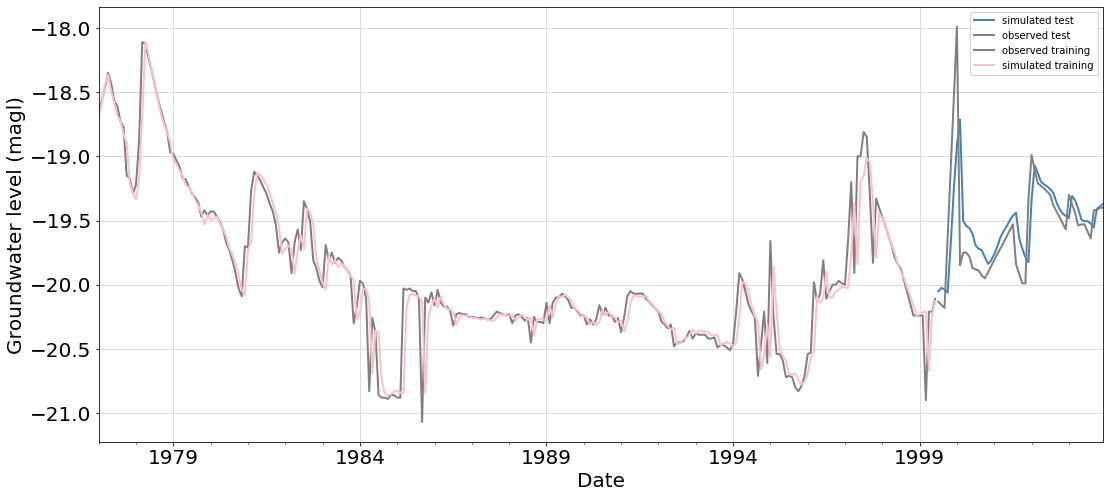

In [98]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))



df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [99]:
y_lstm = out_df['simulated test']

### GRU

In [100]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [101]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(54, 6)

    #running function
    gwl = -0.45728445
    test_forecast = X_test
    steps_ahead = 54
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Train on 270 samples, validate on 54 samples
Epoch 1/1000
 96/270 [=========>....................] - ETA: 3s - loss: 0.8217 - mean_squared_error: 0.8217
Epoch 00001: val_loss improved from inf to 0.74916, saving model to model.h5
270/270 [==============================] - 4s 15ms/sample - loss: 0.6789 - mean_squared_error: 0.6789 - val_loss: 0.7492 - val_mean_squared_error: 0.7492
Epoch 2/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.5233 - mean_squared_error: 0.5233
Epoch 00002: val_loss did not improve from 0.74916
270/270 [==============================] - 0s 77us/sample - loss: 0.5886 - mean_squared_error: 0.5886 - val_loss: 0.7723 - val_mean_squared_error: 0.7723
Epoch 3/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.5594 - mean_squared_error: 0.5594
Epoch 00003: val_loss did not improve from 0.74916
270/270 [==============================] - 0s 75us/sample - loss: 0.5488 - mean_squared_error: 0.5488 - val_loss: 0.7897

 96/270 [=========>....................] - ETA: 0s - loss: 0.2054 - mean_squared_error: 0.2054
Epoch 00026: val_loss improved from 0.65519 to 0.63769, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.2225 - mean_squared_error: 0.2225 - val_loss: 0.6377 - val_mean_squared_error: 0.6377
Epoch 27/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1994 - mean_squared_error: 0.1994
Epoch 00027: val_loss improved from 0.63769 to 0.62255, saving model to model.h5
270/270 [==============================] - 0s 128us/sample - loss: 0.2145 - mean_squared_error: 0.2145 - val_loss: 0.6226 - val_mean_squared_error: 0.6226
Epoch 28/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2118 - mean_squared_error: 0.2118
Epoch 00028: val_loss improved from 0.62255 to 0.60659, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.2009 - mean_squared_error: 0.2009 - val_loss: 0.6066 - val_mean_s

Epoch 50/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1575 - mean_squared_error: 0.1575
Epoch 00050: val_loss improved from 0.38042 to 0.37344, saving model to model.h5
270/270 [==============================] - 0s 127us/sample - loss: 0.1485 - mean_squared_error: 0.1485 - val_loss: 0.3734 - val_mean_squared_error: 0.3734
Epoch 51/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1929 - mean_squared_error: 0.1929
Epoch 00051: val_loss improved from 0.37344 to 0.36899, saving model to model.h5
270/270 [==============================] - 0s 148us/sample - loss: 0.1555 - mean_squared_error: 0.1555 - val_loss: 0.3690 - val_mean_squared_error: 0.3690
Epoch 52/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1816 - mean_squared_error: 0.1816
Epoch 00052: val_loss improved from 0.36899 to 0.36538, saving model to model.h5
270/270 [==============================] - 0s 181us/sample - loss: 0.1519 - mean_squared_error: 0.1519 - val_loss: 0.365

Epoch 74/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1276 - mean_squared_error: 0.1276
Epoch 00074: val_loss improved from 0.30657 to 0.30442, saving model to model.h5
270/270 [==============================] - 0s 126us/sample - loss: 0.1291 - mean_squared_error: 0.1291 - val_loss: 0.3044 - val_mean_squared_error: 0.3044
Epoch 75/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1098 - mean_squared_error: 0.1098
Epoch 00075: val_loss did not improve from 0.30442
270/270 [==============================] - 0s 67us/sample - loss: 0.1313 - mean_squared_error: 0.1313 - val_loss: 0.3052 - val_mean_squared_error: 0.3052
Epoch 76/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1225 - mean_squared_error: 0.1225
Epoch 00076: val_loss improved from 0.30442 to 0.30378, saving model to model.h5
270/270 [==============================] - 0s 128us/sample - loss: 0.1305 - mean_squared_error: 0.1305 - val_loss: 0.3038 - val_mean_squared_error: 0.3

Epoch 98/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0949 - mean_squared_error: 0.0949
Epoch 00098: val_loss did not improve from 0.28520
270/270 [==============================] - 0s 72us/sample - loss: 0.1291 - mean_squared_error: 0.1291 - val_loss: 0.2853 - val_mean_squared_error: 0.2853
Epoch 99/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1171 - mean_squared_error: 0.1171
Epoch 00099: val_loss improved from 0.28520 to 0.28389, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.1262 - mean_squared_error: 0.1262 - val_loss: 0.2839 - val_mean_squared_error: 0.2839
Epoch 100/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1120 - mean_squared_error: 0.1120
Epoch 00100: val_loss did not improve from 0.28389
270/270 [==============================] - 0s 68us/sample - loss: 0.1211 - mean_squared_error: 0.1211 - val_loss: 0.2839 - val_mean_squared_error: 0.2839
Epoch 101/1000
 96/270 [==

 96/270 [=========>....................] - ETA: 0s - loss: 0.1171 - mean_squared_error: 0.1171
Epoch 00122: val_loss improved from 0.27826 to 0.27796, saving model to model.h5
270/270 [==============================] - 0s 119us/sample - loss: 0.1245 - mean_squared_error: 0.1245 - val_loss: 0.2780 - val_mean_squared_error: 0.2780
Epoch 123/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1081 - mean_squared_error: 0.1081
Epoch 00123: val_loss improved from 0.27796 to 0.27749, saving model to model.h5
270/270 [==============================] - 0s 133us/sample - loss: 0.1166 - mean_squared_error: 0.1166 - val_loss: 0.2775 - val_mean_squared_error: 0.2775
Epoch 124/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1409 - mean_squared_error: 0.1409
Epoch 00124: val_loss did not improve from 0.27749
270/270 [==============================] - 0s 72us/sample - loss: 0.1353 - mean_squared_error: 0.1353 - val_loss: 0.2780 - val_mean_squared_error: 0.2780
Epoch 12

Epoch 147/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 00147: val_loss improved from 0.27424 to 0.27407, saving model to model.h5
270/270 [==============================] - 0s 124us/sample - loss: 0.1184 - mean_squared_error: 0.1184 - val_loss: 0.2741 - val_mean_squared_error: 0.2741
Epoch 148/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1091 - mean_squared_error: 0.1091
Epoch 00148: val_loss improved from 0.27407 to 0.27363, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.1153 - mean_squared_error: 0.1153 - val_loss: 0.2736 - val_mean_squared_error: 0.2736
Epoch 149/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1305 - mean_squared_error: 0.1305
Epoch 00149: val_loss did not improve from 0.27363
270/270 [==============================] - 0s 69us/sample - loss: 0.1212 - mean_squared_error: 0.1212 - val_loss: 0.2739 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0854 - mean_squared_error: 0.0854
Epoch 00172: val_loss did not improve from 0.27181
270/270 [==============================] - 0s 75us/sample - loss: 0.1177 - mean_squared_error: 0.1177 - val_loss: 0.2718 - val_mean_squared_error: 0.2718
Epoch 173/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0598 - mean_squared_error: 0.0598
Epoch 00173: val_loss improved from 0.27181 to 0.27153, saving model to model.h5
270/270 [==============================] - 0s 126us/sample - loss: 0.1251 - mean_squared_error: 0.1251 - val_loss: 0.2715 - val_mean_squared_error: 0.2715
Epoch 174/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 00174: val_loss improved from 0.27153 to 0.27147, saving model to model.h5
270/270 [==============================] - 0s 122us/sample - loss: 0.1196 - mean_squared_error: 0.1196 - val_loss: 0.2715 - val_mean_squared_error: 0.2715
Epoch 17

270/270 [==============================] - 0s 126us/sample - loss: 0.1205 - mean_squared_error: 0.1205 - val_loss: 0.2695 - val_mean_squared_error: 0.2695
Epoch 198/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0609 - mean_squared_error: 0.0609
Epoch 00198: val_loss did not improve from 0.26952
270/270 [==============================] - 0s 71us/sample - loss: 0.1224 - mean_squared_error: 0.1224 - val_loss: 0.2695 - val_mean_squared_error: 0.2695
Epoch 199/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 00199: val_loss did not improve from 0.26952
270/270 [==============================] - 0s 72us/sample - loss: 0.1173 - mean_squared_error: 0.1173 - val_loss: 0.2699 - val_mean_squared_error: 0.2699
Epoch 200/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1134 - mean_squared_error: 0.1134
Epoch 00200: val_loss improved from 0.26952 to 0.26947, saving model to model.h5
270/270 [===============

Epoch 223/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 00223: val_loss did not improve from 0.26786
270/270 [==============================] - 0s 72us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.2683 - val_mean_squared_error: 0.2683
Epoch 224/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 00224: val_loss did not improve from 0.26786
270/270 [==============================] - 0s 73us/sample - loss: 0.1171 - mean_squared_error: 0.1171 - val_loss: 0.2680 - val_mean_squared_error: 0.2680
Epoch 225/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0890 - mean_squared_error: 0.0890
Epoch 00225: val_loss improved from 0.26786 to 0.26785, saving model to model.h5
270/270 [==============================] - 0s 134us/sample - loss: 0.1156 - mean_squared_error: 0.1156 - val_loss: 0.2679 - val_mean_squared_error: 0.2679
Epoch 226/1000
 96/270 [

 96/270 [=========>....................] - ETA: 0s - loss: 0.1508 - mean_squared_error: 0.1508
Epoch 00248: val_loss did not improve from 0.26628
270/270 [==============================] - 0s 73us/sample - loss: 0.1174 - mean_squared_error: 0.1174 - val_loss: 0.2666 - val_mean_squared_error: 0.2666
Epoch 249/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1481 - mean_squared_error: 0.1481
Epoch 00249: val_loss did not improve from 0.26628
270/270 [==============================] - 0s 71us/sample - loss: 0.1209 - mean_squared_error: 0.1209 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 250/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0877 - mean_squared_error: 0.0877
Epoch 00250: val_loss did not improve from 0.26628
270/270 [==============================] - 0s 71us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.2667 - val_mean_squared_error: 0.2667
Epoch 251/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 274/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0904 - mean_squared_error: 0.0904
Epoch 00274: val_loss did not improve from 0.26557
270/270 [==============================] - 0s 75us/sample - loss: 0.1197 - mean_squared_error: 0.1197 - val_loss: 0.2663 - val_mean_squared_error: 0.2663
Epoch 275/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0890 - mean_squared_error: 0.0890
Epoch 00275: val_loss did not improve from 0.26557
270/270 [==============================] - 0s 73us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.2662 - val_mean_squared_error: 0.2662
Epoch 276/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1299 - mean_squared_error: 0.1299
Epoch 00276: val_loss did not improve from 0.26557
270/270 [==============================] - 0s 70us/sample - loss: 0.1235 - mean_squared_error: 0.1235 - val_loss: 0.2659 - val_mean_squared_error: 0.2659
Epoch 277/1000
 96/270 [=========>....................]

Epoch 300/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1258 - mean_squared_error: 0.1258
Epoch 00300: val_loss did not improve from 0.26445
270/270 [==============================] - 0s 76us/sample - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.2648 - val_mean_squared_error: 0.2648
Epoch 301/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 00301: val_loss did not improve from 0.26445
270/270 [==============================] - 0s 73us/sample - loss: 0.1168 - mean_squared_error: 0.1168 - val_loss: 0.2652 - val_mean_squared_error: 0.2652
Epoch 302/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1173 - mean_squared_error: 0.1173
Epoch 00302: val_loss did not improve from 0.26445
270/270 [==============================] - 0s 80us/sample - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.2651 - val_mean_squared_error: 0.2651
Epoch 303/1000
 96/270 [=========>....................]

Epoch 326/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 00326: val_loss did not improve from 0.26389
270/270 [==============================] - 0s 71us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2643 - val_mean_squared_error: 0.2643
Epoch 327/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0728 - mean_squared_error: 0.0728
Epoch 00327: val_loss did not improve from 0.26389
270/270 [==============================] - 0s 70us/sample - loss: 0.1175 - mean_squared_error: 0.1175 - val_loss: 0.2643 - val_mean_squared_error: 0.2643
Epoch 328/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1552 - mean_squared_error: 0.1552
Epoch 00328: val_loss did not improve from 0.26389
270/270 [==============================] - 0s 72us/sample - loss: 0.1166 - mean_squared_error: 0.1166 - val_loss: 0.2644 - val_mean_squared_error: 0.2644
Epoch 329/1000
 96/270 [=========>....................]

Epoch 352/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 00352: val_loss did not improve from 0.26366
270/270 [==============================] - 0s 75us/sample - loss: 0.1142 - mean_squared_error: 0.1142 - val_loss: 0.2641 - val_mean_squared_error: 0.2641
Epoch 353/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0973 - mean_squared_error: 0.0973
Epoch 00353: val_loss did not improve from 0.26366
270/270 [==============================] - 0s 73us/sample - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.2639 - val_mean_squared_error: 0.2639
Epoch 354/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 00354: val_loss did not improve from 0.26366
270/270 [==============================] - 0s 78us/sample - loss: 0.1164 - mean_squared_error: 0.1164 - val_loss: 0.2639 - val_mean_squared_error: 0.2639
Epoch 355/1000
 96/270 [=========>....................]

Epoch 378/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1117 - mean_squared_error: 0.1117
Epoch 00378: val_loss did not improve from 0.26340
270/270 [==============================] - 0s 78us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.2640 - val_mean_squared_error: 0.2640
Epoch 379/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1271 - mean_squared_error: 0.1271
Epoch 00379: val_loss did not improve from 0.26340
270/270 [==============================] - 0s 78us/sample - loss: 0.1119 - mean_squared_error: 0.1119 - val_loss: 0.2640 - val_mean_squared_error: 0.2640
Epoch 380/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0897 - mean_squared_error: 0.0897
Epoch 00380: val_loss did not improve from 0.26340
270/270 [==============================] - 0s 85us/sample - loss: 0.1165 - mean_squared_error: 0.1165 - val_loss: 0.2639 - val_mean_squared_error: 0.2639
Epoch 381/1000
 96/270 [=========>....................]

Epoch 404/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1541 - mean_squared_error: 0.1541
Epoch 00404: val_loss did not improve from 0.26324
270/270 [==============================] - 0s 79us/sample - loss: 0.1198 - mean_squared_error: 0.1198 - val_loss: 0.2634 - val_mean_squared_error: 0.2634
Epoch 405/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 00405: val_loss did not improve from 0.26324
270/270 [==============================] - 0s 75us/sample - loss: 0.1142 - mean_squared_error: 0.1142 - val_loss: 0.2636 - val_mean_squared_error: 0.2636
Epoch 406/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1151 - mean_squared_error: 0.1151
Epoch 00406: val_loss did not improve from 0.26324
270/270 [==============================] - 0s 77us/sample - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.2639 - val_mean_squared_error: 0.2639
Epoch 407/1000
 96/270 [=========>....................]

Epoch 430/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1256 - mean_squared_error: 0.1256
Epoch 00430: val_loss did not improve from 0.26294
270/270 [==============================] - 0s 79us/sample - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.2630 - val_mean_squared_error: 0.2630
Epoch 431/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1426 - mean_squared_error: 0.1426
Epoch 00431: val_loss did not improve from 0.26294
270/270 [==============================] - 0s 80us/sample - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.2631 - val_mean_squared_error: 0.2631
Epoch 432/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0992 - mean_squared_error: 0.0992
Epoch 00432: val_loss did not improve from 0.26294
270/270 [==============================] - 0s 76us/sample - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.2632 - val_mean_squared_error: 0.2632
Epoch 433/1000
 96/270 [=========>....................]

Epoch 456/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0795 - mean_squared_error: 0.0795
Epoch 00456: val_loss did not improve from 0.26272
270/270 [==============================] - 0s 77us/sample - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.2633 - val_mean_squared_error: 0.2633
Epoch 457/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1249 - mean_squared_error: 0.1249
Epoch 00457: val_loss did not improve from 0.26272
270/270 [==============================] - 0s 78us/sample - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.2633 - val_mean_squared_error: 0.2633
Epoch 458/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1143 - mean_squared_error: 0.1143
Epoch 00458: val_loss did not improve from 0.26272
270/270 [==============================] - 0s 78us/sample - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.2634 - val_mean_squared_error: 0.2634
Epoch 459/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00482: val_loss did not improve from 0.26272
270/270 [==============================] - 0s 76us/sample - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.2634 - val_mean_squared_error: 0.2634
Epoch 483/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1309 - mean_squared_error: 0.1309
Epoch 00483: val_loss did not improve from 0.26272
270/270 [==============================] - 0s 76us/sample - loss: 0.1086 - mean_squared_error: 0.1086 - val_loss: 0.2641 - val_mean_squared_error: 0.2641
Epoch 484/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 00484: val_loss did not improve from 0.26272
270/270 [==============================] - 0s 72us/sample - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.2638 - val_mean_squared_error: 0.2638
Epoch 485/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0900 - mean_squared_error: 0.0900
Epoch 00508: val_loss did not improve from 0.26272
270/270 [==============================] - 0s 76us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.2639 - val_mean_squared_error: 0.2639
Epoch 509/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1313 - mean_squared_error: 0.1313
Epoch 00509: val_loss did not improve from 0.26272
270/270 [==============================] - 0s 77us/sample - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.2638 - val_mean_squared_error: 0.2638
Epoch 510/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0656 - mean_squared_error: 0.0656
Epoch 00510: val_loss did not improve from 0.26272
270/270 [==============================] - 0s 77us/sample - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.2643 - val_mean_squared_error: 0.2643
Epoch 511/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0917 - mean_squared_error: 0.0917
Epoch 00534: val_loss did not improve from 0.26272
270/270 [==============================] - 0s 77us/sample - loss: 0.1167 - mean_squared_error: 0.1167 - val_loss: 0.2638 - val_mean_squared_error: 0.2638
Epoch 535/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1263 - mean_squared_error: 0.1263
Epoch 00535: val_loss did not improve from 0.26272
270/270 [==============================] - 0s 83us/sample - loss: 0.1134 - mean_squared_error: 0.1134 - val_loss: 0.2640 - val_mean_squared_error: 0.2640
Epoch 536/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1486 - mean_squared_error: 0.1486
Epoch 00536: val_loss did not improve from 0.26272
270/270 [==============================] - 0s 76us/sample - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.2640 - val_mean_squared_error: 0.2640
Epoch 537/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 10/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4484 - mean_squared_error: 0.4484
Epoch 00010: val_loss did not improve from 0.83773
270/270 [==============================] - 0s 72us/sample - loss: 0.4941 - mean_squared_error: 0.4941 - val_loss: 1.0081 - val_mean_squared_error: 1.0081
Epoch 11/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.5736 - mean_squared_error: 0.5736
Epoch 00011: val_loss did not improve from 0.83773
270/270 [==============================] - 0s 70us/sample - loss: 0.4810 - mean_squared_error: 0.4810 - val_loss: 1.0236 - val_mean_squared_error: 1.0236
Epoch 12/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4970 - mean_squared_error: 0.4970
Epoch 00012: val_loss did not improve from 0.83773
270/270 [==============================] - 0s 69us/sample - loss: 0.4474 - mean_squared_error: 0.4474 - val_loss: 1.0383 - val_mean_squared_error: 1.0383
Epoch 13/1000
 96/270 [=========>....................] - E

 96/270 [=========>....................] - ETA: 0s - loss: 0.1867 - mean_squared_error: 0.1867
Epoch 00036: val_loss did not improve from 0.83773
270/270 [==============================] - 0s 69us/sample - loss: 0.2072 - mean_squared_error: 0.2072 - val_loss: 0.8742 - val_mean_squared_error: 0.8742
Epoch 37/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2378 - mean_squared_error: 0.2378
Epoch 00037: val_loss did not improve from 0.83773
270/270 [==============================] - 0s 71us/sample - loss: 0.2054 - mean_squared_error: 0.2054 - val_loss: 0.8505 - val_mean_squared_error: 0.8505
Epoch 38/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2284 - mean_squared_error: 0.2284
Epoch 00038: val_loss improved from 0.83773 to 0.82824, saving model to model.h5
270/270 [==============================] - 0s 123us/sample - loss: 0.1970 - mean_squared_error: 0.1970 - val_loss: 0.8282 - val_mean_squared_error: 0.8282
Epoch 39/1000
 96/270 [=========>........

Epoch 60/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 00060: val_loss improved from 0.48788 to 0.47592, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.1531 - mean_squared_error: 0.1531 - val_loss: 0.4759 - val_mean_squared_error: 0.4759
Epoch 61/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1829 - mean_squared_error: 0.1829
Epoch 00061: val_loss improved from 0.47592 to 0.46680, saving model to model.h5
270/270 [==============================] - 0s 131us/sample - loss: 0.1515 - mean_squared_error: 0.1515 - val_loss: 0.4668 - val_mean_squared_error: 0.4668
Epoch 62/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1403 - mean_squared_error: 0.1403
Epoch 00062: val_loss improved from 0.46680 to 0.45658, saving model to model.h5
270/270 [==============================] - 0s 126us/sample - loss: 0.1484 - mean_squared_error: 0.1484 - val_loss: 0.456

Epoch 84/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0756 - mean_squared_error: 0.0756
Epoch 00084: val_loss improved from 0.33240 to 0.32880, saving model to model.h5
270/270 [==============================] - 0s 145us/sample - loss: 0.1280 - mean_squared_error: 0.1280 - val_loss: 0.3288 - val_mean_squared_error: 0.3288
Epoch 85/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1046 - mean_squared_error: 0.1046
Epoch 00085: val_loss improved from 0.32880 to 0.32512, saving model to model.h5
270/270 [==============================] - 0s 134us/sample - loss: 0.1238 - mean_squared_error: 0.1238 - val_loss: 0.3251 - val_mean_squared_error: 0.3251
Epoch 86/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0972 - mean_squared_error: 0.0972
Epoch 00086: val_loss improved from 0.32512 to 0.32180, saving model to model.h5
270/270 [==============================] - 0s 131us/sample - loss: 0.1306 - mean_squared_error: 0.1306 - val_loss: 0.321

Epoch 108/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1357 - mean_squared_error: 0.1357
Epoch 00108: val_loss improved from 0.29088 to 0.29004, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.1278 - mean_squared_error: 0.1278 - val_loss: 0.2900 - val_mean_squared_error: 0.2900
Epoch 109/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 00109: val_loss improved from 0.29004 to 0.28886, saving model to model.h5
270/270 [==============================] - 0s 128us/sample - loss: 0.1171 - mean_squared_error: 0.1171 - val_loss: 0.2889 - val_mean_squared_error: 0.2889
Epoch 110/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1632 - mean_squared_error: 0.1632
Epoch 00110: val_loss improved from 0.28886 to 0.28801, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.1226 - mean_squared_error: 0.1226 - val_loss: 0.

 96/270 [=========>....................] - ETA: 0s - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 00132: val_loss did not improve from 0.27838
270/270 [==============================] - 0s 74us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.2791 - val_mean_squared_error: 0.2791
Epoch 133/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1142 - mean_squared_error: 0.1142
Epoch 00133: val_loss did not improve from 0.27838
270/270 [==============================] - 0s 70us/sample - loss: 0.1168 - mean_squared_error: 0.1168 - val_loss: 0.2790 - val_mean_squared_error: 0.2790
Epoch 134/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 00134: val_loss improved from 0.27838 to 0.27825, saving model to model.h5
270/270 [==============================] - 0s 125us/sample - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.2782 - val_mean_squared_error: 0.2782
Epoch 135/1000
 96/270 [=========>.....

Epoch 157/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 00157: val_loss did not improve from 0.27535
270/270 [==============================] - 0s 74us/sample - loss: 0.1140 - mean_squared_error: 0.1140 - val_loss: 0.2764 - val_mean_squared_error: 0.2764
Epoch 158/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1583 - mean_squared_error: 0.1583
Epoch 00158: val_loss did not improve from 0.27535
270/270 [==============================] - 0s 72us/sample - loss: 0.1274 - mean_squared_error: 0.1274 - val_loss: 0.2765 - val_mean_squared_error: 0.2765
Epoch 159/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1162 - mean_squared_error: 0.1162
Epoch 00159: val_loss improved from 0.27535 to 0.27528, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.2753 - val_mean_squared_error: 0.2753
Epoch 160/1000
 96/270 [

 96/270 [=========>....................] - ETA: 0s - loss: 0.0815 - mean_squared_error: 0.0815
Epoch 00182: val_loss did not improve from 0.27308
270/270 [==============================] - 0s 71us/sample - loss: 0.1230 - mean_squared_error: 0.1230 - val_loss: 0.2731 - val_mean_squared_error: 0.2731
Epoch 183/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 00183: val_loss did not improve from 0.27308
270/270 [==============================] - 0s 69us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2742 - val_mean_squared_error: 0.2742
Epoch 184/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 00184: val_loss did not improve from 0.27308
270/270 [==============================] - 0s 74us/sample - loss: 0.1152 - mean_squared_error: 0.1152 - val_loss: 0.2740 - val_mean_squared_error: 0.2740
Epoch 185/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 208/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1601 - mean_squared_error: 0.1601
Epoch 00208: val_loss improved from 0.27224 to 0.27157, saving model to model.h5
270/270 [==============================] - 0s 133us/sample - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.2716 - val_mean_squared_error: 0.2716
Epoch 209/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1435 - mean_squared_error: 0.1435
Epoch 00209: val_loss did not improve from 0.27157
270/270 [==============================] - 0s 73us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.2724 - val_mean_squared_error: 0.2724
Epoch 210/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1215 - mean_squared_error: 0.1215
Epoch 00210: val_loss did not improve from 0.27157
270/270 [==============================] - 0s 78us/sample - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.2722 - val_mean_squared_error: 0.2722
Epoch 211/1000
 96/270 [

Epoch 234/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1363 - mean_squared_error: 0.1363
Epoch 00234: val_loss did not improve from 0.27153
270/270 [==============================] - 0s 77us/sample - loss: 0.1203 - mean_squared_error: 0.1203 - val_loss: 0.2719 - val_mean_squared_error: 0.2719
Epoch 235/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 00235: val_loss did not improve from 0.27153
270/270 [==============================] - 0s 78us/sample - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.2717 - val_mean_squared_error: 0.2717
Epoch 236/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 00236: val_loss improved from 0.27153 to 0.27121, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.1185 - mean_squared_error: 0.1185 - val_loss: 0.2712 - val_mean_squared_error: 0.2712
Epoch 237/1000
 96/270 [

Epoch 260/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 00260: val_loss did not improve from 0.26965
270/270 [==============================] - 0s 78us/sample - loss: 0.1080 - mean_squared_error: 0.1080 - val_loss: 0.2707 - val_mean_squared_error: 0.2707
Epoch 261/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1274 - mean_squared_error: 0.1274
Epoch 00261: val_loss did not improve from 0.26965
270/270 [==============================] - 0s 102us/sample - loss: 0.1171 - mean_squared_error: 0.1171 - val_loss: 0.2700 - val_mean_squared_error: 0.2700
Epoch 262/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1503 - mean_squared_error: 0.1503
Epoch 00262: val_loss did not improve from 0.26965
270/270 [==============================] - 0s 75us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.2698 - val_mean_squared_error: 0.2698
Epoch 263/1000
 96/270 [=========>....................

Epoch 286/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0757 - mean_squared_error: 0.0757
Epoch 00286: val_loss did not improve from 0.26955
270/270 [==============================] - 0s 77us/sample - loss: 0.1142 - mean_squared_error: 0.1142 - val_loss: 0.2698 - val_mean_squared_error: 0.2698
Epoch 287/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1574 - mean_squared_error: 0.1574
Epoch 00287: val_loss did not improve from 0.26955
270/270 [==============================] - 0s 73us/sample - loss: 0.1171 - mean_squared_error: 0.1171 - val_loss: 0.2700 - val_mean_squared_error: 0.2700
Epoch 288/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1498 - mean_squared_error: 0.1498
Epoch 00288: val_loss did not improve from 0.26955
270/270 [==============================] - 0s 84us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.2703 - val_mean_squared_error: 0.2703
Epoch 289/1000
 96/270 [=========>....................]

Epoch 312/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1534 - mean_squared_error: 0.1534
Epoch 00312: val_loss did not improve from 0.26859
270/270 [==============================] - 0s 84us/sample - loss: 0.1165 - mean_squared_error: 0.1165 - val_loss: 0.2692 - val_mean_squared_error: 0.2692
Epoch 313/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1485 - mean_squared_error: 0.1485
Epoch 00313: val_loss did not improve from 0.26859
270/270 [==============================] - 0s 73us/sample - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.2690 - val_mean_squared_error: 0.2690
Epoch 314/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 00314: val_loss did not improve from 0.26859
270/270 [==============================] - 0s 74us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.2688 - val_mean_squared_error: 0.2688
Epoch 315/1000
 96/270 [=========>....................]

Epoch 338/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 00338: val_loss did not improve from 0.26798
270/270 [==============================] - 0s 80us/sample - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.2692 - val_mean_squared_error: 0.2692
Epoch 339/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0820 - mean_squared_error: 0.0820
Epoch 00339: val_loss did not improve from 0.26798
270/270 [==============================] - 0s 73us/sample - loss: 0.1145 - mean_squared_error: 0.1145 - val_loss: 0.2693 - val_mean_squared_error: 0.2693
Epoch 340/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 00340: val_loss did not improve from 0.26798
270/270 [==============================] - 0s 78us/sample - loss: 0.1088 - mean_squared_error: 0.1088 - val_loss: 0.2692 - val_mean_squared_error: 0.2692
Epoch 341/1000
 96/270 [=========>....................]

Epoch 364/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 00364: val_loss did not improve from 0.26769
270/270 [==============================] - 0s 75us/sample - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.2687 - val_mean_squared_error: 0.2687
Epoch 365/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0638 - mean_squared_error: 0.0638
Epoch 00365: val_loss did not improve from 0.26769
270/270 [==============================] - 0s 75us/sample - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.2680 - val_mean_squared_error: 0.2680
Epoch 366/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1596 - mean_squared_error: 0.1596
Epoch 00366: val_loss did not improve from 0.26769
270/270 [==============================] - 0s 74us/sample - loss: 0.1168 - mean_squared_error: 0.1168 - val_loss: 0.2690 - val_mean_squared_error: 0.2690
Epoch 367/1000
 96/270 [=========>....................]

Epoch 390/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0839 - mean_squared_error: 0.0839
Epoch 00390: val_loss did not improve from 0.26731
270/270 [==============================] - 0s 76us/sample - loss: 0.1194 - mean_squared_error: 0.1194 - val_loss: 0.2678 - val_mean_squared_error: 0.2678
Epoch 391/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0907 - mean_squared_error: 0.0907
Epoch 00391: val_loss did not improve from 0.26731
270/270 [==============================] - 0s 76us/sample - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.2683 - val_mean_squared_error: 0.2683
Epoch 392/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1156 - mean_squared_error: 0.1156
Epoch 00392: val_loss did not improve from 0.26731
270/270 [==============================] - 0s 77us/sample - loss: 0.1191 - mean_squared_error: 0.1191 - val_loss: 0.2691 - val_mean_squared_error: 0.2691
Epoch 393/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 00416: val_loss did not improve from 0.26731
270/270 [==============================] - 0s 76us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.2679 - val_mean_squared_error: 0.2679
Epoch 417/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0867 - mean_squared_error: 0.0867
Epoch 00417: val_loss did not improve from 0.26731
270/270 [==============================] - 0s 76us/sample - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.2674 - val_mean_squared_error: 0.2674
Epoch 418/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1329 - mean_squared_error: 0.1329
Epoch 00418: val_loss did not improve from 0.26731
270/270 [==============================] - 0s 78us/sample - loss: 0.1176 - mean_squared_error: 0.1176 - val_loss: 0.2674 - val_mean_squared_error: 0.2674
Epoch 419/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 442/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1495 - mean_squared_error: 0.1495
Epoch 00442: val_loss did not improve from 0.26673
270/270 [==============================] - 0s 78us/sample - loss: 0.1167 - mean_squared_error: 0.1167 - val_loss: 0.2680 - val_mean_squared_error: 0.2680
Epoch 443/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 00443: val_loss did not improve from 0.26673
270/270 [==============================] - 0s 78us/sample - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.2683 - val_mean_squared_error: 0.2683
Epoch 444/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1071 - mean_squared_error: 0.1071
Epoch 00444: val_loss did not improve from 0.26673
270/270 [==============================] - 0s 77us/sample - loss: 0.1134 - mean_squared_error: 0.1134 - val_loss: 0.2682 - val_mean_squared_error: 0.2682
Epoch 445/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0984 - mean_squared_error: 0.0984
Epoch 00468: val_loss did not improve from 0.26673
270/270 [==============================] - 0s 75us/sample - loss: 0.1076 - mean_squared_error: 0.1076 - val_loss: 0.2679 - val_mean_squared_error: 0.2679
Epoch 469/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 00469: val_loss did not improve from 0.26673
270/270 [==============================] - 0s 79us/sample - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 470/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1456 - mean_squared_error: 0.1456
Epoch 00470: val_loss did not improve from 0.26673
270/270 [==============================] - 0s 77us/sample - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.2674 - val_mean_squared_error: 0.2674
Epoch 471/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.1168 - mean_squared_error: 0.1168
Epoch 00494: val_loss did not improve from 0.26673
270/270 [==============================] - 0s 76us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.2669 - val_mean_squared_error: 0.2669
Epoch 495/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1173 - mean_squared_error: 0.1173
Epoch 00495: val_loss improved from 0.26673 to 0.26645, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.1164 - mean_squared_error: 0.1164 - val_loss: 0.2664 - val_mean_squared_error: 0.2664
Epoch 496/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0775 - mean_squared_error: 0.0775
Epoch 00496: val_loss did not improve from 0.26645
270/270 [==============================] - 0s 79us/sample - loss: 0.1136 - mean_squared_error: 0.1136 - val_loss: 0.2673 - val_mean_squared_error: 0.2673
Epoch 497/1000
 96/270 [=========>.....

Epoch 520/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1169 - mean_squared_error: 0.1169
Epoch 00520: val_loss did not improve from 0.26630
270/270 [==============================] - 0s 78us/sample - loss: 0.1197 - mean_squared_error: 0.1197 - val_loss: 0.2675 - val_mean_squared_error: 0.2675
Epoch 521/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 00521: val_loss did not improve from 0.26630
270/270 [==============================] - 0s 77us/sample - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 522/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 00522: val_loss did not improve from 0.26630
270/270 [==============================] - 0s 76us/sample - loss: 0.1124 - mean_squared_error: 0.1124 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 523/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.1217 - mean_squared_error: 0.1217
Epoch 00546: val_loss did not improve from 0.26630
270/270 [==============================] - 0s 75us/sample - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 547/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1168 - mean_squared_error: 0.1168
Epoch 00547: val_loss did not improve from 0.26630
270/270 [==============================] - 0s 75us/sample - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 548/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1186 - mean_squared_error: 0.1186
Epoch 00548: val_loss did not improve from 0.26630
270/270 [==============================] - 0s 73us/sample - loss: 0.1129 - mean_squared_error: 0.1129 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 549/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0882 - mean_squared_error: 0.0882
Epoch 00572: val_loss did not improve from 0.26630
270/270 [==============================] - 0s 78us/sample - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.2678 - val_mean_squared_error: 0.2678
Epoch 573/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0962 - mean_squared_error: 0.0962
Epoch 00573: val_loss did not improve from 0.26630
270/270 [==============================] - 0s 85us/sample - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.2678 - val_mean_squared_error: 0.2678
Epoch 574/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 00574: val_loss did not improve from 0.26630
270/270 [==============================] - 0s 77us/sample - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 575/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0767 - mean_squared_error: 0.0767
Epoch 00598: val_loss did not improve from 0.26630
270/270 [==============================] - 0s 77us/sample - loss: 0.1156 - mean_squared_error: 0.1156 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 599/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 00599: val_loss did not improve from 0.26630
270/270 [==============================] - 0s 77us/sample - loss: 0.1126 - mean_squared_error: 0.1126 - val_loss: 0.2665 - val_mean_squared_error: 0.2665
Epoch 600/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1285 - mean_squared_error: 0.1285
Epoch 00600: val_loss improved from 0.26630 to 0.26622, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2662 - val_mean_squared_error: 0.2662
Epoch 601/1000
 96/270 [=========>.....

Epoch 624/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0976 - mean_squared_error: 0.0976
Epoch 00624: val_loss did not improve from 0.26622
270/270 [==============================] - 0s 76us/sample - loss: 0.1159 - mean_squared_error: 0.1159 - val_loss: 0.2677 - val_mean_squared_error: 0.2677
Epoch 625/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1285 - mean_squared_error: 0.1285
Epoch 00625: val_loss did not improve from 0.26622
270/270 [==============================] - 0s 71us/sample - loss: 0.1140 - mean_squared_error: 0.1140 - val_loss: 0.2674 - val_mean_squared_error: 0.2674
Epoch 626/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 00626: val_loss did not improve from 0.26622
270/270 [==============================] - 0s 73us/sample - loss: 0.1124 - mean_squared_error: 0.1124 - val_loss: 0.2680 - val_mean_squared_error: 0.2680
Epoch 627/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.1576 - mean_squared_error: 0.1576
Epoch 00650: val_loss did not improve from 0.26622
270/270 [==============================] - 0s 79us/sample - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.2674 - val_mean_squared_error: 0.2674
Epoch 651/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1257 - mean_squared_error: 0.1257
Epoch 00651: val_loss did not improve from 0.26622
270/270 [==============================] - 0s 71us/sample - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 652/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0770 - mean_squared_error: 0.0770
Epoch 00652: val_loss did not improve from 0.26622
270/270 [==============================] - 0s 73us/sample - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.2672 - val_mean_squared_error: 0.2672
Epoch 653/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 00676: val_loss did not improve from 0.26622
270/270 [==============================] - 0s 70us/sample - loss: 0.1142 - mean_squared_error: 0.1142 - val_loss: 0.2669 - val_mean_squared_error: 0.2669
Epoch 677/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 00677: val_loss did not improve from 0.26622
270/270 [==============================] - 0s 74us/sample - loss: 0.1038 - mean_squared_error: 0.1038 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 678/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1162 - mean_squared_error: 0.1162
Epoch 00678: val_loss did not improve from 0.26622
270/270 [==============================] - 0s 73us/sample - loss: 0.1157 - mean_squared_error: 0.1157 - val_loss: 0.2674 - val_mean_squared_error: 0.2674
Epoch 679/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 2/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.7237 - mean_squared_error: 0.7237
Epoch 00002: val_loss did not improve from 0.95504
270/270 [==============================] - 0s 74us/sample - loss: 0.7834 - mean_squared_error: 0.7834 - val_loss: 0.9820 - val_mean_squared_error: 0.9820
Epoch 3/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.6750 - mean_squared_error: 0.6750
Epoch 00003: val_loss did not improve from 0.95504
270/270 [==============================] - 0s 75us/sample - loss: 0.7293 - mean_squared_error: 0.7293 - val_loss: 1.0023 - val_mean_squared_error: 1.0023
Epoch 4/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.7829 - mean_squared_error: 0.7829
Epoch 00004: val_loss did not improve from 0.95504
270/270 [==============================] - 0s 74us/sample - loss: 0.6897 - mean_squared_error: 0.6897 - val_loss: 1.0216 - val_mean_squared_error: 1.0216
Epoch 5/1000
 96/270 [=========>....................] - ETA: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.2434 - mean_squared_error: 0.2434
Epoch 00028: val_loss did not improve from 0.95504
270/270 [==============================] - 0s 74us/sample - loss: 0.2499 - mean_squared_error: 0.2499 - val_loss: 0.9912 - val_mean_squared_error: 0.9912
Epoch 29/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2284 - mean_squared_error: 0.2284
Epoch 00029: val_loss did not improve from 0.95504
270/270 [==============================] - 0s 78us/sample - loss: 0.2372 - mean_squared_error: 0.2372 - val_loss: 0.9656 - val_mean_squared_error: 0.9656
Epoch 30/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2427 - mean_squared_error: 0.2427
Epoch 00030: val_loss improved from 0.95504 to 0.94139, saving model to model.h5
270/270 [==============================] - 0s 143us/sample - loss: 0.2315 - mean_squared_error: 0.2315 - val_loss: 0.9414 - val_mean_squared_error: 0.9414
Epoch 31/1000
 96/270 [=========>........

Epoch 52/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1609 - mean_squared_error: 0.1609
Epoch 00052: val_loss improved from 0.51397 to 0.50081, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.1707 - mean_squared_error: 0.1707 - val_loss: 0.5008 - val_mean_squared_error: 0.5008
Epoch 53/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1418 - mean_squared_error: 0.1418
Epoch 00053: val_loss improved from 0.50081 to 0.48845, saving model to model.h5
270/270 [==============================] - 0s 142us/sample - loss: 0.1798 - mean_squared_error: 0.1798 - val_loss: 0.4884 - val_mean_squared_error: 0.4884
Epoch 54/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1234 - mean_squared_error: 0.1234
Epoch 00054: val_loss improved from 0.48845 to 0.47601, saving model to model.h5
270/270 [==============================] - 0s 127us/sample - loss: 0.1632 - mean_squared_error: 0.1632 - val_loss: 0.476

Epoch 76/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 00076: val_loss improved from 0.34010 to 0.33682, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.1337 - mean_squared_error: 0.1337 - val_loss: 0.3368 - val_mean_squared_error: 0.3368
Epoch 77/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1500 - mean_squared_error: 0.1500
Epoch 00077: val_loss improved from 0.33682 to 0.33405, saving model to model.h5
270/270 [==============================] - 0s 124us/sample - loss: 0.1338 - mean_squared_error: 0.1338 - val_loss: 0.3340 - val_mean_squared_error: 0.3340
Epoch 78/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1340 - mean_squared_error: 0.1340
Epoch 00078: val_loss improved from 0.33405 to 0.33108, saving model to model.h5
270/270 [==============================] - 0s 125us/sample - loss: 0.1418 - mean_squared_error: 0.1418 - val_loss: 0.331

Epoch 100/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0858 - mean_squared_error: 0.0858
Epoch 00100: val_loss improved from 0.30153 to 0.30082, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.1219 - mean_squared_error: 0.1219 - val_loss: 0.3008 - val_mean_squared_error: 0.3008
Epoch 101/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1329 - mean_squared_error: 0.1329
Epoch 00101: val_loss improved from 0.30082 to 0.29998, saving model to model.h5
270/270 [==============================] - 0s 126us/sample - loss: 0.1220 - mean_squared_error: 0.1220 - val_loss: 0.3000 - val_mean_squared_error: 0.3000
Epoch 102/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1261 - mean_squared_error: 0.1261
Epoch 00102: val_loss improved from 0.29998 to 0.29960, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.1261 - mean_squared_error: 0.1261 - val_loss: 0.

Epoch 124/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1344 - mean_squared_error: 0.1344
Epoch 00124: val_loss improved from 0.28996 to 0.28912, saving model to model.h5
270/270 [==============================] - 0s 133us/sample - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.2891 - val_mean_squared_error: 0.2891
Epoch 125/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0926 - mean_squared_error: 0.0926
Epoch 00125: val_loss improved from 0.28912 to 0.28856, saving model to model.h5
270/270 [==============================] - 0s 125us/sample - loss: 0.1195 - mean_squared_error: 0.1195 - val_loss: 0.2886 - val_mean_squared_error: 0.2886
Epoch 126/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1366 - mean_squared_error: 0.1366
Epoch 00126: val_loss improved from 0.28856 to 0.28794, saving model to model.h5
270/270 [==============================] - 0s 127us/sample - loss: 0.1203 - mean_squared_error: 0.1203 - val_loss: 0.

 96/270 [=========>....................] - ETA: 0s - loss: 0.1091 - mean_squared_error: 0.1091
Epoch 00148: val_loss did not improve from 0.28395
270/270 [==============================] - 0s 72us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2843 - val_mean_squared_error: 0.2843
Epoch 149/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 00149: val_loss improved from 0.28395 to 0.28376, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.1212 - mean_squared_error: 0.1212 - val_loss: 0.2838 - val_mean_squared_error: 0.2838
Epoch 150/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1160 - mean_squared_error: 0.1160
Epoch 00150: val_loss improved from 0.28376 to 0.28350, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.2835 - val_mean_squared_error: 0.2835
Epoch 15

Epoch 173/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 00173: val_loss did not improve from 0.27881
270/270 [==============================] - 0s 73us/sample - loss: 0.1223 - mean_squared_error: 0.1223 - val_loss: 0.2789 - val_mean_squared_error: 0.2789
Epoch 174/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1808 - mean_squared_error: 0.1808
Epoch 00174: val_loss improved from 0.27881 to 0.27874, saving model to model.h5
270/270 [==============================] - 0s 124us/sample - loss: 0.1268 - mean_squared_error: 0.1268 - val_loss: 0.2787 - val_mean_squared_error: 0.2787
Epoch 175/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0938 - mean_squared_error: 0.0938
Epoch 00175: val_loss improved from 0.27874 to 0.27853, saving model to model.h5
270/270 [==============================] - 0s 127us/sample - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.2785 - val_mean_squared_error: 

Epoch 198/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1231 - mean_squared_error: 0.1231
Epoch 00198: val_loss improved from 0.27670 to 0.27658, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.1089 - mean_squared_error: 0.1089 - val_loss: 0.2766 - val_mean_squared_error: 0.2766
Epoch 199/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1479 - mean_squared_error: 0.1479
Epoch 00199: val_loss did not improve from 0.27658
270/270 [==============================] - 0s 71us/sample - loss: 0.1222 - mean_squared_error: 0.1222 - val_loss: 0.2766 - val_mean_squared_error: 0.2766
Epoch 200/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0903 - mean_squared_error: 0.0903
Epoch 00200: val_loss improved from 0.27658 to 0.27654, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.1214 - mean_squared_error: 0.1214 - val_loss: 0.2765 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 00223: val_loss did not improve from 0.27459
270/270 [==============================] - 0s 73us/sample - loss: 0.1175 - mean_squared_error: 0.1175 - val_loss: 0.2748 - val_mean_squared_error: 0.2748
Epoch 224/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1114 - mean_squared_error: 0.1114
Epoch 00224: val_loss improved from 0.27459 to 0.27442, saving model to model.h5
270/270 [==============================] - 0s 131us/sample - loss: 0.1177 - mean_squared_error: 0.1177 - val_loss: 0.2744 - val_mean_squared_error: 0.2744
Epoch 225/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0845 - mean_squared_error: 0.0845
Epoch 00225: val_loss improved from 0.27442 to 0.27419, saving model to model.h5
270/270 [==============================] - 0s 131us/sample - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.2742 - val_mean_squared_error: 0.2742
Epoch 22

 96/270 [=========>....................] - ETA: 0s - loss: 0.1199 - mean_squared_error: 0.1199
Epoch 00248: val_loss improved from 0.27267 to 0.27266, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.2727 - val_mean_squared_error: 0.2727
Epoch 249/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 00249: val_loss improved from 0.27266 to 0.27244, saving model to model.h5
270/270 [==============================] - 0s 127us/sample - loss: 0.1154 - mean_squared_error: 0.1154 - val_loss: 0.2724 - val_mean_squared_error: 0.2724
Epoch 250/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0980 - mean_squared_error: 0.0980
Epoch 00250: val_loss did not improve from 0.27244
270/270 [==============================] - 0s 73us/sample - loss: 0.1221 - mean_squared_error: 0.1221 - val_loss: 0.2726 - val_mean_squared_error: 0.2726
Epoch 25

Epoch 273/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1610 - mean_squared_error: 0.1610
Epoch 00273: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 76us/sample - loss: 0.1176 - mean_squared_error: 0.1176 - val_loss: 0.2706 - val_mean_squared_error: 0.2706
Epoch 274/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0911 - mean_squared_error: 0.0911
Epoch 00274: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 72us/sample - loss: 0.1177 - mean_squared_error: 0.1177 - val_loss: 0.2710 - val_mean_squared_error: 0.2710
Epoch 275/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 00275: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 83us/sample - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.2709 - val_mean_squared_error: 0.2709
Epoch 276/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0928 - mean_squared_error: 0.0928
Epoch 00298: val_loss did not improve from 0.26951
270/270 [==============================] - 0s 71us/sample - loss: 0.1164 - mean_squared_error: 0.1164 - val_loss: 0.2696 - val_mean_squared_error: 0.2696
Epoch 299/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1238 - mean_squared_error: 0.1238
Epoch 00299: val_loss improved from 0.26951 to 0.26945, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.1200 - mean_squared_error: 0.1200 - val_loss: 0.2694 - val_mean_squared_error: 0.2694
Epoch 300/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0932 - mean_squared_error: 0.0932
Epoch 00300: val_loss did not improve from 0.26945
270/270 [==============================] - 0s 72us/sample - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.2697 - val_mean_squared_error: 0.2697
Epoch 301/1000
 96/270 [=========>.....

270/270 [==============================] - 0s 170us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.2686 - val_mean_squared_error: 0.2686
Epoch 324/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1072 - mean_squared_error: 0.1072
Epoch 00324: val_loss improved from 0.26855 to 0.26844, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.1119 - mean_squared_error: 0.1119 - val_loss: 0.2684 - val_mean_squared_error: 0.2684
Epoch 325/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1137 - mean_squared_error: 0.1137
Epoch 00325: val_loss improved from 0.26844 to 0.26812, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.1124 - mean_squared_error: 0.1124 - val_loss: 0.2681 - val_mean_squared_error: 0.2681
Epoch 326/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0748 - mean_squared_error: 0.0748
Epoch 00326: val_loss improved from 0.26812

Epoch 349/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0980 - mean_squared_error: 0.0980
Epoch 00349: val_loss did not improve from 0.26701
270/270 [==============================] - 0s 74us/sample - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.2673 - val_mean_squared_error: 0.2673
Epoch 350/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1230 - mean_squared_error: 0.1230
Epoch 00350: val_loss improved from 0.26701 to 0.26698, saving model to model.h5
270/270 [==============================] - 0s 136us/sample - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 351/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1288 - mean_squared_error: 0.1288
Epoch 00351: val_loss improved from 0.26698 to 0.26697, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.1046 - mean_squared_error: 0.1046 - val_loss: 0.2670 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 00374: val_loss did not improve from 0.26645
270/270 [==============================] - 0s 77us/sample - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.2669 - val_mean_squared_error: 0.2669
Epoch 375/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 00375: val_loss did not improve from 0.26645
270/270 [==============================] - 0s 83us/sample - loss: 0.1250 - mean_squared_error: 0.1250 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 376/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0885 - mean_squared_error: 0.0885
Epoch 00376: val_loss did not improve from 0.26645
270/270 [==============================] - 0s 79us/sample - loss: 0.1186 - mean_squared_error: 0.1186 - val_loss: 0.2666 - val_mean_squared_error: 0.2666
Epoch 377/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.1476 - mean_squared_error: 0.1476
Epoch 00400: val_loss did not improve from 0.26645
270/270 [==============================] - 0s 74us/sample - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.2669 - val_mean_squared_error: 0.2669
Epoch 401/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1342 - mean_squared_error: 0.1342
Epoch 00401: val_loss did not improve from 0.26645
270/270 [==============================] - 0s 78us/sample - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 402/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0723 - mean_squared_error: 0.0723
Epoch 00402: val_loss did not improve from 0.26645
270/270 [==============================] - 0s 77us/sample - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.2666 - val_mean_squared_error: 0.2666
Epoch 403/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 426/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1369 - mean_squared_error: 0.1369
Epoch 00426: val_loss did not improve from 0.26582
270/270 [==============================] - 0s 77us/sample - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.2661 - val_mean_squared_error: 0.2661
Epoch 427/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 00427: val_loss did not improve from 0.26582
270/270 [==============================] - 0s 74us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.2663 - val_mean_squared_error: 0.2663
Epoch 428/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0820 - mean_squared_error: 0.0820
Epoch 00428: val_loss did not improve from 0.26582
270/270 [==============================] - 0s 77us/sample - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.2665 - val_mean_squared_error: 0.2665
Epoch 429/1000
 96/270 [=========>....................]

Epoch 452/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0905 - mean_squared_error: 0.0905
Epoch 00452: val_loss did not improve from 0.26529
270/270 [==============================] - 0s 74us/sample - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.2656 - val_mean_squared_error: 0.2656
Epoch 453/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 00453: val_loss did not improve from 0.26529
270/270 [==============================] - 0s 75us/sample - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.2654 - val_mean_squared_error: 0.2654
Epoch 454/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0928 - mean_squared_error: 0.0928
Epoch 00454: val_loss did not improve from 0.26529
270/270 [==============================] - 0s 78us/sample - loss: 0.1134 - mean_squared_error: 0.1134 - val_loss: 0.2655 - val_mean_squared_error: 0.2655
Epoch 455/1000
 96/270 [=========>....................]

Epoch 478/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1248 - mean_squared_error: 0.1248
Epoch 00478: val_loss did not improve from 0.26529
270/270 [==============================] - 0s 73us/sample - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.2663 - val_mean_squared_error: 0.2663
Epoch 479/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1190 - mean_squared_error: 0.1190
Epoch 00479: val_loss did not improve from 0.26529
270/270 [==============================] - 0s 73us/sample - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.2660 - val_mean_squared_error: 0.2660
Epoch 480/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 00480: val_loss did not improve from 0.26529
270/270 [==============================] - 0s 76us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.2658 - val_mean_squared_error: 0.2658
Epoch 481/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.1121 - mean_squared_error: 0.1121
Epoch 00504: val_loss did not improve from 0.26529
270/270 [==============================] - 0s 73us/sample - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.2657 - val_mean_squared_error: 0.2657
Epoch 505/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1203 - mean_squared_error: 0.1203
Epoch 00505: val_loss did not improve from 0.26529
270/270 [==============================] - 0s 76us/sample - loss: 0.1156 - mean_squared_error: 0.1156 - val_loss: 0.2658 - val_mean_squared_error: 0.2658
Epoch 506/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1284 - mean_squared_error: 0.1284
Epoch 00506: val_loss did not improve from 0.26529
270/270 [==============================] - 0s 73us/sample - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.2659 - val_mean_squared_error: 0.2659
Epoch 507/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 530/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00530: val_loss did not improve from 0.26485
270/270 [==============================] - 0s 79us/sample - loss: 0.1133 - mean_squared_error: 0.1133 - val_loss: 0.2651 - val_mean_squared_error: 0.2651
Epoch 531/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1395 - mean_squared_error: 0.1395
Epoch 00531: val_loss did not improve from 0.26485
270/270 [==============================] - 0s 77us/sample - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.2649 - val_mean_squared_error: 0.2649
Epoch 532/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1089 - mean_squared_error: 0.1089
Epoch 00532: val_loss did not improve from 0.26485
270/270 [==============================] - 0s 78us/sample - loss: 0.1071 - mean_squared_error: 0.1071 - val_loss: 0.2650 - val_mean_squared_error: 0.2650
Epoch 533/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0842 - mean_squared_error: 0.0842
Epoch 00556: val_loss did not improve from 0.26485
270/270 [==============================] - 0s 74us/sample - loss: 0.1128 - mean_squared_error: 0.1128 - val_loss: 0.2656 - val_mean_squared_error: 0.2656
Epoch 557/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1343 - mean_squared_error: 0.1343
Epoch 00557: val_loss did not improve from 0.26485
270/270 [==============================] - 0s 74us/sample - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.2659 - val_mean_squared_error: 0.2659
Epoch 558/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1058 - mean_squared_error: 0.1058
Epoch 00558: val_loss did not improve from 0.26485
270/270 [==============================] - 0s 71us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.2661 - val_mean_squared_error: 0.2661
Epoch 559/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 00582: val_loss did not improve from 0.26485
270/270 [==============================] - 0s 77us/sample - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.2652 - val_mean_squared_error: 0.2652
Epoch 583/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1616 - mean_squared_error: 0.1616
Epoch 00583: val_loss did not improve from 0.26485
270/270 [==============================] - 0s 77us/sample - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.2654 - val_mean_squared_error: 0.2654
Epoch 584/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 00584: val_loss did not improve from 0.26485
270/270 [==============================] - 0s 74us/sample - loss: 0.1130 - mean_squared_error: 0.1130 - val_loss: 0.2654 - val_mean_squared_error: 0.2654
Epoch 585/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0924 - mean_squared_error: 0.0924
Epoch 00608: val_loss did not improve from 0.26485
270/270 [==============================] - 0s 79us/sample - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.2667 - val_mean_squared_error: 0.2667
Epoch 609/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 00609: val_loss did not improve from 0.26485
270/270 [==============================] - 0s 77us/sample - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.2663 - val_mean_squared_error: 0.2663
Epoch 610/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1413 - mean_squared_error: 0.1413
Epoch 00610: val_loss did not improve from 0.26485
270/270 [==============================] - 0s 74us/sample - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.2659 - val_mean_squared_error: 0.2659
Epoch 611/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 5/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.5917 - mean_squared_error: 0.5917
Epoch 00005: val_loss did not improve from 0.66719
270/270 [==============================] - 0s 74us/sample - loss: 0.6461 - mean_squared_error: 0.6461 - val_loss: 0.7051 - val_mean_squared_error: 0.7051
Epoch 6/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.6078 - mean_squared_error: 0.6078
Epoch 00006: val_loss did not improve from 0.66719
270/270 [==============================] - 0s 76us/sample - loss: 0.6037 - mean_squared_error: 0.6037 - val_loss: 0.7137 - val_mean_squared_error: 0.7137
Epoch 7/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.5928 - mean_squared_error: 0.5928
Epoch 00007: val_loss did not improve from 0.66719
270/270 [==============================] - 0s 74us/sample - loss: 0.5877 - mean_squared_error: 0.5877 - val_loss: 0.7223 - val_mean_squared_error: 0.7223
Epoch 8/1000
 96/270 [=========>....................] - ETA: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.2068 - mean_squared_error: 0.2068
Epoch 00031: val_loss did not improve from 0.66719
270/270 [==============================] - 0s 73us/sample - loss: 0.2158 - mean_squared_error: 0.2158 - val_loss: 0.6946 - val_mean_squared_error: 0.6946
Epoch 32/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1773 - mean_squared_error: 0.1773
Epoch 00032: val_loss did not improve from 0.66719
270/270 [==============================] - 0s 73us/sample - loss: 0.2154 - mean_squared_error: 0.2154 - val_loss: 0.6794 - val_mean_squared_error: 0.6794
Epoch 33/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1978 - mean_squared_error: 0.1978
Epoch 00033: val_loss improved from 0.66719 to 0.66401, saving model to model.h5
270/270 [==============================] - 0s 138us/sample - loss: 0.2139 - mean_squared_error: 0.2139 - val_loss: 0.6640 - val_mean_squared_error: 0.6640
Epoch 34/1000
 96/270 [=========>........

Epoch 55/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.1802 - mean_squared_error: 0.1802
Epoch 00055: val_loss improved from 0.42077 to 0.41351, saving model to model.h5
270/270 [==============================] - 0s 1ms/sample - loss: 0.1557 - mean_squared_error: 0.1557 - val_loss: 0.4135 - val_mean_squared_error: 0.4135
Epoch 56/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1439 - mean_squared_error: 0.1439
Epoch 00056: val_loss improved from 0.41351 to 0.40630, saving model to model.h5
270/270 [==============================] - 0s 315us/sample - loss: 0.1520 - mean_squared_error: 0.1520 - val_loss: 0.4063 - val_mean_squared_error: 0.4063
Epoch 57/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 00057: val_loss improved from 0.40630 to 0.39710, saving model to model.h5
270/270 [==============================] - 0s 201us/sample - loss: 0.1567 - mean_squared_error: 0.1567 - val_loss: 0.3971 

Epoch 79/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1024 - mean_squared_error: 0.1024
Epoch 00079: val_loss improved from 0.31614 to 0.31481, saving model to model.h5
270/270 [==============================] - 0s 314us/sample - loss: 0.1310 - mean_squared_error: 0.1310 - val_loss: 0.3148 - val_mean_squared_error: 0.3148
Epoch 80/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1526 - mean_squared_error: 0.1526
Epoch 00080: val_loss improved from 0.31481 to 0.31326, saving model to model.h5
270/270 [==============================] - 0s 289us/sample - loss: 0.1366 - mean_squared_error: 0.1366 - val_loss: 0.3133 - val_mean_squared_error: 0.3133
Epoch 81/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1371 - mean_squared_error: 0.1371
Epoch 00081: val_loss improved from 0.31326 to 0.31182, saving model to model.h5
270/270 [==============================] - 0s 299us/sample - loss: 0.1320 - mean_squared_error: 0.1320 - val_loss: 0.311

Epoch 103/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 00103: val_loss improved from 0.28746 to 0.28684, saving model to model.h5
270/270 [==============================] - 0s 192us/sample - loss: 0.1215 - mean_squared_error: 0.1215 - val_loss: 0.2868 - val_mean_squared_error: 0.2868
Epoch 104/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 00104: val_loss improved from 0.28684 to 0.28614, saving model to model.h5
270/270 [==============================] - 0s 171us/sample - loss: 0.1219 - mean_squared_error: 0.1219 - val_loss: 0.2861 - val_mean_squared_error: 0.2861
Epoch 105/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 00105: val_loss did not improve from 0.28614
270/270 [==============================] - 0s 92us/sample - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.2861 - val_mean_squared_error: 

Epoch 127/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1337 - mean_squared_error: 0.1337
Epoch 00127: val_loss improved from 0.27853 to 0.27828, saving model to model.h5
270/270 [==============================] - 0s 179us/sample - loss: 0.1194 - mean_squared_error: 0.1194 - val_loss: 0.2783 - val_mean_squared_error: 0.2783
Epoch 128/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1438 - mean_squared_error: 0.1438
Epoch 00128: val_loss improved from 0.27828 to 0.27817, saving model to model.h5
270/270 [==============================] - 0s 182us/sample - loss: 0.1195 - mean_squared_error: 0.1195 - val_loss: 0.2782 - val_mean_squared_error: 0.2782
Epoch 129/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1290 - mean_squared_error: 0.1290
Epoch 00129: val_loss improved from 0.27817 to 0.27742, saving model to model.h5
270/270 [==============================] - 0s 179us/sample - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.

Epoch 152/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0835 - mean_squared_error: 0.0835
Epoch 00152: val_loss did not improve from 0.27485
270/270 [==============================] - 0s 115us/sample - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.2752 - val_mean_squared_error: 0.2752
Epoch 153/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0740 - mean_squared_error: 0.0740
Epoch 00153: val_loss improved from 0.27485 to 0.27471, saving model to model.h5
270/270 [==============================] - 0s 178us/sample - loss: 0.1168 - mean_squared_error: 0.1168 - val_loss: 0.2747 - val_mean_squared_error: 0.2747
Epoch 154/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0769 - mean_squared_error: 0.0769
Epoch 00154: val_loss did not improve from 0.27471
270/270 [==============================] - 0s 99us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.2749 - val_mean_squared_error: 0.2749
Epoch 155/1000
 96/270 

Epoch 178/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1408 - mean_squared_error: 0.1408
Epoch 00178: val_loss did not improve from 0.27305
270/270 [==============================] - 0s 125us/sample - loss: 0.1152 - mean_squared_error: 0.1152 - val_loss: 0.2733 - val_mean_squared_error: 0.2733
Epoch 179/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1283 - mean_squared_error: 0.1283
Epoch 00179: val_loss improved from 0.27305 to 0.27270, saving model to model.h5
270/270 [==============================] - 0s 213us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.2727 - val_mean_squared_error: 0.2727
Epoch 180/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1111 - mean_squared_error: 0.1111
Epoch 00180: val_loss did not improve from 0.27270
270/270 [==============================] - 0s 89us/sample - loss: 0.1183 - mean_squared_error: 0.1183 - val_loss: 0.2728 - val_mean_squared_error: 0.2728
Epoch 181/1000
 96/270 

Epoch 203/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 00203: val_loss did not improve from 0.26886
270/270 [==============================] - 0s 93us/sample - loss: 0.1086 - mean_squared_error: 0.1086 - val_loss: 0.2700 - val_mean_squared_error: 0.2700
Epoch 204/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0767 - mean_squared_error: 0.0767
Epoch 00204: val_loss did not improve from 0.26886
270/270 [==============================] - 0s 94us/sample - loss: 0.1152 - mean_squared_error: 0.1152 - val_loss: 0.2700 - val_mean_squared_error: 0.2700
Epoch 205/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1443 - mean_squared_error: 0.1443
Epoch 00205: val_loss did not improve from 0.26886
270/270 [==============================] - 0s 89us/sample - loss: 0.1181 - mean_squared_error: 0.1181 - val_loss: 0.2696 - val_mean_squared_error: 0.2696
Epoch 206/1000
 96/270 [=========>....................]

Epoch 229/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0913 - mean_squared_error: 0.0913
Epoch 00229: val_loss did not improve from 0.26797
270/270 [==============================] - 0s 99us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.2686 - val_mean_squared_error: 0.2686
Epoch 230/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1080 - mean_squared_error: 0.1080
Epoch 00230: val_loss improved from 0.26797 to 0.26780, saving model to model.h5
270/270 [==============================] - 0s 173us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.2678 - val_mean_squared_error: 0.2678
Epoch 231/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1196 - mean_squared_error: 0.1196
Epoch 00231: val_loss improved from 0.26780 to 0.26763, saving model to model.h5
270/270 [==============================] - 0s 172us/sample - loss: 0.1159 - mean_squared_error: 0.1159 - val_loss: 0.2676 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 00254: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 101us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.2672 - val_mean_squared_error: 0.2672
Epoch 255/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1283 - mean_squared_error: 0.1283
Epoch 00255: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 104us/sample - loss: 0.1136 - mean_squared_error: 0.1136 - val_loss: 0.2665 - val_mean_squared_error: 0.2665
Epoch 256/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1069 - mean_squared_error: 0.1069
Epoch 00256: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 99us/sample - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 257/1000
 96/270 [=========>....................] - ETA: 0s - 

Epoch 280/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0988 - mean_squared_error: 0.0988
Epoch 00280: val_loss did not improve from 0.26540
270/270 [==============================] - 0s 100us/sample - loss: 0.1164 - mean_squared_error: 0.1164 - val_loss: 0.2660 - val_mean_squared_error: 0.2660
Epoch 281/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1471 - mean_squared_error: 0.1471
Epoch 00281: val_loss did not improve from 0.26540
270/270 [==============================] - 0s 91us/sample - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.2655 - val_mean_squared_error: 0.2655
Epoch 282/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1212 - mean_squared_error: 0.1212
Epoch 00282: val_loss improved from 0.26540 to 0.26532, saving model to model.h5
270/270 [==============================] - 0s 171us/sample - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.2653 - val_mean_squared_error: 0.2653
Epoch 283/1000
 96/270 

270/270 [==============================] - 0s 172us/sample - loss: 0.1136 - mean_squared_error: 0.1136 - val_loss: 0.2640 - val_mean_squared_error: 0.2640
Epoch 306/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1225 - mean_squared_error: 0.1225
Epoch 00306: val_loss did not improve from 0.26404
270/270 [==============================] - 0s 97us/sample - loss: 0.1058 - mean_squared_error: 0.1058 - val_loss: 0.2642 - val_mean_squared_error: 0.2642
Epoch 307/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1135 - mean_squared_error: 0.1135
Epoch 00307: val_loss did not improve from 0.26404
270/270 [==============================] - 0s 96us/sample - loss: 0.1176 - mean_squared_error: 0.1176 - val_loss: 0.2641 - val_mean_squared_error: 0.2641
Epoch 308/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0886 - mean_squared_error: 0.0886
Epoch 00308: val_loss did not improve from 0.26404
270/270 [==============================] - 0s 88us/sam

Epoch 331/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 00331: val_loss did not improve from 0.26237
270/270 [==============================] - 0s 110us/sample - loss: 0.1164 - mean_squared_error: 0.1164 - val_loss: 0.2629 - val_mean_squared_error: 0.2629
Epoch 332/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1354 - mean_squared_error: 0.1354
Epoch 00332: val_loss did not improve from 0.26237
270/270 [==============================] - 0s 93us/sample - loss: 0.1166 - mean_squared_error: 0.1166 - val_loss: 0.2627 - val_mean_squared_error: 0.2627
Epoch 333/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1717 - mean_squared_error: 0.1717
Epoch 00333: val_loss did not improve from 0.26237
270/270 [==============================] - 0s 102us/sample - loss: 0.1230 - mean_squared_error: 0.1230 - val_loss: 0.2630 - val_mean_squared_error: 0.2630
Epoch 334/1000
 96/270 [=========>...................

Epoch 357/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1230 - mean_squared_error: 0.1230
Epoch 00357: val_loss did not improve from 0.26237
270/270 [==============================] - 0s 105us/sample - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.2629 - val_mean_squared_error: 0.2629
Epoch 358/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1223 - mean_squared_error: 0.1223
Epoch 00358: val_loss did not improve from 0.26237
270/270 [==============================] - 0s 96us/sample - loss: 0.1194 - mean_squared_error: 0.1194 - val_loss: 0.2628 - val_mean_squared_error: 0.2628
Epoch 359/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1225 - mean_squared_error: 0.1225
Epoch 00359: val_loss did not improve from 0.26237
270/270 [==============================] - 0s 92us/sample - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.2629 - val_mean_squared_error: 0.2629
Epoch 360/1000
 96/270 [=========>....................

270/270 [==============================] - 0s 186us/sample - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.2607 - val_mean_squared_error: 0.2607
Epoch 383/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1482 - mean_squared_error: 0.1482
Epoch 00383: val_loss did not improve from 0.26072
270/270 [==============================] - 0s 112us/sample - loss: 0.1167 - mean_squared_error: 0.1167 - val_loss: 0.2608 - val_mean_squared_error: 0.2608
Epoch 384/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0968 - mean_squared_error: 0.0968
Epoch 00384: val_loss did not improve from 0.26072
270/270 [==============================] - 0s 103us/sample - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.2609 - val_mean_squared_error: 0.2609
Epoch 385/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0793 - mean_squared_error: 0.0793
Epoch 00385: val_loss did not improve from 0.26072
270/270 [==============================] - 0s 103us/

 96/270 [=========>....................] - ETA: 0s - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 00408: val_loss did not improve from 0.26031
270/270 [==============================] - 0s 106us/sample - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.2605 - val_mean_squared_error: 0.2605
Epoch 409/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 00409: val_loss improved from 0.26031 to 0.26001, saving model to model.h5
270/270 [==============================] - 0s 200us/sample - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.2600 - val_mean_squared_error: 0.2600
Epoch 410/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1682 - mean_squared_error: 0.1682
Epoch 00410: val_loss did not improve from 0.26001
270/270 [==============================] - 0s 100us/sample - loss: 0.1256 - mean_squared_error: 0.1256 - val_loss: 0.2601 - val_mean_squared_error: 0.2601
Epoch 411/1000
 96/270 [=========>...

Epoch 434/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1413 - mean_squared_error: 0.1413
Epoch 00434: val_loss did not improve from 0.25953
270/270 [==============================] - 0s 88us/sample - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.2610 - val_mean_squared_error: 0.2610
Epoch 435/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 00435: val_loss did not improve from 0.25953
270/270 [==============================] - 0s 110us/sample - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.2611 - val_mean_squared_error: 0.2611
Epoch 436/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1097 - mean_squared_error: 0.1097
Epoch 00436: val_loss did not improve from 0.25953
270/270 [==============================] - 0s 108us/sample - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.2612 - val_mean_squared_error: 0.2612
Epoch 437/1000
 96/270 [=========>...................

Epoch 460/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1209 - mean_squared_error: 0.1209
Epoch 00460: val_loss did not improve from 0.25953
270/270 [==============================] - 0s 105us/sample - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.2599 - val_mean_squared_error: 0.2599
Epoch 461/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1124 - mean_squared_error: 0.1124
Epoch 00461: val_loss improved from 0.25953 to 0.25938, saving model to model.h5
270/270 [==============================] - 0s 164us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2594 - val_mean_squared_error: 0.2594
Epoch 462/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1355 - mean_squared_error: 0.1355
Epoch 00462: val_loss did not improve from 0.25938
270/270 [==============================] - 0s 92us/sample - loss: 0.1140 - mean_squared_error: 0.1140 - val_loss: 0.2596 - val_mean_squared_error: 0.2596
Epoch 463/1000
 96/270 

Epoch 486/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1675 - mean_squared_error: 0.1675
Epoch 00486: val_loss did not improve from 0.25931
270/270 [==============================] - 0s 98us/sample - loss: 0.1231 - mean_squared_error: 0.1231 - val_loss: 0.2608 - val_mean_squared_error: 0.2608
Epoch 487/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1179 - mean_squared_error: 0.1179
Epoch 00487: val_loss did not improve from 0.25931
270/270 [==============================] - 0s 93us/sample - loss: 0.1080 - mean_squared_error: 0.1080 - val_loss: 0.2611 - val_mean_squared_error: 0.2611
Epoch 488/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 00488: val_loss did not improve from 0.25931
270/270 [==============================] - 0s 88us/sample - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.2618 - val_mean_squared_error: 0.2618
Epoch 489/1000
 96/270 [=========>....................]

Epoch 512/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1098 - mean_squared_error: 0.1098
Epoch 00512: val_loss did not improve from 0.25845
270/270 [==============================] - 0s 109us/sample - loss: 0.1086 - mean_squared_error: 0.1086 - val_loss: 0.2586 - val_mean_squared_error: 0.2586
Epoch 513/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1012 - mean_squared_error: 0.1012
Epoch 00513: val_loss did not improve from 0.25845
270/270 [==============================] - 0s 116us/sample - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.2589 - val_mean_squared_error: 0.2589
Epoch 514/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1333 - mean_squared_error: 0.1333
Epoch 00514: val_loss did not improve from 0.25845
270/270 [==============================] - 0s 109us/sample - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.2589 - val_mean_squared_error: 0.2589
Epoch 515/1000
 96/270 [=========>..................

Epoch 538/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1272 - mean_squared_error: 0.1272
Epoch 00538: val_loss did not improve from 0.25789
270/270 [==============================] - 0s 96us/sample - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.2584 - val_mean_squared_error: 0.2584
Epoch 539/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1027 - mean_squared_error: 0.1027
Epoch 00539: val_loss did not improve from 0.25789
270/270 [==============================] - 0s 122us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.2588 - val_mean_squared_error: 0.2588
Epoch 540/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 00540: val_loss did not improve from 0.25789
270/270 [==============================] - 0s 112us/sample - loss: 0.1082 - mean_squared_error: 0.1082 - val_loss: 0.2586 - val_mean_squared_error: 0.2586
Epoch 541/1000
 96/270 [=========>...................

Epoch 564/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1372 - mean_squared_error: 0.1372
Epoch 00564: val_loss did not improve from 0.25789
270/270 [==============================] - 0s 113us/sample - loss: 0.1194 - mean_squared_error: 0.1194 - val_loss: 0.2581 - val_mean_squared_error: 0.2581
Epoch 565/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1600 - mean_squared_error: 0.1600
Epoch 00565: val_loss did not improve from 0.25789
270/270 [==============================] - 0s 87us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.2583 - val_mean_squared_error: 0.2583
Epoch 566/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1027 - mean_squared_error: 0.1027
Epoch 00566: val_loss did not improve from 0.25789
270/270 [==============================] - 0s 88us/sample - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.2583 - val_mean_squared_error: 0.2583
Epoch 567/1000
 96/270 [=========>....................

Epoch 590/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0990 - mean_squared_error: 0.0990
Epoch 00590: val_loss did not improve from 0.25758
270/270 [==============================] - 0s 102us/sample - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.2583 - val_mean_squared_error: 0.2583
Epoch 591/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1275 - mean_squared_error: 0.1275
Epoch 00591: val_loss did not improve from 0.25758
270/270 [==============================] - 0s 93us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.2582 - val_mean_squared_error: 0.2582
Epoch 592/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 00592: val_loss did not improve from 0.25758
270/270 [==============================] - 0s 91us/sample - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.2580 - val_mean_squared_error: 0.2580
Epoch 593/1000
 96/270 [=========>....................

 96/270 [=========>....................] - ETA: 0s - loss: 0.1463 - mean_squared_error: 0.1463
Epoch 00615: val_loss did not improve from 0.25622
270/270 [==============================] - 0s 103us/sample - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.2569 - val_mean_squared_error: 0.2569
Epoch 616/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 00616: val_loss did not improve from 0.25622
270/270 [==============================] - 0s 103us/sample - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.2574 - val_mean_squared_error: 0.2574
Epoch 617/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1311 - mean_squared_error: 0.1311
Epoch 00617: val_loss did not improve from 0.25622
270/270 [==============================] - 0s 96us/sample - loss: 0.1192 - mean_squared_error: 0.1192 - val_loss: 0.2574 - val_mean_squared_error: 0.2574
Epoch 618/1000
 96/270 [=========>....................] - ETA: 0s - 

 96/270 [=========>....................] - ETA: 0s - loss: 0.1101 - mean_squared_error: 0.1101
Epoch 00641: val_loss did not improve from 0.25622
270/270 [==============================] - 0s 115us/sample - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.2572 - val_mean_squared_error: 0.2572
Epoch 642/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1343 - mean_squared_error: 0.1343
Epoch 00642: val_loss did not improve from 0.25622
270/270 [==============================] - 0s 95us/sample - loss: 0.1047 - mean_squared_error: 0.1047 - val_loss: 0.2573 - val_mean_squared_error: 0.2573
Epoch 643/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0875 - mean_squared_error: 0.0875
Epoch 00643: val_loss did not improve from 0.25622
270/270 [==============================] - 0s 91us/sample - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.2574 - val_mean_squared_error: 0.2574
Epoch 644/1000
 96/270 [=========>....................] - ETA: 0s - l

 96/270 [=========>....................] - ETA: 0s - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 00667: val_loss did not improve from 0.25622
270/270 [==============================] - 0s 111us/sample - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.2584 - val_mean_squared_error: 0.2584
Epoch 668/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0669 - mean_squared_error: 0.0669
Epoch 00668: val_loss did not improve from 0.25622
270/270 [==============================] - 0s 93us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.2580 - val_mean_squared_error: 0.2580
Epoch 669/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1193 - mean_squared_error: 0.1193
Epoch 00669: val_loss did not improve from 0.25622
270/270 [==============================] - 0s 93us/sample - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.2578 - val_mean_squared_error: 0.2578
Epoch 670/1000
 96/270 [=========>....................] - ETA: 0s - l

 96/270 [=========>....................] - ETA: 0s - loss: 0.1265 - mean_squared_error: 0.1265
Epoch 00693: val_loss did not improve from 0.25622
270/270 [==============================] - 0s 96us/sample - loss: 0.1169 - mean_squared_error: 0.1169 - val_loss: 0.2577 - val_mean_squared_error: 0.2577
Epoch 694/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1495 - mean_squared_error: 0.1495
Epoch 00694: val_loss did not improve from 0.25622
270/270 [==============================] - 0s 89us/sample - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.2581 - val_mean_squared_error: 0.2581
Epoch 695/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1255 - mean_squared_error: 0.1255
Epoch 00695: val_loss did not improve from 0.25622
270/270 [==============================] - 0s 86us/sample - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.2579 - val_mean_squared_error: 0.2579
Epoch 696/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 11/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.6069 - mean_squared_error: 0.6069
Epoch 00011: val_loss did not improve from 0.96413
270/270 [==============================] - 0s 88us/sample - loss: 0.6139 - mean_squared_error: 0.6139 - val_loss: 1.1688 - val_mean_squared_error: 1.1688
Epoch 12/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4981 - mean_squared_error: 0.4981
Epoch 00012: val_loss did not improve from 0.96413
270/270 [==============================] - 0s 101us/sample - loss: 0.5680 - mean_squared_error: 0.5680 - val_loss: 1.1874 - val_mean_squared_error: 1.1874
Epoch 13/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4802 - mean_squared_error: 0.4802
Epoch 00013: val_loss did not improve from 0.96413
270/270 [==============================] - 0s 94us/sample - loss: 0.5281 - mean_squared_error: 0.5281 - val_loss: 1.2034 - val_mean_squared_error: 1.2034
Epoch 14/1000
 96/270 [=========>....................] - 

 96/270 [=========>....................] - ETA: 0s - loss: 0.2231 - mean_squared_error: 0.2231
Epoch 00037: val_loss improved from 0.96413 to 0.95185, saving model to model.h5
270/270 [==============================] - 0s 167us/sample - loss: 0.2308 - mean_squared_error: 0.2308 - val_loss: 0.9518 - val_mean_squared_error: 0.9518
Epoch 38/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1786 - mean_squared_error: 0.1786
Epoch 00038: val_loss improved from 0.95185 to 0.92558, saving model to model.h5
270/270 [==============================] - 0s 147us/sample - loss: 0.2188 - mean_squared_error: 0.2188 - val_loss: 0.9256 - val_mean_squared_error: 0.9256
Epoch 39/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2235 - mean_squared_error: 0.2235
Epoch 00039: val_loss improved from 0.92558 to 0.89893, saving model to model.h5
270/270 [==============================] - 0s 161us/sample - loss: 0.2167 - mean_squared_error: 0.2167 - val_loss: 0.8989 - val_mean_s

Epoch 61/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1753 - mean_squared_error: 0.1753
Epoch 00061: val_loss improved from 0.46268 to 0.44720, saving model to model.h5
270/270 [==============================] - 0s 155us/sample - loss: 0.1626 - mean_squared_error: 0.1626 - val_loss: 0.4472 - val_mean_squared_error: 0.4472
Epoch 62/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1437 - mean_squared_error: 0.1437
Epoch 00062: val_loss improved from 0.44720 to 0.43527, saving model to model.h5
270/270 [==============================] - 0s 151us/sample - loss: 0.1697 - mean_squared_error: 0.1697 - val_loss: 0.4353 - val_mean_squared_error: 0.4353
Epoch 63/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1811 - mean_squared_error: 0.1811
Epoch 00063: val_loss improved from 0.43527 to 0.42166, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.1557 - mean_squared_error: 0.1557 - val_loss: 0.421

Epoch 85/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1714 - mean_squared_error: 0.1714
Epoch 00085: val_loss improved from 0.30705 to 0.30519, saving model to model.h5
270/270 [==============================] - 0s 181us/sample - loss: 0.1283 - mean_squared_error: 0.1283 - val_loss: 0.3052 - val_mean_squared_error: 0.3052
Epoch 86/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1219 - mean_squared_error: 0.1219
Epoch 00086: val_loss improved from 0.30519 to 0.30319, saving model to model.h5
270/270 [==============================] - 0s 174us/sample - loss: 0.1307 - mean_squared_error: 0.1307 - val_loss: 0.3032 - val_mean_squared_error: 0.3032
Epoch 87/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1180 - mean_squared_error: 0.1180
Epoch 00087: val_loss improved from 0.30319 to 0.30149, saving model to model.h5
270/270 [==============================] - 0s 180us/sample - loss: 0.1354 - mean_squared_error: 0.1354 - val_loss: 0.301

Epoch 109/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1648 - mean_squared_error: 0.1648
Epoch 00109: val_loss improved from 0.28584 to 0.28584, saving model to model.h5
270/270 [==============================] - 0s 169us/sample - loss: 0.1206 - mean_squared_error: 0.1206 - val_loss: 0.2858 - val_mean_squared_error: 0.2858
Epoch 110/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 00110: val_loss improved from 0.28584 to 0.28564, saving model to model.h5
270/270 [==============================] - 0s 163us/sample - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.2856 - val_mean_squared_error: 0.2856
Epoch 111/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 00111: val_loss improved from 0.28564 to 0.28534, saving model to model.h5
270/270 [==============================] - 0s 181us/sample - loss: 0.1255 - mean_squared_error: 0.1255 - val_loss: 0.

Epoch 133/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1192 - mean_squared_error: 0.1192
Epoch 00133: val_loss improved from 0.27933 to 0.27877, saving model to model.h5
270/270 [==============================] - 0s 166us/sample - loss: 0.1224 - mean_squared_error: 0.1224 - val_loss: 0.2788 - val_mean_squared_error: 0.2788
Epoch 134/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1348 - mean_squared_error: 0.1348
Epoch 00134: val_loss did not improve from 0.27877
270/270 [==============================] - 0s 85us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.2788 - val_mean_squared_error: 0.2788
Epoch 135/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1255 - mean_squared_error: 0.1255
Epoch 00135: val_loss did not improve from 0.27877
270/270 [==============================] - 0s 87us/sample - loss: 0.1219 - mean_squared_error: 0.1219 - val_loss: 0.2788 - val_mean_squared_error: 0.2788
Epoch 136/1000
 96/270 [

Epoch 158/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 00158: val_loss improved from 0.27590 to 0.27567, saving model to model.h5
270/270 [==============================] - 0s 174us/sample - loss: 0.1240 - mean_squared_error: 0.1240 - val_loss: 0.2757 - val_mean_squared_error: 0.2757
Epoch 159/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1071 - mean_squared_error: 0.1071
Epoch 00159: val_loss improved from 0.27567 to 0.27510, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.1157 - mean_squared_error: 0.1157 - val_loss: 0.2751 - val_mean_squared_error: 0.2751
Epoch 160/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1403 - mean_squared_error: 0.1403
Epoch 00160: val_loss improved from 0.27510 to 0.27500, saving model to model.h5
270/270 [==============================] - 0s 174us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.

 96/270 [=========>....................] - ETA: 0s - loss: 0.1337 - mean_squared_error: 0.1337
Epoch 00183: val_loss did not improve from 0.27386
270/270 [==============================] - 0s 89us/sample - loss: 0.1245 - mean_squared_error: 0.1245 - val_loss: 0.2752 - val_mean_squared_error: 0.2752
Epoch 184/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 00184: val_loss did not improve from 0.27386
270/270 [==============================] - 0s 105us/sample - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.2754 - val_mean_squared_error: 0.2754
Epoch 185/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1189 - mean_squared_error: 0.1189
Epoch 00185: val_loss did not improve from 0.27386
270/270 [==============================] - 0s 88us/sample - loss: 0.1176 - mean_squared_error: 0.1176 - val_loss: 0.2756 - val_mean_squared_error: 0.2756
Epoch 186/1000
 96/270 [=========>....................] - ETA: 0s - l

 96/270 [=========>....................] - ETA: 0s - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 00208: val_loss did not improve from 0.27208
270/270 [==============================] - 0s 92us/sample - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.2723 - val_mean_squared_error: 0.2723
Epoch 209/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0923 - mean_squared_error: 0.0923
Epoch 00209: val_loss did not improve from 0.27208
270/270 [==============================] - 0s 97us/sample - loss: 0.1154 - mean_squared_error: 0.1154 - val_loss: 0.2726 - val_mean_squared_error: 0.2726
Epoch 210/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0949 - mean_squared_error: 0.0949
Epoch 00210: val_loss did not improve from 0.27208
270/270 [==============================] - 0s 86us/sample - loss: 0.1136 - mean_squared_error: 0.1136 - val_loss: 0.2729 - val_mean_squared_error: 0.2729
Epoch 211/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.1115 - mean_squared_error: 0.1115
Epoch 00234: val_loss did not improve from 0.27208
270/270 [==============================] - 0s 93us/sample - loss: 0.1180 - mean_squared_error: 0.1180 - val_loss: 0.2737 - val_mean_squared_error: 0.2737
Epoch 235/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 00235: val_loss did not improve from 0.27208
270/270 [==============================] - 0s 105us/sample - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.2739 - val_mean_squared_error: 0.2739
Epoch 236/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0950 - mean_squared_error: 0.0950
Epoch 00236: val_loss did not improve from 0.27208
270/270 [==============================] - 0s 99us/sample - loss: 0.1142 - mean_squared_error: 0.1142 - val_loss: 0.2736 - val_mean_squared_error: 0.2736
Epoch 237/1000
 96/270 [=========>....................] - ETA: 0s - l

Epoch 260/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1357 - mean_squared_error: 0.1357
Epoch 00260: val_loss did not improve from 0.27138
270/270 [==============================] - 0s 94us/sample - loss: 0.1181 - mean_squared_error: 0.1181 - val_loss: 0.2719 - val_mean_squared_error: 0.2719
Epoch 261/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1383 - mean_squared_error: 0.1383
Epoch 00261: val_loss did not improve from 0.27138
270/270 [==============================] - 0s 100us/sample - loss: 0.1227 - mean_squared_error: 0.1227 - val_loss: 0.2723 - val_mean_squared_error: 0.2723
Epoch 262/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1635 - mean_squared_error: 0.1635
Epoch 00262: val_loss did not improve from 0.27138
270/270 [==============================] - 0s 93us/sample - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.2725 - val_mean_squared_error: 0.2725
Epoch 263/1000
 96/270 [=========>....................

Epoch 286/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 00286: val_loss did not improve from 0.27091
270/270 [==============================] - 0s 102us/sample - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.2722 - val_mean_squared_error: 0.2722
Epoch 287/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0965 - mean_squared_error: 0.0965
Epoch 00287: val_loss did not improve from 0.27091
270/270 [==============================] - 0s 96us/sample - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.2730 - val_mean_squared_error: 0.2730
Epoch 288/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1264 - mean_squared_error: 0.1264
Epoch 00288: val_loss did not improve from 0.27091
270/270 [==============================] - 0s 92us/sample - loss: 0.1177 - mean_squared_error: 0.1177 - val_loss: 0.2731 - val_mean_squared_error: 0.2731
Epoch 289/1000
 96/270 [=========>....................

Epoch 312/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1097 - mean_squared_error: 0.1097
Epoch 00312: val_loss did not improve from 0.27091
270/270 [==============================] - 0s 101us/sample - loss: 0.1140 - mean_squared_error: 0.1140 - val_loss: 0.2718 - val_mean_squared_error: 0.2718
Epoch 313/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1514 - mean_squared_error: 0.1514
Epoch 00313: val_loss did not improve from 0.27091
270/270 [==============================] - 0s 87us/sample - loss: 0.1168 - mean_squared_error: 0.1168 - val_loss: 0.2712 - val_mean_squared_error: 0.2712
Epoch 314/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1098 - mean_squared_error: 0.1098
Epoch 00314: val_loss did not improve from 0.27091
270/270 [==============================] - 0s 91us/sample - loss: 0.1171 - mean_squared_error: 0.1171 - val_loss: 0.2713 - val_mean_squared_error: 0.2713
Epoch 315/1000
 96/270 [=========>....................

Epoch 338/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 00338: val_loss did not improve from 0.27085
270/270 [==============================] - 0s 99us/sample - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.2720 - val_mean_squared_error: 0.2720
Epoch 339/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1303 - mean_squared_error: 0.1303
Epoch 00339: val_loss did not improve from 0.27085
270/270 [==============================] - 0s 88us/sample - loss: 0.1145 - mean_squared_error: 0.1145 - val_loss: 0.2715 - val_mean_squared_error: 0.2715
Epoch 340/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1344 - mean_squared_error: 0.1344
Epoch 00340: val_loss did not improve from 0.27085
270/270 [==============================] - 0s 107us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2712 - val_mean_squared_error: 0.2712
Epoch 341/1000
 96/270 [=========>....................

Epoch 364/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0943 - mean_squared_error: 0.0943
Epoch 00364: val_loss did not improve from 0.27066
270/270 [==============================] - 0s 107us/sample - loss: 0.1157 - mean_squared_error: 0.1157 - val_loss: 0.2716 - val_mean_squared_error: 0.2716
Epoch 365/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1289 - mean_squared_error: 0.1289
Epoch 00365: val_loss did not improve from 0.27066
270/270 [==============================] - 0s 100us/sample - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.2710 - val_mean_squared_error: 0.2710
Epoch 366/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1189 - mean_squared_error: 0.1189
Epoch 00366: val_loss did not improve from 0.27066
270/270 [==============================] - 0s 93us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.2711 - val_mean_squared_error: 0.2711
Epoch 367/1000
 96/270 [=========>...................

Epoch 390/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1223 - mean_squared_error: 0.1223
Epoch 00390: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 97us/sample - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.2712 - val_mean_squared_error: 0.2712
Epoch 391/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 00391: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 123us/sample - loss: 0.1153 - mean_squared_error: 0.1153 - val_loss: 0.2711 - val_mean_squared_error: 0.2711
Epoch 392/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 00392: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 86us/sample - loss: 0.1167 - mean_squared_error: 0.1167 - val_loss: 0.2713 - val_mean_squared_error: 0.2713
Epoch 393/1000
 96/270 [=========>....................

Epoch 416/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0882 - mean_squared_error: 0.0882
Epoch 00416: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 106us/sample - loss: 0.1169 - mean_squared_error: 0.1169 - val_loss: 0.2726 - val_mean_squared_error: 0.2726
Epoch 417/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 00417: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 91us/sample - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.2735 - val_mean_squared_error: 0.2735
Epoch 418/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1274 - mean_squared_error: 0.1274
Epoch 00418: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 107us/sample - loss: 0.1199 - mean_squared_error: 0.1199 - val_loss: 0.2735 - val_mean_squared_error: 0.2735
Epoch 419/1000
 96/270 [=========>...................

Epoch 442/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1496 - mean_squared_error: 0.1496
Epoch 00442: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 107us/sample - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.2728 - val_mean_squared_error: 0.2728
Epoch 443/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1136 - mean_squared_error: 0.1136
Epoch 00443: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 94us/sample - loss: 0.1222 - mean_squared_error: 0.1222 - val_loss: 0.2723 - val_mean_squared_error: 0.2723
Epoch 444/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1127 - mean_squared_error: 0.1127
Epoch 00444: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 90us/sample - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.2724 - val_mean_squared_error: 0.2724
Epoch 445/1000
 96/270 [=========>....................

Epoch 468/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 00468: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 98us/sample - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.2726 - val_mean_squared_error: 0.2726
Epoch 469/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 00469: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 88us/sample - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.2723 - val_mean_squared_error: 0.2723
Epoch 470/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 00470: val_loss did not improve from 0.27051
270/270 [==============================] - 0s 91us/sample - loss: 0.1157 - mean_squared_error: 0.1157 - val_loss: 0.2726 - val_mean_squared_error: 0.2726
Epoch 471/1000
 96/270 [=========>....................]

Epoch 20/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4838 - mean_squared_error: 0.4838
Epoch 00020: val_loss did not improve from 0.74229
270/270 [==============================] - 0s 96us/sample - loss: 0.4704 - mean_squared_error: 0.4704 - val_loss: 1.0266 - val_mean_squared_error: 1.0266
Epoch 21/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4414 - mean_squared_error: 0.4414
Epoch 00021: val_loss did not improve from 0.74229
270/270 [==============================] - 0s 87us/sample - loss: 0.4462 - mean_squared_error: 0.4462 - val_loss: 1.0391 - val_mean_squared_error: 1.0391
Epoch 22/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.5085 - mean_squared_error: 0.5085
Epoch 00022: val_loss did not improve from 0.74229
270/270 [==============================] - 0s 83us/sample - loss: 0.4228 - mean_squared_error: 0.4228 - val_loss: 1.0504 - val_mean_squared_error: 1.0504
Epoch 23/1000
 96/270 [=========>....................] - E

 96/270 [=========>....................] - ETA: 0s - loss: 0.1981 - mean_squared_error: 0.1981
Epoch 00046: val_loss did not improve from 0.74229
270/270 [==============================] - 0s 101us/sample - loss: 0.1981 - mean_squared_error: 0.1981 - val_loss: 0.7645 - val_mean_squared_error: 0.7645
Epoch 47/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1820 - mean_squared_error: 0.1820
Epoch 00047: val_loss improved from 0.74229 to 0.74006, saving model to model.h5
270/270 [==============================] - 0s 179us/sample - loss: 0.2101 - mean_squared_error: 0.2101 - val_loss: 0.7401 - val_mean_squared_error: 0.7401
Epoch 48/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1840 - mean_squared_error: 0.1840
Epoch 00048: val_loss improved from 0.74006 to 0.71520, saving model to model.h5
270/270 [==============================] - 0s 158us/sample - loss: 0.1963 - mean_squared_error: 0.1963 - val_loss: 0.7152 - val_mean_squared_error: 0.7152
Epoch 49/

Epoch 70/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1496 - mean_squared_error: 0.1496
Epoch 00070: val_loss improved from 0.40231 to 0.39477, saving model to model.h5
270/270 [==============================] - 0s 160us/sample - loss: 0.1531 - mean_squared_error: 0.1531 - val_loss: 0.3948 - val_mean_squared_error: 0.3948
Epoch 71/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1498 - mean_squared_error: 0.1498
Epoch 00071: val_loss improved from 0.39477 to 0.38647, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.1576 - mean_squared_error: 0.1576 - val_loss: 0.3865 - val_mean_squared_error: 0.3865
Epoch 72/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1277 - mean_squared_error: 0.1277
Epoch 00072: val_loss improved from 0.38647 to 0.38138, saving model to model.h5
270/270 [==============================] - 0s 159us/sample - loss: 0.1534 - mean_squared_error: 0.1534 - val_loss: 0.381

Epoch 94/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1732 - mean_squared_error: 0.1732
Epoch 00094: val_loss improved from 0.30145 to 0.30063, saving model to model.h5
270/270 [==============================] - 0s 172us/sample - loss: 0.1309 - mean_squared_error: 0.1309 - val_loss: 0.3006 - val_mean_squared_error: 0.3006
Epoch 95/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1422 - mean_squared_error: 0.1422
Epoch 00095: val_loss improved from 0.30063 to 0.29897, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.1331 - mean_squared_error: 0.1331 - val_loss: 0.2990 - val_mean_squared_error: 0.2990
Epoch 96/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1690 - mean_squared_error: 0.1690
Epoch 00096: val_loss improved from 0.29897 to 0.29802, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.1248 - mean_squared_error: 0.1248 - val_loss: 0.298

Epoch 118/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1443 - mean_squared_error: 0.1443
Epoch 00118: val_loss improved from 0.28615 to 0.28615, saving model to model.h5
270/270 [==============================] - 0s 157us/sample - loss: 0.1225 - mean_squared_error: 0.1225 - val_loss: 0.2862 - val_mean_squared_error: 0.2862
Epoch 119/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 00119: val_loss did not improve from 0.28615
270/270 [==============================] - 0s 84us/sample - loss: 0.1180 - mean_squared_error: 0.1180 - val_loss: 0.2863 - val_mean_squared_error: 0.2863
Epoch 120/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1365 - mean_squared_error: 0.1365
Epoch 00120: val_loss improved from 0.28615 to 0.28585, saving model to model.h5
270/270 [==============================] - 0s 157us/sample - loss: 0.1180 - mean_squared_error: 0.1180 - val_loss: 0.2859 - val_mean_squared_error: 

Epoch 143/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1122 - mean_squared_error: 0.1122
Epoch 00143: val_loss improved from 0.28247 to 0.28245, saving model to model.h5
270/270 [==============================] - 0s 165us/sample - loss: 0.1166 - mean_squared_error: 0.1166 - val_loss: 0.2825 - val_mean_squared_error: 0.2825
Epoch 144/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1360 - mean_squared_error: 0.1360
Epoch 00144: val_loss did not improve from 0.28245
270/270 [==============================] - 0s 92us/sample - loss: 0.1253 - mean_squared_error: 0.1253 - val_loss: 0.2827 - val_mean_squared_error: 0.2827
Epoch 145/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1181 - mean_squared_error: 0.1181
Epoch 00145: val_loss improved from 0.28245 to 0.28188, saving model to model.h5
270/270 [==============================] - 0s 158us/sample - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.2819 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 00167: val_loss did not improve from 0.27895
270/270 [==============================] - 0s 104us/sample - loss: 0.1186 - mean_squared_error: 0.1186 - val_loss: 0.2790 - val_mean_squared_error: 0.2790
Epoch 168/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0824 - mean_squared_error: 0.0824
Epoch 00168: val_loss improved from 0.27895 to 0.27852, saving model to model.h5
270/270 [==============================] - 0s 183us/sample - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.2785 - val_mean_squared_error: 0.2785
Epoch 169/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1412 - mean_squared_error: 0.1412
Epoch 00169: val_loss improved from 0.27852 to 0.27847, saving model to model.h5
270/270 [==============================] - 0s 161us/sample - loss: 0.1203 - mean_squared_error: 0.1203 - val_loss: 0.2785 - val_mean_squared_error: 0.2785
Epoch 1

 96/270 [=========>....................] - ETA: 0s - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 00192: val_loss did not improve from 0.27700
270/270 [==============================] - 0s 111us/sample - loss: 0.1164 - mean_squared_error: 0.1164 - val_loss: 0.2770 - val_mean_squared_error: 0.2770
Epoch 193/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 00193: val_loss did not improve from 0.27700
270/270 [==============================] - 0s 119us/sample - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.2771 - val_mean_squared_error: 0.2771
Epoch 194/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1176 - mean_squared_error: 0.1176
Epoch 00194: val_loss did not improve from 0.27700
270/270 [==============================] - 0s 106us/sample - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.2772 - val_mean_squared_error: 0.2772
Epoch 195/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 218/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1296 - mean_squared_error: 0.1296
Epoch 00218: val_loss did not improve from 0.27584
270/270 [==============================] - 0s 103us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.2762 - val_mean_squared_error: 0.2762
Epoch 219/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1304 - mean_squared_error: 0.1304
Epoch 00219: val_loss did not improve from 0.27584
270/270 [==============================] - 0s 103us/sample - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.2760 - val_mean_squared_error: 0.2760
Epoch 220/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1157 - mean_squared_error: 0.1157
Epoch 00220: val_loss improved from 0.27584 to 0.27579, saving model to model.h5
270/270 [==============================] - 0s 173us/sample - loss: 0.1136 - mean_squared_error: 0.1136 - val_loss: 0.2758 - val_mean_squared_error: 0.2758
Epoch 221/1000
 96/270

Epoch 243/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 00243: val_loss did not improve from 0.27407
270/270 [==============================] - 0s 103us/sample - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.2744 - val_mean_squared_error: 0.2744
Epoch 244/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00244: val_loss did not improve from 0.27407
270/270 [==============================] - 0s 99us/sample - loss: 0.1168 - mean_squared_error: 0.1168 - val_loss: 0.2742 - val_mean_squared_error: 0.2742
Epoch 245/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1207 - mean_squared_error: 0.1207
Epoch 00245: val_loss improved from 0.27407 to 0.27392, saving model to model.h5
270/270 [==============================] - 0s 168us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2739 - val_mean_squared_error: 0.2739
Epoch 246/1000
 96/270 

Epoch 269/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1472 - mean_squared_error: 0.1472
Epoch 00269: val_loss did not improve from 0.27370
270/270 [==============================] - 0s 106us/sample - loss: 0.1145 - mean_squared_error: 0.1145 - val_loss: 0.2743 - val_mean_squared_error: 0.2743
Epoch 270/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 00270: val_loss did not improve from 0.27370
270/270 [==============================] - 0s 87us/sample - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.2744 - val_mean_squared_error: 0.2744
Epoch 271/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1732 - mean_squared_error: 0.1732
Epoch 00271: val_loss did not improve from 0.27370
270/270 [==============================] - 0s 92us/sample - loss: 0.1194 - mean_squared_error: 0.1194 - val_loss: 0.2748 - val_mean_squared_error: 0.2748
Epoch 272/1000
 96/270 [=========>....................

Epoch 295/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1554 - mean_squared_error: 0.1554
Epoch 00295: val_loss did not improve from 0.27370
270/270 [==============================] - 0s 110us/sample - loss: 0.1153 - mean_squared_error: 0.1153 - val_loss: 0.2741 - val_mean_squared_error: 0.2741
Epoch 296/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 00296: val_loss did not improve from 0.27370
270/270 [==============================] - 0s 96us/sample - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.2747 - val_mean_squared_error: 0.2747
Epoch 297/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0980 - mean_squared_error: 0.0980
Epoch 00297: val_loss did not improve from 0.27370
270/270 [==============================] - 0s 96us/sample - loss: 0.1205 - mean_squared_error: 0.1205 - val_loss: 0.2753 - val_mean_squared_error: 0.2753
Epoch 298/1000
 96/270 [=========>....................

Epoch 321/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1333 - mean_squared_error: 0.1333
Epoch 00321: val_loss did not improve from 0.27370
270/270 [==============================] - 0s 83us/sample - loss: 0.1214 - mean_squared_error: 0.1214 - val_loss: 0.2760 - val_mean_squared_error: 0.2760
Epoch 322/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1421 - mean_squared_error: 0.1421
Epoch 00322: val_loss did not improve from 0.27370
270/270 [==============================] - 0s 97us/sample - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.2758 - val_mean_squared_error: 0.2758
Epoch 323/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 00323: val_loss did not improve from 0.27370
270/270 [==============================] - 0s 96us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2757 - val_mean_squared_error: 0.2757
Epoch 324/1000
 96/270 [=========>....................]

Epoch 347/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1167 - mean_squared_error: 0.1167
Epoch 00347: val_loss did not improve from 0.27370
270/270 [==============================] - 0s 101us/sample - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.2741 - val_mean_squared_error: 0.2741
Epoch 348/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1532 - mean_squared_error: 0.1532
Epoch 00348: val_loss did not improve from 0.27370
270/270 [==============================] - 0s 92us/sample - loss: 0.1218 - mean_squared_error: 0.1218 - val_loss: 0.2746 - val_mean_squared_error: 0.2746
Epoch 349/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1215 - mean_squared_error: 0.1215
Epoch 00349: val_loss did not improve from 0.27370
270/270 [==============================] - 0s 89us/sample - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 0.2749 - val_mean_squared_error: 0.2749
Epoch 350/1000
 96/270 [=========>....................

Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3413 - mean_squared_error: 0.3413
Epoch 00016: val_loss did not improve from 1.45990
270/270 [==============================] - 0s 96us/sample - loss: 0.4396 - mean_squared_error: 0.4396 - val_loss: 1.7412 - val_mean_squared_error: 1.7412
Epoch 17/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4700 - mean_squared_error: 0.4700
Epoch 00017: val_loss did not improve from 1.45990
270/270 [==============================] - 0s 88us/sample - loss: 0.4169 - mean_squared_error: 0.4169 - val_loss: 1.7334 - val_mean_squared_error: 1.7334
Epoch 18/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4738 - mean_squared_error: 0.4738
Epoch 00018: val_loss did not improve from 1.45990
270/270 [==============================] - 0s 91us/sample - loss: 0.3948 - mean_squared_error: 0.3948 - val_loss: 1.7217 - val_mean_squared_error: 1.7217
Epoch 19/1000
 96/270 [=========>....................] - E

Epoch 41/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2018 - mean_squared_error: 0.2018
Epoch 00041: val_loss improved from 1.03624 to 1.00305, saving model to model.h5
270/270 [==============================] - 0s 166us/sample - loss: 0.2054 - mean_squared_error: 0.2054 - val_loss: 1.0031 - val_mean_squared_error: 1.0031
Epoch 42/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2253 - mean_squared_error: 0.2253
Epoch 00042: val_loss improved from 1.00305 to 0.97159, saving model to model.h5
270/270 [==============================] - 0s 158us/sample - loss: 0.2096 - mean_squared_error: 0.2096 - val_loss: 0.9716 - val_mean_squared_error: 0.9716
Epoch 43/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2400 - mean_squared_error: 0.2400
Epoch 00043: val_loss improved from 0.97159 to 0.94152, saving model to model.h5
270/270 [==============================] - 0s 154us/sample - loss: 0.2023 - mean_squared_error: 0.2023 - val_loss: 0.941

Epoch 65/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1335 - mean_squared_error: 0.1335
Epoch 00065: val_loss improved from 0.47992 to 0.46562, saving model to model.h5
270/270 [==============================] - 0s 183us/sample - loss: 0.1460 - mean_squared_error: 0.1460 - val_loss: 0.4656 - val_mean_squared_error: 0.4656
Epoch 66/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1348 - mean_squared_error: 0.1348
Epoch 00066: val_loss improved from 0.46562 to 0.45262, saving model to model.h5
270/270 [==============================] - 0s 167us/sample - loss: 0.1447 - mean_squared_error: 0.1447 - val_loss: 0.4526 - val_mean_squared_error: 0.4526
Epoch 67/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1342 - mean_squared_error: 0.1342
Epoch 00067: val_loss improved from 0.45262 to 0.44356, saving model to model.h5
270/270 [==============================] - 0s 169us/sample - loss: 0.1369 - mean_squared_error: 0.1369 - val_loss: 0.443

Epoch 89/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1738 - mean_squared_error: 0.1738
Epoch 00089: val_loss improved from 0.31592 to 0.31385, saving model to model.h5
270/270 [==============================] - 0s 178us/sample - loss: 0.1285 - mean_squared_error: 0.1285 - val_loss: 0.3139 - val_mean_squared_error: 0.3139
Epoch 90/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1322 - mean_squared_error: 0.1322
Epoch 00090: val_loss did not improve from 0.31385
270/270 [==============================] - 0s 100us/sample - loss: 0.1255 - mean_squared_error: 0.1255 - val_loss: 0.3140 - val_mean_squared_error: 0.3140
Epoch 91/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0767 - mean_squared_error: 0.0767
Epoch 00091: val_loss improved from 0.31385 to 0.31092, saving model to model.h5
270/270 [==============================] - 0s 168us/sample - loss: 0.1242 - mean_squared_error: 0.1242 - val_loss: 0.3109 - val_mean_squared_error: 0.

 96/270 [=========>....................] - ETA: 0s - loss: 0.1386 - mean_squared_error: 0.1386
Epoch 00113: val_loss improved from 0.28480 to 0.28377, saving model to model.h5
270/270 [==============================] - 0s 202us/sample - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.2838 - val_mean_squared_error: 0.2838
Epoch 114/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 00114: val_loss improved from 0.28377 to 0.28358, saving model to model.h5
270/270 [==============================] - 0s 172us/sample - loss: 0.1195 - mean_squared_error: 0.1195 - val_loss: 0.2836 - val_mean_squared_error: 0.2836
Epoch 115/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1679 - mean_squared_error: 0.1679
Epoch 00115: val_loss improved from 0.28358 to 0.28328, saving model to model.h5
270/270 [==============================] - 0s 161us/sample - loss: 0.1206 - mean_squared_error: 0.1206 - val_loss: 0.2833 - val_mean

 96/270 [=========>....................] - ETA: 0s - loss: 0.1117 - mean_squared_error: 0.1117
Epoch 00138: val_loss did not improve from 0.27791
270/270 [==============================] - 0s 124us/sample - loss: 0.1133 - mean_squared_error: 0.1133 - val_loss: 0.2785 - val_mean_squared_error: 0.2785
Epoch 139/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1716 - mean_squared_error: 0.1716
Epoch 00139: val_loss did not improve from 0.27791
270/270 [==============================] - 0s 101us/sample - loss: 0.1229 - mean_squared_error: 0.1229 - val_loss: 0.2790 - val_mean_squared_error: 0.2790
Epoch 140/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1730 - mean_squared_error: 0.1730
Epoch 00140: val_loss did not improve from 0.27791
270/270 [==============================] - 0s 122us/sample - loss: 0.1232 - mean_squared_error: 0.1232 - val_loss: 0.2783 - val_mean_squared_error: 0.2783
Epoch 141/1000
 96/270 [=========>....................] - ETA: 0s -

270/270 [==============================] - 0s 192us/sample - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.2740 - val_mean_squared_error: 0.2740
Epoch 164/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1419 - mean_squared_error: 0.1419
Epoch 00164: val_loss improved from 0.27404 to 0.27401, saving model to model.h5
270/270 [==============================] - 0s 206us/sample - loss: 0.1191 - mean_squared_error: 0.1191 - val_loss: 0.2740 - val_mean_squared_error: 0.2740
Epoch 165/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0831 - mean_squared_error: 0.0831
Epoch 00165: val_loss improved from 0.27401 to 0.27391, saving model to model.h5
270/270 [==============================] - 0s 206us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2739 - val_mean_squared_error: 0.2739
Epoch 166/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 00166: val_loss improved from 0.27391

Epoch 189/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0790 - mean_squared_error: 0.0790
Epoch 00189: val_loss did not improve from 0.27132
270/270 [==============================] - 0s 186us/sample - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.2715 - val_mean_squared_error: 0.2715
Epoch 190/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1101 - mean_squared_error: 0.1101
Epoch 00190: val_loss did not improve from 0.27132
270/270 [==============================] - 0s 175us/sample - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.2722 - val_mean_squared_error: 0.2722
Epoch 191/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1059 - mean_squared_error: 0.1059
Epoch 00191: val_loss did not improve from 0.27132
270/270 [==============================] - 0s 516us/sample - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.2720 - val_mean_squared_error: 0.2720
Epoch 192/1000
 96/270 [=========>..................

Epoch 215/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 00215: val_loss did not improve from 0.27075
270/270 [==============================] - 0s 148us/sample - loss: 0.1181 - mean_squared_error: 0.1181 - val_loss: 0.2715 - val_mean_squared_error: 0.2715
Epoch 216/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1509 - mean_squared_error: 0.1509
Epoch 00216: val_loss did not improve from 0.27075
270/270 [==============================] - 0s 144us/sample - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.2708 - val_mean_squared_error: 0.2708
Epoch 217/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1468 - mean_squared_error: 0.1468
Epoch 00217: val_loss improved from 0.27075 to 0.27037, saving model to model.h5
270/270 [==============================] - 0s 218us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.2704 - val_mean_squared_error: 0.2704
Epoch 218/1000
 96/270

Epoch 241/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1199 - mean_squared_error: 0.1199
Epoch 00241: val_loss did not improve from 0.26870
270/270 [==============================] - 0s 119us/sample - loss: 0.1200 - mean_squared_error: 0.1200 - val_loss: 0.2699 - val_mean_squared_error: 0.2699
Epoch 242/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1522 - mean_squared_error: 0.1522
Epoch 00242: val_loss did not improve from 0.26870
270/270 [==============================] - 0s 122us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.2707 - val_mean_squared_error: 0.2707
Epoch 243/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 00243: val_loss did not improve from 0.26870
270/270 [==============================] - 0s 116us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.2702 - val_mean_squared_error: 0.2702
Epoch 244/1000
 96/270 [=========>..................

Epoch 267/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1202 - mean_squared_error: 0.1202
Epoch 00267: val_loss did not improve from 0.26776
270/270 [==============================] - 0s 104us/sample - loss: 0.1185 - mean_squared_error: 0.1185 - val_loss: 0.2690 - val_mean_squared_error: 0.2690
Epoch 268/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1377 - mean_squared_error: 0.1377
Epoch 00268: val_loss did not improve from 0.26776
270/270 [==============================] - 0s 93us/sample - loss: 0.1162 - mean_squared_error: 0.1162 - val_loss: 0.2692 - val_mean_squared_error: 0.2692
Epoch 269/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 00269: val_loss did not improve from 0.26776
270/270 [==============================] - 0s 98us/sample - loss: 0.1165 - mean_squared_error: 0.1165 - val_loss: 0.2687 - val_mean_squared_error: 0.2687
Epoch 270/1000
 96/270 [=========>....................

Epoch 293/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00293: val_loss did not improve from 0.26776
270/270 [==============================] - 0s 98us/sample - loss: 0.1133 - mean_squared_error: 0.1133 - val_loss: 0.2689 - val_mean_squared_error: 0.2689
Epoch 294/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00294: val_loss did not improve from 0.26776
270/270 [==============================] - 0s 94us/sample - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.2682 - val_mean_squared_error: 0.2682
Epoch 295/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1018 - mean_squared_error: 0.1018
Epoch 00295: val_loss did not improve from 0.26776
270/270 [==============================] - 0s 91us/sample - loss: 0.1212 - mean_squared_error: 0.1212 - val_loss: 0.2688 - val_mean_squared_error: 0.2688
Epoch 296/1000
 96/270 [=========>....................]

Epoch 319/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1550 - mean_squared_error: 0.1550
Epoch 00319: val_loss did not improve from 0.26757
270/270 [==============================] - 0s 92us/sample - loss: 0.1068 - mean_squared_error: 0.1068 - val_loss: 0.2690 - val_mean_squared_error: 0.2690
Epoch 320/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1204 - mean_squared_error: 0.1204
Epoch 00320: val_loss did not improve from 0.26757
270/270 [==============================] - 0s 100us/sample - loss: 0.1204 - mean_squared_error: 0.1204 - val_loss: 0.2685 - val_mean_squared_error: 0.2685
Epoch 321/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 00321: val_loss did not improve from 0.26757
270/270 [==============================] - 0s 108us/sample - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.2688 - val_mean_squared_error: 0.2688
Epoch 322/1000
 96/270 [=========>...................

Epoch 345/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 00345: val_loss did not improve from 0.26742
270/270 [==============================] - 0s 102us/sample - loss: 0.1124 - mean_squared_error: 0.1124 - val_loss: 0.2684 - val_mean_squared_error: 0.2684
Epoch 346/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1563 - mean_squared_error: 0.1563
Epoch 00346: val_loss did not improve from 0.26742
270/270 [==============================] - 0s 89us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.2681 - val_mean_squared_error: 0.2681
Epoch 347/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 00347: val_loss improved from 0.26742 to 0.26681, saving model to model.h5
270/270 [==============================] - 0s 176us/sample - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 348/1000
 96/270 

Epoch 371/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1934 - mean_squared_error: 0.1934
Epoch 00371: val_loss did not improve from 0.26644
270/270 [==============================] - 0s 115us/sample - loss: 0.1215 - mean_squared_error: 0.1215 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 372/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 00372: val_loss did not improve from 0.26644
270/270 [==============================] - 0s 87us/sample - loss: 0.1127 - mean_squared_error: 0.1127 - val_loss: 0.2679 - val_mean_squared_error: 0.2679
Epoch 373/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 00373: val_loss did not improve from 0.26644
270/270 [==============================] - 0s 91us/sample - loss: 0.1192 - mean_squared_error: 0.1192 - val_loss: 0.2682 - val_mean_squared_error: 0.2682
Epoch 374/1000
 96/270 [=========>....................

Epoch 397/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 00397: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 94us/sample - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 398/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 00398: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 96us/sample - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.2669 - val_mean_squared_error: 0.2669
Epoch 399/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0431 - mean_squared_error: 0.0431
Epoch 00399: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 93us/sample - loss: 0.1153 - mean_squared_error: 0.1153 - val_loss: 0.2667 - val_mean_squared_error: 0.2667
Epoch 400/1000
 96/270 [=========>....................]

Epoch 423/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 00423: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 111us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 424/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1677 - mean_squared_error: 0.1677
Epoch 00424: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 93us/sample - loss: 0.1171 - mean_squared_error: 0.1171 - val_loss: 0.2671 - val_mean_squared_error: 0.2671
Epoch 425/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1178 - mean_squared_error: 0.1178
Epoch 00425: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 96us/sample - loss: 0.1140 - mean_squared_error: 0.1140 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 426/1000
 96/270 [=========>....................

Epoch 449/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1211 - mean_squared_error: 0.1211
Epoch 00449: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 105us/sample - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.2675 - val_mean_squared_error: 0.2675
Epoch 450/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1361 - mean_squared_error: 0.1361
Epoch 00450: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 103us/sample - loss: 0.1127 - mean_squared_error: 0.1127 - val_loss: 0.2674 - val_mean_squared_error: 0.2674
Epoch 451/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 00451: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 95us/sample - loss: 0.1128 - mean_squared_error: 0.1128 - val_loss: 0.2674 - val_mean_squared_error: 0.2674
Epoch 452/1000
 96/270 [=========>...................

Epoch 475/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0742 - mean_squared_error: 0.0742
Epoch 00475: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 114us/sample - loss: 0.1130 - mean_squared_error: 0.1130 - val_loss: 0.2672 - val_mean_squared_error: 0.2672
Epoch 476/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1364 - mean_squared_error: 0.1364
Epoch 00476: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 92us/sample - loss: 0.1185 - mean_squared_error: 0.1185 - val_loss: 0.2675 - val_mean_squared_error: 0.2675
Epoch 477/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1422 - mean_squared_error: 0.1422
Epoch 00477: val_loss did not improve from 0.26634
270/270 [==============================] - 0s 85us/sample - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.2675 - val_mean_squared_error: 0.2675
Epoch 478/1000
 96/270 [=========>....................

Epoch 13/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3000 - mean_squared_error: 0.3000
Epoch 00013: val_loss did not improve from 0.61177
270/270 [==============================] - 0s 100us/sample - loss: 0.3184 - mean_squared_error: 0.3184 - val_loss: 0.7244 - val_mean_squared_error: 0.7244
Epoch 14/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2584 - mean_squared_error: 0.2584
Epoch 00014: val_loss did not improve from 0.61177
270/270 [==============================] - 0s 93us/sample - loss: 0.2991 - mean_squared_error: 0.2991 - val_loss: 0.7275 - val_mean_squared_error: 0.7275
Epoch 15/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2644 - mean_squared_error: 0.2644
Epoch 00015: val_loss did not improve from 0.61177
270/270 [==============================] - 0s 85us/sample - loss: 0.2840 - mean_squared_error: 0.2840 - val_loss: 0.7331 - val_mean_squared_error: 0.7331
Epoch 16/1000
 96/270 [=========>....................] - 

Epoch 39/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1684 - mean_squared_error: 0.1684
Epoch 00039: val_loss improved from 0.51120 to 0.49921, saving model to model.h5
270/270 [==============================] - 0s 168us/sample - loss: 0.1594 - mean_squared_error: 0.1594 - val_loss: 0.4992 - val_mean_squared_error: 0.4992
Epoch 40/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1667 - mean_squared_error: 0.1667
Epoch 00040: val_loss improved from 0.49921 to 0.48461, saving model to model.h5
270/270 [==============================] - 0s 147us/sample - loss: 0.1567 - mean_squared_error: 0.1567 - val_loss: 0.4846 - val_mean_squared_error: 0.4846
Epoch 41/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1986 - mean_squared_error: 0.1986
Epoch 00041: val_loss improved from 0.48461 to 0.47559, saving model to model.h5
270/270 [==============================] - 0s 160us/sample - loss: 0.1722 - mean_squared_error: 0.1722 - val_loss: 0.475

Epoch 63/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1551 - mean_squared_error: 0.1551
Epoch 00063: val_loss improved from 0.35033 to 0.34851, saving model to model.h5
270/270 [==============================] - 0s 177us/sample - loss: 0.1337 - mean_squared_error: 0.1337 - val_loss: 0.3485 - val_mean_squared_error: 0.3485
Epoch 64/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1291 - mean_squared_error: 0.1291
Epoch 00064: val_loss improved from 0.34851 to 0.34656, saving model to model.h5
270/270 [==============================] - 0s 155us/sample - loss: 0.1329 - mean_squared_error: 0.1329 - val_loss: 0.3466 - val_mean_squared_error: 0.3466
Epoch 65/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1254 - mean_squared_error: 0.1254
Epoch 00065: val_loss improved from 0.34656 to 0.34312, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.1342 - mean_squared_error: 0.1342 - val_loss: 0.343

Epoch 87/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1281 - mean_squared_error: 0.1281
Epoch 00087: val_loss improved from 0.31279 to 0.31185, saving model to model.h5
270/270 [==============================] - 0s 172us/sample - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.3118 - val_mean_squared_error: 0.3118
Epoch 88/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1114 - mean_squared_error: 0.1114
Epoch 00088: val_loss improved from 0.31185 to 0.31108, saving model to model.h5
270/270 [==============================] - 0s 162us/sample - loss: 0.1235 - mean_squared_error: 0.1235 - val_loss: 0.3111 - val_mean_squared_error: 0.3111
Epoch 89/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1606 - mean_squared_error: 0.1606
Epoch 00089: val_loss improved from 0.31108 to 0.31091, saving model to model.h5
270/270 [==============================] - 0s 169us/sample - loss: 0.1391 - mean_squared_error: 0.1391 - val_loss: 0.310

Epoch 111/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0884 - mean_squared_error: 0.0884
Epoch 00111: val_loss did not improve from 0.30026
270/270 [==============================] - 0s 92us/sample - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.3007 - val_mean_squared_error: 0.3007
Epoch 112/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1050 - mean_squared_error: 0.1050
Epoch 00112: val_loss did not improve from 0.30026
270/270 [==============================] - 0s 97us/sample - loss: 0.1211 - mean_squared_error: 0.1211 - val_loss: 0.3008 - val_mean_squared_error: 0.3008
Epoch 113/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1097 - mean_squared_error: 0.1097
Epoch 00113: val_loss improved from 0.30026 to 0.29983, saving model to model.h5
270/270 [==============================] - 0s 170us/sample - loss: 0.1248 - mean_squared_error: 0.1248 - val_loss: 0.2998 - val_mean_squared_error: 0.2998
Epoch 114/1000
 96/270 [

Epoch 136/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1776 - mean_squared_error: 0.1776
Epoch 00136: val_loss did not improve from 0.29265
270/270 [==============================] - 0s 93us/sample - loss: 0.1283 - mean_squared_error: 0.1283 - val_loss: 0.2929 - val_mean_squared_error: 0.2929
Epoch 137/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1177 - mean_squared_error: 0.1177
Epoch 00137: val_loss did not improve from 0.29265
270/270 [==============================] - 0s 109us/sample - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.2927 - val_mean_squared_error: 0.2927
Epoch 138/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1050 - mean_squared_error: 0.1050
Epoch 00138: val_loss did not improve from 0.29265
270/270 [==============================] - 0s 103us/sample - loss: 0.1246 - mean_squared_error: 0.1246 - val_loss: 0.2929 - val_mean_squared_error: 0.2929
Epoch 139/1000
 96/270 [=========>...................

Epoch 161/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 00161: val_loss did not improve from 0.28758
270/270 [==============================] - 0s 97us/sample - loss: 0.1133 - mean_squared_error: 0.1133 - val_loss: 0.2880 - val_mean_squared_error: 0.2880
Epoch 162/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 00162: val_loss improved from 0.28758 to 0.28671, saving model to model.h5
270/270 [==============================] - 0s 156us/sample - loss: 0.1187 - mean_squared_error: 0.1187 - val_loss: 0.2867 - val_mean_squared_error: 0.2867
Epoch 163/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1452 - mean_squared_error: 0.1452
Epoch 00163: val_loss improved from 0.28671 to 0.28608, saving model to model.h5
270/270 [==============================] - 0s 147us/sample - loss: 0.1217 - mean_squared_error: 0.1217 - val_loss: 0.2861 - val_mean_squared_error: 

Epoch 186/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1534 - mean_squared_error: 0.1534
Epoch 00186: val_loss improved from 0.28358 to 0.28352, saving model to model.h5
270/270 [==============================] - 0s 168us/sample - loss: 0.1196 - mean_squared_error: 0.1196 - val_loss: 0.2835 - val_mean_squared_error: 0.2835
Epoch 187/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1384 - mean_squared_error: 0.1384
Epoch 00187: val_loss improved from 0.28352 to 0.28326, saving model to model.h5
270/270 [==============================] - 0s 176us/sample - loss: 0.1201 - mean_squared_error: 0.1201 - val_loss: 0.2833 - val_mean_squared_error: 0.2833
Epoch 188/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 00188: val_loss did not improve from 0.28326
270/270 [==============================] - 0s 92us/sample - loss: 0.1228 - mean_squared_error: 0.1228 - val_loss: 0.2834 - val_mean_squared_error: 

Epoch 211/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1264 - mean_squared_error: 0.1264
Epoch 00211: val_loss did not improve from 0.27973
270/270 [==============================] - 0s 100us/sample - loss: 0.1196 - mean_squared_error: 0.1196 - val_loss: 0.2798 - val_mean_squared_error: 0.2798
Epoch 212/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1268 - mean_squared_error: 0.1268
Epoch 00212: val_loss did not improve from 0.27973
270/270 [==============================] - 0s 95us/sample - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.2799 - val_mean_squared_error: 0.2799
Epoch 213/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0876 - mean_squared_error: 0.0876
Epoch 00213: val_loss improved from 0.27973 to 0.27914, saving model to model.h5
270/270 [==============================] - 0s 159us/sample - loss: 0.1177 - mean_squared_error: 0.1177 - val_loss: 0.2791 - val_mean_squared_error: 0.2791
Epoch 214/1000
 96/270 

Epoch 236/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 00236: val_loss did not improve from 0.27590
270/270 [==============================] - 0s 113us/sample - loss: 0.1166 - mean_squared_error: 0.1166 - val_loss: 0.2761 - val_mean_squared_error: 0.2761
Epoch 237/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1334 - mean_squared_error: 0.1334
Epoch 00237: val_loss did not improve from 0.27590
270/270 [==============================] - 0s 99us/sample - loss: 0.1175 - mean_squared_error: 0.1175 - val_loss: 0.2759 - val_mean_squared_error: 0.2759
Epoch 238/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1236 - mean_squared_error: 0.1236
Epoch 00238: val_loss improved from 0.27590 to 0.27565, saving model to model.h5
270/270 [==============================] - 0s 174us/sample - loss: 0.1221 - mean_squared_error: 0.1221 - val_loss: 0.2757 - val_mean_squared_error: 0.2757
Epoch 239/1000
 96/270 

Epoch 262/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1439 - mean_squared_error: 0.1439
Epoch 00262: val_loss did not improve from 0.27450
270/270 [==============================] - 0s 96us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.2747 - val_mean_squared_error: 0.2747
Epoch 263/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1155 - mean_squared_error: 0.1155
Epoch 00263: val_loss did not improve from 0.27450
270/270 [==============================] - 0s 89us/sample - loss: 0.1214 - mean_squared_error: 0.1214 - val_loss: 0.2746 - val_mean_squared_error: 0.2746
Epoch 264/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1098 - mean_squared_error: 0.1098
Epoch 00264: val_loss did not improve from 0.27450
270/270 [==============================] - 0s 88us/sample - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.2748 - val_mean_squared_error: 0.2748
Epoch 265/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0990 - mean_squared_error: 0.0990
Epoch 00287: val_loss did not improve from 0.27242
270/270 [==============================] - 0s 101us/sample - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.2730 - val_mean_squared_error: 0.2730
Epoch 288/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1232 - mean_squared_error: 0.1232
Epoch 00288: val_loss did not improve from 0.27242
270/270 [==============================] - 0s 93us/sample - loss: 0.1212 - mean_squared_error: 0.1212 - val_loss: 0.2731 - val_mean_squared_error: 0.2731
Epoch 289/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1324 - mean_squared_error: 0.1324
Epoch 00289: val_loss did not improve from 0.27242
270/270 [==============================] - 0s 102us/sample - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.2729 - val_mean_squared_error: 0.2729
Epoch 290/1000
 96/270 [=========>....................] - ETA: 0s - 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0976 - mean_squared_error: 0.0976
Epoch 00312: val_loss improved from 0.27071 to 0.27057, saving model to model.h5
270/270 [==============================] - 0s 161us/sample - loss: 0.1134 - mean_squared_error: 0.1134 - val_loss: 0.2706 - val_mean_squared_error: 0.2706
Epoch 313/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1173 - mean_squared_error: 0.1173
Epoch 00313: val_loss did not improve from 0.27057
270/270 [==============================] - 0s 95us/sample - loss: 0.1215 - mean_squared_error: 0.1215 - val_loss: 0.2707 - val_mean_squared_error: 0.2707
Epoch 314/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0951 - mean_squared_error: 0.0951
Epoch 00314: val_loss did not improve from 0.27057
270/270 [==============================] - 0s 101us/sample - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.2707 - val_mean_squared_error: 0.2707
Epoch 315/1000
 96/270 [=========>....

Epoch 338/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1297 - mean_squared_error: 0.1297
Epoch 00338: val_loss did not improve from 0.26967
270/270 [==============================] - 0s 104us/sample - loss: 0.1205 - mean_squared_error: 0.1205 - val_loss: 0.2699 - val_mean_squared_error: 0.2699
Epoch 339/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1167 - mean_squared_error: 0.1167
Epoch 00339: val_loss did not improve from 0.26967
270/270 [==============================] - 0s 132us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.2699 - val_mean_squared_error: 0.2699
Epoch 340/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 00340: val_loss did not improve from 0.26967
270/270 [==============================] - 0s 95us/sample - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.2700 - val_mean_squared_error: 0.2700
Epoch 341/1000
 96/270 [=========>...................

270/270 [==============================] - 0s 166us/sample - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.2681 - val_mean_squared_error: 0.2681
Epoch 364/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1101 - mean_squared_error: 0.1101
Epoch 00364: val_loss did not improve from 0.26806
270/270 [==============================] - 0s 101us/sample - loss: 0.1228 - mean_squared_error: 0.1228 - val_loss: 0.2687 - val_mean_squared_error: 0.2687
Epoch 365/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1653 - mean_squared_error: 0.1653
Epoch 00365: val_loss did not improve from 0.26806
270/270 [==============================] - 0s 98us/sample - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.2685 - val_mean_squared_error: 0.2685
Epoch 366/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0842 - mean_squared_error: 0.0842
Epoch 00366: val_loss did not improve from 0.26806
270/270 [==============================] - 0s 245us/s

Epoch 390/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 00390: val_loss did not improve from 0.26806
270/270 [==============================] - 0s 136us/sample - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.2684 - val_mean_squared_error: 0.2684
Epoch 391/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1139 - mean_squared_error: 0.1139
Epoch 00391: val_loss improved from 0.26806 to 0.26802, saving model to model.h5
270/270 [==============================] - 0s 277us/sample - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.2680 - val_mean_squared_error: 0.2680
Epoch 392/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1376 - mean_squared_error: 0.1376
Epoch 00392: val_loss did not improve from 0.26802
270/270 [==============================] - 0s 150us/sample - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.2682 - val_mean_squared_error: 0.2682
Epoch 393/1000
 96/270

Epoch 416/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1214 - mean_squared_error: 0.1214
Epoch 00416: val_loss did not improve from 0.26739
270/270 [==============================] - 0s 100us/sample - loss: 0.1157 - mean_squared_error: 0.1157 - val_loss: 0.2678 - val_mean_squared_error: 0.2678
Epoch 417/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 00417: val_loss did not improve from 0.26739
270/270 [==============================] - 0s 92us/sample - loss: 0.1133 - mean_squared_error: 0.1133 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 418/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 00418: val_loss did not improve from 0.26739
270/270 [==============================] - 0s 90us/sample - loss: 0.1124 - mean_squared_error: 0.1124 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 419/1000
 96/270 [=========>....................

Epoch 442/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1385 - mean_squared_error: 0.1385
Epoch 00442: val_loss did not improve from 0.26690
270/270 [==============================] - 0s 111us/sample - loss: 0.1191 - mean_squared_error: 0.1191 - val_loss: 0.2672 - val_mean_squared_error: 0.2672
Epoch 443/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1559 - mean_squared_error: 0.1559
Epoch 00443: val_loss did not improve from 0.26690
270/270 [==============================] - 0s 104us/sample - loss: 0.1181 - mean_squared_error: 0.1181 - val_loss: 0.2672 - val_mean_squared_error: 0.2672
Epoch 444/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1300 - mean_squared_error: 0.1300
Epoch 00444: val_loss did not improve from 0.26690
270/270 [==============================] - 0s 100us/sample - loss: 0.1244 - mean_squared_error: 0.1244 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 445/1000
 96/270 [=========>..................

Epoch 468/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 00468: val_loss did not improve from 0.26638
270/270 [==============================] - 0s 99us/sample - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.2669 - val_mean_squared_error: 0.2669
Epoch 469/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1425 - mean_squared_error: 0.1425
Epoch 00469: val_loss did not improve from 0.26638
270/270 [==============================] - 0s 105us/sample - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.2671 - val_mean_squared_error: 0.2671
Epoch 470/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 00470: val_loss did not improve from 0.26638
270/270 [==============================] - 0s 98us/sample - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 0.2673 - val_mean_squared_error: 0.2673
Epoch 471/1000
 96/270 [=========>....................

Epoch 494/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 00494: val_loss did not improve from 0.26638
270/270 [==============================] - 0s 102us/sample - loss: 0.1154 - mean_squared_error: 0.1154 - val_loss: 0.2666 - val_mean_squared_error: 0.2666
Epoch 495/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 00495: val_loss did not improve from 0.26638
270/270 [==============================] - 0s 94us/sample - loss: 0.1166 - mean_squared_error: 0.1166 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 496/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1017 - mean_squared_error: 0.1017
Epoch 00496: val_loss did not improve from 0.26638
270/270 [==============================] - 0s 96us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.2667 - val_mean_squared_error: 0.2667
Epoch 497/1000
 96/270 [=========>....................

Epoch 520/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1292 - mean_squared_error: 0.1292
Epoch 00520: val_loss did not improve from 0.26638
270/270 [==============================] - 0s 98us/sample - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.2667 - val_mean_squared_error: 0.2667
Epoch 521/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 00521: val_loss did not improve from 0.26638
270/270 [==============================] - 0s 93us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.2667 - val_mean_squared_error: 0.2667
Epoch 522/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0858 - mean_squared_error: 0.0858
Epoch 00522: val_loss did not improve from 0.26638
270/270 [==============================] - 0s 95us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 523/1000
 96/270 [=========>....................]

Epoch 546/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 00546: val_loss did not improve from 0.26620
270/270 [==============================] - 0s 100us/sample - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.2680 - val_mean_squared_error: 0.2680
Epoch 547/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1749 - mean_squared_error: 0.1749
Epoch 00547: val_loss did not improve from 0.26620
270/270 [==============================] - 0s 109us/sample - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.2680 - val_mean_squared_error: 0.2680
Epoch 548/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1341 - mean_squared_error: 0.1341
Epoch 00548: val_loss did not improve from 0.26620
270/270 [==============================] - 0s 95us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 549/1000
 96/270 [=========>...................

Epoch 572/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1408 - mean_squared_error: 0.1408
Epoch 00572: val_loss did not improve from 0.26620
270/270 [==============================] - 0s 108us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 573/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00573: val_loss did not improve from 0.26620
270/270 [==============================] - 0s 101us/sample - loss: 0.1086 - mean_squared_error: 0.1086 - val_loss: 0.2675 - val_mean_squared_error: 0.2675
Epoch 574/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0766 - mean_squared_error: 0.0766
Epoch 00574: val_loss did not improve from 0.26620
270/270 [==============================] - 0s 93us/sample - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 0.2673 - val_mean_squared_error: 0.2673
Epoch 575/1000
 96/270 [=========>...................

Epoch 598/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1152 - mean_squared_error: 0.1152
Epoch 00598: val_loss did not improve from 0.26620
270/270 [==============================] - 0s 107us/sample - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.2671 - val_mean_squared_error: 0.2671
Epoch 599/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1284 - mean_squared_error: 0.1284
Epoch 00599: val_loss did not improve from 0.26620
270/270 [==============================] - 0s 110us/sample - loss: 0.1071 - mean_squared_error: 0.1071 - val_loss: 0.2671 - val_mean_squared_error: 0.2671
Epoch 600/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1529 - mean_squared_error: 0.1529
Epoch 00600: val_loss did not improve from 0.26620
270/270 [==============================] - 0s 126us/sample - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.2672 - val_mean_squared_error: 0.2672
Epoch 601/1000
 96/270 [=========>..................

Epoch 624/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1004 - mean_squared_error: 0.1004
Epoch 00624: val_loss did not improve from 0.26620
270/270 [==============================] - 0s 91us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 625/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 00625: val_loss did not improve from 0.26620
270/270 [==============================] - 0s 124us/sample - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.2666 - val_mean_squared_error: 0.2666
Epoch 626/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 00626: val_loss did not improve from 0.26620
270/270 [==============================] - 0s 110us/sample - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.2667 - val_mean_squared_error: 0.2667
Epoch 627/1000
 96/270 [=========>...................

Epoch 20/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3317 - mean_squared_error: 0.3317
Epoch 00020: val_loss did not improve from 0.69225
270/270 [==============================] - 0s 90us/sample - loss: 0.3639 - mean_squared_error: 0.3639 - val_loss: 0.8983 - val_mean_squared_error: 0.8983
Epoch 21/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4010 - mean_squared_error: 0.4010
Epoch 00021: val_loss did not improve from 0.69225
270/270 [==============================] - 0s 89us/sample - loss: 0.3371 - mean_squared_error: 0.3371 - val_loss: 0.9056 - val_mean_squared_error: 0.9056
Epoch 22/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3561 - mean_squared_error: 0.3561
Epoch 00022: val_loss did not improve from 0.69225
270/270 [==============================] - 0s 96us/sample - loss: 0.3298 - mean_squared_error: 0.3298 - val_loss: 0.9121 - val_mean_squared_error: 0.9121
Epoch 23/1000
 96/270 [=========>....................] - E

270/270 [==============================] - 0s 154us/sample - loss: 0.1722 - mean_squared_error: 0.1722 - val_loss: 0.5921 - val_mean_squared_error: 0.5921
Epoch 46/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1272 - mean_squared_error: 0.1272
Epoch 00046: val_loss improved from 0.59209 to 0.57619, saving model to model.h5
270/270 [==============================] - 0s 156us/sample - loss: 0.1778 - mean_squared_error: 0.1778 - val_loss: 0.5762 - val_mean_squared_error: 0.5762
Epoch 47/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1697 - mean_squared_error: 0.1697
Epoch 00047: val_loss improved from 0.57619 to 0.55859, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.1728 - mean_squared_error: 0.1728 - val_loss: 0.5586 - val_mean_squared_error: 0.5586
Epoch 48/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1558 - mean_squared_error: 0.1558
Epoch 00048: val_loss improved from 0.55859 to

 96/270 [=========>....................] - ETA: 0s - loss: 0.1335 - mean_squared_error: 0.1335
Epoch 00069: val_loss improved from 0.35683 to 0.35490, saving model to model.h5
270/270 [==============================] - 0s 176us/sample - loss: 0.1384 - mean_squared_error: 0.1384 - val_loss: 0.3549 - val_mean_squared_error: 0.3549
Epoch 70/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1780 - mean_squared_error: 0.1780
Epoch 00070: val_loss improved from 0.35490 to 0.34878, saving model to model.h5
270/270 [==============================] - 0s 161us/sample - loss: 0.1326 - mean_squared_error: 0.1326 - val_loss: 0.3488 - val_mean_squared_error: 0.3488
Epoch 71/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1764 - mean_squared_error: 0.1764
Epoch 00071: val_loss improved from 0.34878 to 0.34494, saving model to model.h5
270/270 [==============================] - 0s 158us/sample - loss: 0.1340 - mean_squared_error: 0.1340 - val_loss: 0.3449 - val_mean_s

Epoch 93/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1087 - mean_squared_error: 0.1087
Epoch 00093: val_loss improved from 0.29868 to 0.29732, saving model to model.h5
270/270 [==============================] - 0s 177us/sample - loss: 0.1202 - mean_squared_error: 0.1202 - val_loss: 0.2973 - val_mean_squared_error: 0.2973
Epoch 94/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0873 - mean_squared_error: 0.0873
Epoch 00094: val_loss improved from 0.29732 to 0.29573, saving model to model.h5
270/270 [==============================] - 0s 158us/sample - loss: 0.1272 - mean_squared_error: 0.1272 - val_loss: 0.2957 - val_mean_squared_error: 0.2957
Epoch 95/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1712 - mean_squared_error: 0.1712
Epoch 00095: val_loss improved from 0.29573 to 0.29453, saving model to model.h5
270/270 [==============================] - 0s 177us/sample - loss: 0.1242 - mean_squared_error: 0.1242 - val_loss: 0.294

Epoch 117/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1294 - mean_squared_error: 0.1294
Epoch 00117: val_loss improved from 0.28188 to 0.28139, saving model to model.h5
270/270 [==============================] - 0s 182us/sample - loss: 0.1243 - mean_squared_error: 0.1243 - val_loss: 0.2814 - val_mean_squared_error: 0.2814
Epoch 118/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1384 - mean_squared_error: 0.1384
Epoch 00118: val_loss improved from 0.28139 to 0.28114, saving model to model.h5
270/270 [==============================] - 0s 185us/sample - loss: 0.1256 - mean_squared_error: 0.1256 - val_loss: 0.2811 - val_mean_squared_error: 0.2811
Epoch 119/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 00119: val_loss improved from 0.28114 to 0.28092, saving model to model.h5
270/270 [==============================] - 0s 152us/sample - loss: 0.1201 - mean_squared_error: 0.1201 - val_loss: 0.

 96/270 [=========>....................] - ETA: 0s - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 00141: val_loss improved from 0.27672 to 0.27647, saving model to model.h5
270/270 [==============================] - 0s 172us/sample - loss: 0.1185 - mean_squared_error: 0.1185 - val_loss: 0.2765 - val_mean_squared_error: 0.2765
Epoch 142/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 00142: val_loss improved from 0.27647 to 0.27636, saving model to model.h5
270/270 [==============================] - 0s 186us/sample - loss: 0.1180 - mean_squared_error: 0.1180 - val_loss: 0.2764 - val_mean_squared_error: 0.2764
Epoch 143/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1068 - mean_squared_error: 0.1068
Epoch 00143: val_loss did not improve from 0.27636
270/270 [==============================] - 0s 105us/sample - loss: 0.1241 - mean_squared_error: 0.1241 - val_loss: 0.2765 - val_mean_squared_error: 0.2765
Epoch 1

Epoch 166/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1750 - mean_squared_error: 0.1750
Epoch 00166: val_loss did not improve from 0.27281
270/270 [==============================] - 0s 107us/sample - loss: 0.1190 - mean_squared_error: 0.1190 - val_loss: 0.2730 - val_mean_squared_error: 0.2730
Epoch 167/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1208 - mean_squared_error: 0.1208
Epoch 00167: val_loss did not improve from 0.27281
270/270 [==============================] - 0s 98us/sample - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 0.2731 - val_mean_squared_error: 0.2731
Epoch 168/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1854 - mean_squared_error: 0.1854
Epoch 00168: val_loss did not improve from 0.27281
270/270 [==============================] - 0s 88us/sample - loss: 0.1219 - mean_squared_error: 0.1219 - val_loss: 0.2731 - val_mean_squared_error: 0.2731
Epoch 169/1000
 96/270 [=========>....................

Epoch 191/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1332 - mean_squared_error: 0.1332
Epoch 00191: val_loss did not improve from 0.27075
270/270 [==============================] - 0s 100us/sample - loss: 0.1236 - mean_squared_error: 0.1236 - val_loss: 0.2709 - val_mean_squared_error: 0.2709
Epoch 192/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1372 - mean_squared_error: 0.1372
Epoch 00192: val_loss improved from 0.27075 to 0.27068, saving model to model.h5
270/270 [==============================] - 0s 167us/sample - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.2707 - val_mean_squared_error: 0.2707
Epoch 193/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0943 - mean_squared_error: 0.0943
Epoch 00193: val_loss improved from 0.27068 to 0.27060, saving model to model.h5
270/270 [==============================] - 0s 172us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.2706 - val_mean_squared_error:

 96/270 [=========>....................] - ETA: 0s - loss: 0.1340 - mean_squared_error: 0.1340
Epoch 00216: val_loss improved from 0.26947 to 0.26921, saving model to model.h5
270/270 [==============================] - 0s 180us/sample - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.2692 - val_mean_squared_error: 0.2692
Epoch 217/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1049 - mean_squared_error: 0.1049
Epoch 00217: val_loss did not improve from 0.26921
270/270 [==============================] - 0s 97us/sample - loss: 0.1186 - mean_squared_error: 0.1186 - val_loss: 0.2693 - val_mean_squared_error: 0.2693
Epoch 218/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1271 - mean_squared_error: 0.1271
Epoch 00218: val_loss did not improve from 0.26921
270/270 [==============================] - 0s 100us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.2692 - val_mean_squared_error: 0.2692
Epoch 219/1000
 96/270 [=========>....

 96/270 [=========>....................] - ETA: 0s - loss: 0.1217 - mean_squared_error: 0.1217
Epoch 00241: val_loss did not improve from 0.26744
270/270 [==============================] - 0s 93us/sample - loss: 0.1128 - mean_squared_error: 0.1128 - val_loss: 0.2677 - val_mean_squared_error: 0.2677
Epoch 242/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1529 - mean_squared_error: 0.1529
Epoch 00242: val_loss did not improve from 0.26744
270/270 [==============================] - 0s 110us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 243/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0975 - mean_squared_error: 0.0975
Epoch 00243: val_loss did not improve from 0.26744
270/270 [==============================] - 0s 92us/sample - loss: 0.1178 - mean_squared_error: 0.1178 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 244/1000
 96/270 [=========>....................] - ETA: 0s - l

 96/270 [=========>....................] - ETA: 0s - loss: 0.1358 - mean_squared_error: 0.1358
Epoch 00266: val_loss did not improve from 0.26616
270/270 [==============================] - 0s 97us/sample - loss: 0.1180 - mean_squared_error: 0.1180 - val_loss: 0.2665 - val_mean_squared_error: 0.2665
Epoch 267/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0929 - mean_squared_error: 0.0929
Epoch 00267: val_loss did not improve from 0.26616
270/270 [==============================] - 0s 102us/sample - loss: 0.1153 - mean_squared_error: 0.1153 - val_loss: 0.2664 - val_mean_squared_error: 0.2664
Epoch 268/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1408 - mean_squared_error: 0.1408
Epoch 00268: val_loss did not improve from 0.26616
270/270 [==============================] - 0s 91us/sample - loss: 0.1162 - mean_squared_error: 0.1162 - val_loss: 0.2665 - val_mean_squared_error: 0.2665
Epoch 269/1000
 96/270 [=========>....................] - ETA: 0s - l

Epoch 292/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1033 - mean_squared_error: 0.1033
Epoch 00292: val_loss did not improve from 0.26586
270/270 [==============================] - 0s 125us/sample - loss: 0.1154 - mean_squared_error: 0.1154 - val_loss: 0.2661 - val_mean_squared_error: 0.2661
Epoch 293/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 00293: val_loss improved from 0.26586 to 0.26566, saving model to model.h5
270/270 [==============================] - 0s 161us/sample - loss: 0.1167 - mean_squared_error: 0.1167 - val_loss: 0.2657 - val_mean_squared_error: 0.2657
Epoch 294/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1171 - mean_squared_error: 0.1171
Epoch 00294: val_loss did not improve from 0.26566
270/270 [==============================] - 0s 97us/sample - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.2659 - val_mean_squared_error: 0.2659
Epoch 295/1000
 96/270 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0941 - mean_squared_error: 0.0941
Epoch 00317: val_loss did not improve from 0.26499
270/270 [==============================] - 0s 86us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.2650 - val_mean_squared_error: 0.2650
Epoch 318/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 00318: val_loss did not improve from 0.26499
270/270 [==============================] - 0s 115us/sample - loss: 0.1224 - mean_squared_error: 0.1224 - val_loss: 0.2651 - val_mean_squared_error: 0.2651
Epoch 319/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0561 - mean_squared_error: 0.0561
Epoch 00319: val_loss did not improve from 0.26499
270/270 [==============================] - 0s 104us/sample - loss: 0.1169 - mean_squared_error: 0.1169 - val_loss: 0.2650 - val_mean_squared_error: 0.2650
Epoch 320/1000
 96/270 [=========>....................] - ETA: 0s - 

Epoch 343/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1217 - mean_squared_error: 0.1217
Epoch 00343: val_loss did not improve from 0.26479
270/270 [==============================] - 0s 94us/sample - loss: 0.1184 - mean_squared_error: 0.1184 - val_loss: 0.2653 - val_mean_squared_error: 0.2653
Epoch 344/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1144 - mean_squared_error: 0.1144
Epoch 00344: val_loss did not improve from 0.26479
270/270 [==============================] - 0s 85us/sample - loss: 0.1199 - mean_squared_error: 0.1199 - val_loss: 0.2655 - val_mean_squared_error: 0.2655
Epoch 345/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1194 - mean_squared_error: 0.1194
Epoch 00345: val_loss did not improve from 0.26479
270/270 [==============================] - 0s 100us/sample - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.2653 - val_mean_squared_error: 0.2653
Epoch 346/1000
 96/270 [=========>....................

Epoch 369/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1441 - mean_squared_error: 0.1441
Epoch 00369: val_loss did not improve from 0.26456
270/270 [==============================] - 0s 117us/sample - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.2648 - val_mean_squared_error: 0.2648
Epoch 370/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 00370: val_loss did not improve from 0.26456
270/270 [==============================] - 0s 100us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.2650 - val_mean_squared_error: 0.2650
Epoch 371/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 00371: val_loss did not improve from 0.26456
270/270 [==============================] - 0s 103us/sample - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.2647 - val_mean_squared_error: 0.2647
Epoch 372/1000
 96/270 [=========>..................

Epoch 395/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1293 - mean_squared_error: 0.1293
Epoch 00395: val_loss improved from 0.26440 to 0.26438, saving model to model.h5
270/270 [==============================] - 0s 179us/sample - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.2644 - val_mean_squared_error: 0.2644
Epoch 396/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 00396: val_loss did not improve from 0.26438
270/270 [==============================] - 0s 101us/sample - loss: 0.1153 - mean_squared_error: 0.1153 - val_loss: 0.2648 - val_mean_squared_error: 0.2648
Epoch 397/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1190 - mean_squared_error: 0.1190
Epoch 00397: val_loss improved from 0.26438 to 0.26412, saving model to model.h5
270/270 [==============================] - 0s 173us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2641 - val_mean_squared_error:

Epoch 421/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 00421: val_loss did not improve from 0.26398
270/270 [==============================] - 0s 101us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.2646 - val_mean_squared_error: 0.2646
Epoch 422/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1294 - mean_squared_error: 0.1294
Epoch 00422: val_loss improved from 0.26398 to 0.26387, saving model to model.h5
270/270 [==============================] - 0s 159us/sample - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.2639 - val_mean_squared_error: 0.2639
Epoch 423/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0970 - mean_squared_error: 0.0970
Epoch 00423: val_loss improved from 0.26387 to 0.26384, saving model to model.h5
270/270 [==============================] - 0s 169us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.2638 - val_mean_squared_error:

 96/270 [=========>....................] - ETA: 0s - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 00446: val_loss did not improve from 0.26280
270/270 [==============================] - 0s 89us/sample - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.2635 - val_mean_squared_error: 0.2635
Epoch 447/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1730 - mean_squared_error: 0.1730
Epoch 00447: val_loss did not improve from 0.26280
270/270 [==============================] - 0s 109us/sample - loss: 0.1119 - mean_squared_error: 0.1119 - val_loss: 0.2639 - val_mean_squared_error: 0.2639
Epoch 448/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0801 - mean_squared_error: 0.0801
Epoch 00448: val_loss did not improve from 0.26280
270/270 [==============================] - 0s 129us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.2642 - val_mean_squared_error: 0.2642
Epoch 449/1000
 96/270 [=========>....................] - ETA: 0s - 

 96/270 [=========>....................] - ETA: 0s - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 00472: val_loss did not improve from 0.26280
270/270 [==============================] - 0s 96us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.2632 - val_mean_squared_error: 0.2632
Epoch 473/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1159 - mean_squared_error: 0.1159
Epoch 00473: val_loss did not improve from 0.26280
270/270 [==============================] - 0s 106us/sample - loss: 0.1162 - mean_squared_error: 0.1162 - val_loss: 0.2635 - val_mean_squared_error: 0.2635
Epoch 474/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1157 - mean_squared_error: 0.1157
Epoch 00474: val_loss did not improve from 0.26280
270/270 [==============================] - 0s 91us/sample - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.2639 - val_mean_squared_error: 0.2639
Epoch 475/1000
 96/270 [=========>....................] - ETA: 0s - l

 96/270 [=========>....................] - ETA: 0s - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 00498: val_loss did not improve from 0.26280
270/270 [==============================] - 0s 100us/sample - loss: 0.1127 - mean_squared_error: 0.1127 - val_loss: 0.2636 - val_mean_squared_error: 0.2636
Epoch 499/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1380 - mean_squared_error: 0.1380
Epoch 00499: val_loss did not improve from 0.26280
270/270 [==============================] - 0s 91us/sample - loss: 0.1195 - mean_squared_error: 0.1195 - val_loss: 0.2636 - val_mean_squared_error: 0.2636
Epoch 500/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 00500: val_loss did not improve from 0.26280
270/270 [==============================] - 0s 99us/sample - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.2631 - val_mean_squared_error: 0.2631
Epoch 501/1000
 96/270 [=========>....................] - ETA: 0s - l

 96/270 [=========>....................] - ETA: 0s - loss: 0.0896 - mean_squared_error: 0.0896
Epoch 00524: val_loss did not improve from 0.26280
270/270 [==============================] - 0s 103us/sample - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.2631 - val_mean_squared_error: 0.2631
Epoch 525/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1391 - mean_squared_error: 0.1391
Epoch 00525: val_loss did not improve from 0.26280
270/270 [==============================] - 0s 107us/sample - loss: 0.1153 - mean_squared_error: 0.1153 - val_loss: 0.2635 - val_mean_squared_error: 0.2635
Epoch 526/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1153 - mean_squared_error: 0.1153
Epoch 00526: val_loss did not improve from 0.26280
270/270 [==============================] - 0s 104us/sample - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.2634 - val_mean_squared_error: 0.2634
Epoch 527/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 15/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3549 - mean_squared_error: 0.3549
Epoch 00015: val_loss did not improve from 1.07685
270/270 [==============================] - 0s 99us/sample - loss: 0.3196 - mean_squared_error: 0.3196 - val_loss: 1.2600 - val_mean_squared_error: 1.2600
Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3327 - mean_squared_error: 0.3327
Epoch 00016: val_loss did not improve from 1.07685
270/270 [==============================] - 0s 86us/sample - loss: 0.3165 - mean_squared_error: 0.3165 - val_loss: 1.2440 - val_mean_squared_error: 1.2440
Epoch 17/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3272 - mean_squared_error: 0.3272
Epoch 00017: val_loss did not improve from 1.07685
270/270 [==============================] - 0s 91us/sample - loss: 0.2999 - mean_squared_error: 0.2999 - val_loss: 1.2309 - val_mean_squared_error: 1.2309
Epoch 18/1000
 96/270 [=========>....................] - E

Epoch 40/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1249 - mean_squared_error: 0.1249
Epoch 00040: val_loss improved from 0.62428 to 0.60579, saving model to model.h5
270/270 [==============================] - 0s 146us/sample - loss: 0.1986 - mean_squared_error: 0.1986 - val_loss: 0.6058 - val_mean_squared_error: 0.6058
Epoch 41/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2095 - mean_squared_error: 0.2095
Epoch 00041: val_loss improved from 0.60579 to 0.58979, saving model to model.h5
270/270 [==============================] - 0s 156us/sample - loss: 0.1785 - mean_squared_error: 0.1785 - val_loss: 0.5898 - val_mean_squared_error: 0.5898
Epoch 42/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2425 - mean_squared_error: 0.2425
Epoch 00042: val_loss improved from 0.58979 to 0.56767, saving model to model.h5
270/270 [==============================] - 0s 155us/sample - loss: 0.1766 - mean_squared_error: 0.1766 - val_loss: 0.567

Epoch 64/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1244 - mean_squared_error: 0.1244
Epoch 00064: val_loss improved from 0.35536 to 0.35148, saving model to model.h5
270/270 [==============================] - 0s 157us/sample - loss: 0.1328 - mean_squared_error: 0.1328 - val_loss: 0.3515 - val_mean_squared_error: 0.3515
Epoch 65/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1517 - mean_squared_error: 0.1517
Epoch 00065: val_loss improved from 0.35148 to 0.34815, saving model to model.h5
270/270 [==============================] - 0s 158us/sample - loss: 0.1362 - mean_squared_error: 0.1362 - val_loss: 0.3482 - val_mean_squared_error: 0.3482
Epoch 66/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1565 - mean_squared_error: 0.1565
Epoch 00066: val_loss improved from 0.34815 to 0.34447, saving model to model.h5
270/270 [==============================] - 0s 156us/sample - loss: 0.1311 - mean_squared_error: 0.1311 - val_loss: 0.344

Epoch 88/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1472 - mean_squared_error: 0.1472
Epoch 00088: val_loss improved from 0.30097 to 0.30046, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.1308 - mean_squared_error: 0.1308 - val_loss: 0.3005 - val_mean_squared_error: 0.3005
Epoch 89/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0916 - mean_squared_error: 0.0916
Epoch 00089: val_loss improved from 0.30046 to 0.29867, saving model to model.h5
270/270 [==============================] - 0s 167us/sample - loss: 0.1230 - mean_squared_error: 0.1230 - val_loss: 0.2987 - val_mean_squared_error: 0.2987
Epoch 90/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1084 - mean_squared_error: 0.1084
Epoch 00090: val_loss did not improve from 0.29867
270/270 [==============================] - 0s 100us/sample - loss: 0.1260 - mean_squared_error: 0.1260 - val_loss: 0.2989 - val_mean_squared_error: 0.

Epoch 113/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1344 - mean_squared_error: 0.1344
Epoch 00113: val_loss did not improve from 0.28807
270/270 [==============================] - 0s 92us/sample - loss: 0.1140 - mean_squared_error: 0.1140 - val_loss: 0.2887 - val_mean_squared_error: 0.2887
Epoch 114/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1388 - mean_squared_error: 0.1388
Epoch 00114: val_loss improved from 0.28807 to 0.28571, saving model to model.h5
270/270 [==============================] - 0s 160us/sample - loss: 0.1294 - mean_squared_error: 0.1294 - val_loss: 0.2857 - val_mean_squared_error: 0.2857
Epoch 115/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1503 - mean_squared_error: 0.1503
Epoch 00115: val_loss did not improve from 0.28571
270/270 [==============================] - 0s 85us/sample - loss: 0.1264 - mean_squared_error: 0.1264 - val_loss: 0.2877 - val_mean_squared_error: 0.2877
Epoch 116/1000
 96/270 [

 96/270 [=========>....................] - ETA: 0s - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 00138: val_loss did not improve from 0.28207
270/270 [==============================] - 0s 94us/sample - loss: 0.1237 - mean_squared_error: 0.1237 - val_loss: 0.2826 - val_mean_squared_error: 0.2826
Epoch 139/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1571 - mean_squared_error: 0.1571
Epoch 00139: val_loss improved from 0.28207 to 0.28178, saving model to model.h5
270/270 [==============================] - 0s 168us/sample - loss: 0.1260 - mean_squared_error: 0.1260 - val_loss: 0.2818 - val_mean_squared_error: 0.2818
Epoch 140/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1179 - mean_squared_error: 0.1179
Epoch 00140: val_loss improved from 0.28178 to 0.28142, saving model to model.h5
270/270 [==============================] - 0s 162us/sample - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.2814 - val_mean_squared_error: 0.2814
Epoch 14

Epoch 163/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1483 - mean_squared_error: 0.1483
Epoch 00163: val_loss improved from 0.27637 to 0.27585, saving model to model.h5
270/270 [==============================] - 0s 164us/sample - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.2758 - val_mean_squared_error: 0.2758
Epoch 164/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0972 - mean_squared_error: 0.0972
Epoch 00164: val_loss improved from 0.27585 to 0.27442, saving model to model.h5
270/270 [==============================] - 0s 167us/sample - loss: 0.1280 - mean_squared_error: 0.1280 - val_loss: 0.2744 - val_mean_squared_error: 0.2744
Epoch 165/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0954 - mean_squared_error: 0.0954
Epoch 00165: val_loss did not improve from 0.27442
270/270 [==============================] - 0s 86us/sample - loss: 0.1162 - mean_squared_error: 0.1162 - val_loss: 0.2746 - val_mean_squared_error: 

Epoch 189/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1073 - mean_squared_error: 0.1073
Epoch 00189: val_loss did not improve from 0.27442
270/270 [==============================] - 0s 125us/sample - loss: 0.1209 - mean_squared_error: 0.1209 - val_loss: 0.2757 - val_mean_squared_error: 0.2757
Epoch 190/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1199 - mean_squared_error: 0.1199
Epoch 00190: val_loss did not improve from 0.27442
270/270 [==============================] - 0s 120us/sample - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.2752 - val_mean_squared_error: 0.2752
Epoch 191/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0810 - mean_squared_error: 0.0810
Epoch 00191: val_loss did not improve from 0.27442
270/270 [==============================] - 0s 101us/sample - loss: 0.1190 - mean_squared_error: 0.1190 - val_loss: 0.2755 - val_mean_squared_error: 0.2755
Epoch 192/1000
 96/270 [=========>..................

Epoch 215/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1109 - mean_squared_error: 0.1109
Epoch 00215: val_loss did not improve from 0.27291
270/270 [==============================] - 0s 94us/sample - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.2744 - val_mean_squared_error: 0.2744
Epoch 216/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1126 - mean_squared_error: 0.1126
Epoch 00216: val_loss did not improve from 0.27291
270/270 [==============================] - 0s 94us/sample - loss: 0.1205 - mean_squared_error: 0.1205 - val_loss: 0.2740 - val_mean_squared_error: 0.2740
Epoch 217/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 00217: val_loss did not improve from 0.27291
270/270 [==============================] - 0s 103us/sample - loss: 0.1227 - mean_squared_error: 0.1227 - val_loss: 0.2730 - val_mean_squared_error: 0.2730
Epoch 218/1000
 96/270 [=========>....................

Epoch 241/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1425 - mean_squared_error: 0.1425
Epoch 00241: val_loss did not improve from 0.26960
270/270 [==============================] - 0s 116us/sample - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.2705 - val_mean_squared_error: 0.2705
Epoch 242/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1206 - mean_squared_error: 0.1206
Epoch 00242: val_loss did not improve from 0.26960
270/270 [==============================] - 0s 107us/sample - loss: 0.1167 - mean_squared_error: 0.1167 - val_loss: 0.2710 - val_mean_squared_error: 0.2710
Epoch 243/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1371 - mean_squared_error: 0.1371
Epoch 00243: val_loss improved from 0.26960 to 0.26932, saving model to model.h5
270/270 [==============================] - 0s 185us/sample - loss: 0.1223 - mean_squared_error: 0.1223 - val_loss: 0.2693 - val_mean_squared_error: 0.2693
Epoch 244/1000
 96/270

Epoch 267/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0985 - mean_squared_error: 0.0985
Epoch 00267: val_loss did not improve from 0.26791
270/270 [==============================] - 0s 95us/sample - loss: 0.1204 - mean_squared_error: 0.1204 - val_loss: 0.2691 - val_mean_squared_error: 0.2691
Epoch 268/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1163 - mean_squared_error: 0.1163
Epoch 00268: val_loss did not improve from 0.26791
270/270 [==============================] - 0s 88us/sample - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.2697 - val_mean_squared_error: 0.2697
Epoch 269/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1247 - mean_squared_error: 0.1247
Epoch 00269: val_loss did not improve from 0.26791
270/270 [==============================] - 0s 111us/sample - loss: 0.1194 - mean_squared_error: 0.1194 - val_loss: 0.2695 - val_mean_squared_error: 0.2695
Epoch 270/1000
 96/270 [=========>....................

Epoch 293/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 00293: val_loss did not improve from 0.26711
270/270 [==============================] - 0s 98us/sample - loss: 0.1189 - mean_squared_error: 0.1189 - val_loss: 0.2696 - val_mean_squared_error: 0.2696
Epoch 294/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1737 - mean_squared_error: 0.1737
Epoch 00294: val_loss did not improve from 0.26711
270/270 [==============================] - 0s 98us/sample - loss: 0.1220 - mean_squared_error: 0.1220 - val_loss: 0.2694 - val_mean_squared_error: 0.2694
Epoch 295/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1295 - mean_squared_error: 0.1295
Epoch 00295: val_loss did not improve from 0.26711
270/270 [==============================] - 0s 91us/sample - loss: 0.1183 - mean_squared_error: 0.1183 - val_loss: 0.2684 - val_mean_squared_error: 0.2684
Epoch 296/1000
 96/270 [=========>....................]

Epoch 319/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 00319: val_loss did not improve from 0.26711
270/270 [==============================] - 0s 125us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2679 - val_mean_squared_error: 0.2679
Epoch 320/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1353 - mean_squared_error: 0.1353
Epoch 00320: val_loss did not improve from 0.26711
270/270 [==============================] - 0s 104us/sample - loss: 0.1178 - mean_squared_error: 0.1178 - val_loss: 0.2678 - val_mean_squared_error: 0.2678
Epoch 321/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1602 - mean_squared_error: 0.1602
Epoch 00321: val_loss did not improve from 0.26711
270/270 [==============================] - 0s 126us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.2684 - val_mean_squared_error: 0.2684
Epoch 322/1000
 96/270 [=========>..................

Epoch 345/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 00345: val_loss did not improve from 0.26695
270/270 [==============================] - 0s 130us/sample - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.2673 - val_mean_squared_error: 0.2673
Epoch 346/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1370 - mean_squared_error: 0.1370
Epoch 00346: val_loss did not improve from 0.26695
270/270 [==============================] - 0s 96us/sample - loss: 0.1189 - mean_squared_error: 0.1189 - val_loss: 0.2678 - val_mean_squared_error: 0.2678
Epoch 347/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1598 - mean_squared_error: 0.1598
Epoch 00347: val_loss did not improve from 0.26695
270/270 [==============================] - 0s 96us/sample - loss: 0.1152 - mean_squared_error: 0.1152 - val_loss: 0.2671 - val_mean_squared_error: 0.2671
Epoch 348/1000
 96/270 [=========>....................

Epoch 371/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1344 - mean_squared_error: 0.1344
Epoch 00371: val_loss did not improve from 0.26578
270/270 [==============================] - 0s 101us/sample - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.2663 - val_mean_squared_error: 0.2663
Epoch 372/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1063 - mean_squared_error: 0.1063
Epoch 00372: val_loss did not improve from 0.26578
270/270 [==============================] - 0s 93us/sample - loss: 0.1167 - mean_squared_error: 0.1167 - val_loss: 0.2663 - val_mean_squared_error: 0.2663
Epoch 373/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1625 - mean_squared_error: 0.1625
Epoch 00373: val_loss did not improve from 0.26578
270/270 [==============================] - 0s 88us/sample - loss: 0.1232 - mean_squared_error: 0.1232 - val_loss: 0.2665 - val_mean_squared_error: 0.2665
Epoch 374/1000
 96/270 [=========>....................

Epoch 397/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1366 - mean_squared_error: 0.1366
Epoch 00397: val_loss did not improve from 0.26578
270/270 [==============================] - 0s 89us/sample - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.2682 - val_mean_squared_error: 0.2682
Epoch 398/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1365 - mean_squared_error: 0.1365
Epoch 00398: val_loss did not improve from 0.26578
270/270 [==============================] - 0s 91us/sample - loss: 0.1081 - mean_squared_error: 0.1081 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 399/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1355 - mean_squared_error: 0.1355
Epoch 00399: val_loss did not improve from 0.26578
270/270 [==============================] - 0s 95us/sample - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.2683 - val_mean_squared_error: 0.2683
Epoch 400/1000
 96/270 [=========>....................]

Epoch 423/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1254 - mean_squared_error: 0.1254
Epoch 00423: val_loss did not improve from 0.26437
270/270 [==============================] - 0s 102us/sample - loss: 0.1181 - mean_squared_error: 0.1181 - val_loss: 0.2663 - val_mean_squared_error: 0.2663
Epoch 424/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1046 - mean_squared_error: 0.1046
Epoch 00424: val_loss did not improve from 0.26437
270/270 [==============================] - 0s 91us/sample - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.2663 - val_mean_squared_error: 0.2663
Epoch 425/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 00425: val_loss did not improve from 0.26437
270/270 [==============================] - 0s 96us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 426/1000
 96/270 [=========>....................

Epoch 449/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1028 - mean_squared_error: 0.1028
Epoch 00449: val_loss did not improve from 0.26437
270/270 [==============================] - 0s 99us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.2665 - val_mean_squared_error: 0.2665
Epoch 450/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0883 - mean_squared_error: 0.0883
Epoch 00450: val_loss did not improve from 0.26437
270/270 [==============================] - 0s 100us/sample - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.2669 - val_mean_squared_error: 0.2669
Epoch 451/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1207 - mean_squared_error: 0.1207
Epoch 00451: val_loss did not improve from 0.26437
270/270 [==============================] - 0s 100us/sample - loss: 0.1128 - mean_squared_error: 0.1128 - val_loss: 0.2661 - val_mean_squared_error: 0.2661
Epoch 452/1000
 96/270 [=========>...................

Epoch 475/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1239 - mean_squared_error: 0.1239
Epoch 00475: val_loss did not improve from 0.26437
270/270 [==============================] - 0s 97us/sample - loss: 0.1129 - mean_squared_error: 0.1129 - val_loss: 0.2653 - val_mean_squared_error: 0.2653
Epoch 476/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1193 - mean_squared_error: 0.1193
Epoch 00476: val_loss did not improve from 0.26437
270/270 [==============================] - 0s 88us/sample - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.2661 - val_mean_squared_error: 0.2661
Epoch 477/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1294 - mean_squared_error: 0.1294
Epoch 00477: val_loss did not improve from 0.26437
270/270 [==============================] - 0s 104us/sample - loss: 0.1127 - mean_squared_error: 0.1127 - val_loss: 0.2663 - val_mean_squared_error: 0.2663
Epoch 478/1000
 96/270 [=========>....................

Epoch 501/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1107 - mean_squared_error: 0.1107
Epoch 00501: val_loss did not improve from 0.26437
270/270 [==============================] - 0s 112us/sample - loss: 0.1194 - mean_squared_error: 0.1194 - val_loss: 0.2651 - val_mean_squared_error: 0.2651
Epoch 502/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1204 - mean_squared_error: 0.1204
Epoch 00502: val_loss did not improve from 0.26437
270/270 [==============================] - 0s 99us/sample - loss: 0.1126 - mean_squared_error: 0.1126 - val_loss: 0.2648 - val_mean_squared_error: 0.2648
Epoch 503/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 00503: val_loss did not improve from 0.26437
270/270 [==============================] - 0s 99us/sample - loss: 0.1128 - mean_squared_error: 0.1128 - val_loss: 0.2652 - val_mean_squared_error: 0.2652
Epoch 504/1000
 96/270 [=========>....................

In [102]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.440      0.663    0.005     0.563
1   Iteration_2     0.457      0.676   -0.032     0.579
2   Iteration_3     0.457      0.676   -0.032     0.580
3   Iteration_4     0.366      0.605    0.173     0.481
4   Iteration_5     0.665      0.815   -0.502     0.741
5   Iteration_6     0.694      0.833   -0.568     0.757
6   Iteration_7     0.484      0.696   -0.095     0.602
7   Iteration_8     0.551      0.743   -0.246     0.659
8   Iteration_9     0.391      0.625    0.116     0.513
9  Iteration_10     0.404      0.636    0.086     0.511

In [103]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values
train_iterations

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0      2.131250    2.050676    2.011211    2.172357    1.987434    2.028320   
1      2.207400    2.198961    2.241811    2.283067    2.175182    2.300514   
2      2.362379    2.353222    2.453876    2.450027    2.415228    2.538601   
3      2.503393    2.544729    2.609017    2.592851    2.534556    2.649239   
4      2.366325    2.380127    2.355685    2.359058    2.355744    2.381211   
..          ...         ...         ...         ...         ...         ...   
265   -0.526763   -0.522067   -0.510353   -0.544870   -0.519932   -0.515326   
266   -0.512228   -0.507615   -0.496475   -0.532534   -0.505598   -0.501641   
267   -1.109965   -1.064920   -1.074286   -1.113773   -1.101630   -1.096657   
268   -0.724407   -0.720968   -0.693596   -0.736533   -0.728783   -0.722470   
269   -0.392377   -0.398267   -0.390957   -0.427012   -0.388432   -0.390341   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0      1.987969    1.958934    2.163326  2.054608  0.076198  2.130806   
1      2.079548    2.202514    2.218291  2.211921  0.060547  2.272468   
2      2.266253    2.489916    2.545821  2.430592  0.086452  2.517044   
3      2.444196    2.637439    2.689256  2.578297  0.073509  2.651806   
4      2.304632    2.377761    2.306252  2.354088  0.027665  2.381753   
..          ...         ...         ...       ...       ...       ...   
265   -0.515957   -0.524355   -0.526043 -0.522852  0.009322 -0.513530   
266   -0.502225   -0.510526   -0.514143 -0.509221  0.009792 -0.499428   
267   -1.069939   -1.135564   -1.117396 -1.098237  0.022700 -1.075536   
268   -0.716769   -0.713205   -0.713789 -0.718947  0.011349 -0.707597   
269   -0.393819   -0.403391   -0.421153 -0.400639  0.013305 -0.387334   

          Min    actual  
0    1.978411  2.076990  
1    2.151374  2.275267  
2    2.344140  2.454356  
3    2.504788  2.652633  
4    2.326424  2.513083  
..        ...       ...  
265 -0.532174 -0.644236  
266 -0.519013 -1.795524  
267 -1.120937 -0.591905  
268 -0.730296 -0.591905  
269 -0.413943 -0.417467  

[270 rows x 14 columns]

In [104]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[270:324, 6].values
test_iterations


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0    -0.366828   -0.385015   -0.366180   -0.395458   -0.375765   -0.377005   
1    -0.293902   -0.329655   -0.302649   -0.343886   -0.309038   -0.311669   
2    -0.272996   -0.320195   -0.291898   -0.340841   -0.287927   -0.293212   
3    -0.284181   -0.344585   -0.317378   -0.368067   -0.297991   -0.308085   
4     0.203445    0.110786    0.152888    0.134905    0.189111    0.172313   
5     0.962769    0.824577    0.885249    0.910899    0.963463    0.948594   
6     1.662003    1.458299    1.588324    1.540122    1.728240    1.758689   
7     2.000905    1.766667    1.919284    1.865205    2.080630    2.204223   
8     1.142850    1.027039    1.112814    0.922449    1.348150    1.381694   
9     0.982046    0.894988    0.954757    0.806417    1.185601    1.206017   
10    0.911014    0.841784    0.886876    0.755266    1.112598    1.127050   
11    0.834376    0.788275    0.816829    0.686871    1.040464    1.051406   
12    0.705094    0.686068    0.693231    0.558339    0.921590    0.925866   
13    0.635139    0.629610    0.627793    0.491047    0.854110    0.852678   
14    0.596258    0.593952    0.590351    0.451699    0.814270    0.807446   
15    0.503988    0.506691    0.497190    0.350422    0.725742    0.707919   
16    0.410059    0.420832    0.406638    0.253893    0.634808    0.605743   
17    0.408460    0.416935    0.408859    0.251934    0.627862    0.592171   
18    0.463918    0.470633    0.469028    0.306483    0.681708    0.641958   
19    0.553321    0.550522    0.556736    0.394873    0.766636    0.728457   
20    0.671594    0.648231    0.666268    0.511395    0.877360    0.845418   
21    0.768356    0.726162    0.754824    0.605817    0.969771    0.945357   
22    0.846963    0.792566    0.830193    0.684438    1.046556    1.030704   
23    0.930013    0.873946    0.915726    0.778149    1.126783    1.124102   
24    0.999674    0.953357    0.993600    0.863956    1.195925    1.208102   
25    1.045418    1.010127    1.048654    0.920625    1.244401    1.267206   
26    0.823351    0.810811    0.821059    0.675920    1.046127    1.058558   
27    0.680024    0.672554    0.669803    0.518837    0.909651    0.908924   
28    0.550283    0.545676    0.534521    0.376749    0.784009    0.768910   
29    0.458938    0.468305    0.450995    0.287920    0.695703    0.672400   
30    1.051621    1.059290    1.069024    0.956216    1.237287    1.236107   
31    1.524412    1.525801    1.540663    1.470526    1.673703    1.723252   
32    1.534927    1.546297    1.566997    1.482313    1.713561    1.789884   
33    1.460606    1.475382    1.497237    1.399165    1.657800    1.738355   
34    1.424007    1.438977    1.461130    1.360217    1.626124    1.704785   
35    1.394850    1.410436    1.432388    1.328926    1.600549    1.676021   
36    1.360869    1.379439    1.399580    1.293170    1.571666    1.642821   
37    1.321440    1.356971    1.365218    1.264181    1.541383    1.604762   
38    1.234408    1.301953    1.286132    1.196205    1.473336    1.521719   
39    1.160047    1.249772    1.217292    1.135998    1.412903    1.446511   
40    1.096078    1.184903    1.152088    1.060124    1.353943    1.381326   
41    1.063772    1.137241    1.111781    1.007307    1.314861    1.344271   
42    1.049135    1.122677    1.092446    0.976156    1.306300    1.335089   
43    1.238954    1.287300    1.281021    1.170777    1.473179    1.510472   
44    1.237046    1.301785    1.285030    1.180571    1.482839    1.523032   
45    1.160973    1.252779    1.217075    1.117980    1.428871    1.458815   
46    1.055995    1.166853    1.114552    1.015192    1.340618    1.359597   
47    1.014964    1.129649    1.075735    0.974740    1.304870    1.314015   
48    0.998038    1.104656    1.057299    0.946505    1.286835    1.292392   
49    0.964138    1.056140    1.015986    0.888338    1.248861    1.256068   
50    0.919273    0.995593

In [105]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:270]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[270:324]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.106
Root mean squared error is: 0.326
Mean absolute error is: 0.199
R^2 score is:  0.898

The model performance for the test set
--------------------------------------
R^2 score is:  -0.11
Mean squared error is: 0.491
Root mean squared error is: 0.697
Mean absolute error is: 0.599
Stdv    0.029
dtype: float32


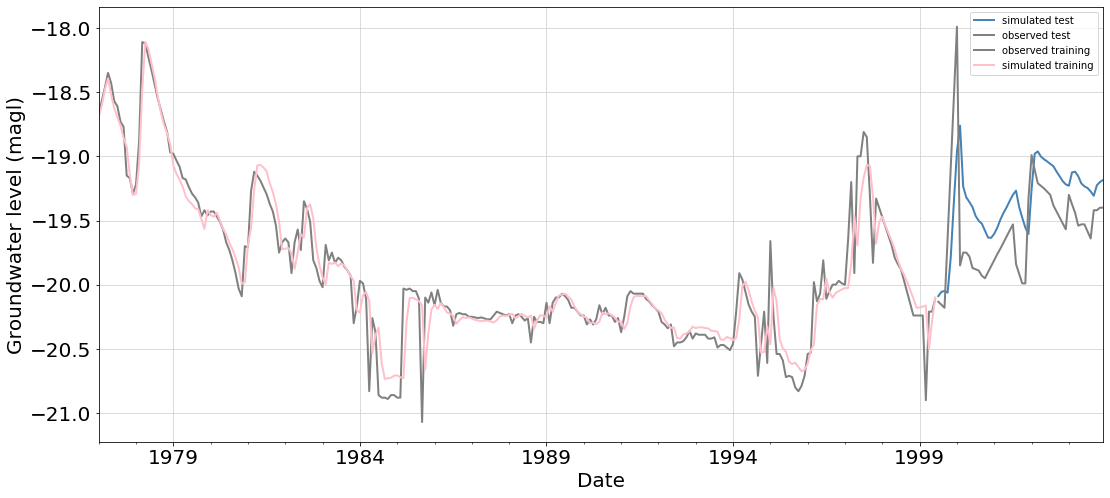

In [106]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [107]:
y_gru = out_df['simulated test']

## Static Models

In [57]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0147']]

In [58]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0147'].values
y = y.reshape(-1,1)

In [59]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(270, 6) (270, 1)
(54, 6) (54, 1)


In [60]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [61]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Running fold 2
(270, 6)
Running fold 3
(270, 6)
Running fold 4
(270, 6)
Running fold 5
(270, 6)
Running fold 6
(270, 6)
Running fold 7
(270, 6)
Running fold 8
(270, 6)
Running fold 9
(270, 6)
Running fold 10
(270, 6)


In [63]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   0.072    0.269  0.502   0.186
1   Iteration_2   0.081    0.285  0.442   0.193
2   Iteration_3   0.086    0.293  0.411   0.205
3   Iteration_4   0.078    0.279  0.464   0.193
4   Iteration_5   0.078    0.280  0.462   0.201
5   Iteration_6   0.082    0.286  0.439   0.198
6   Iteration_7   0.088    0.296  0.397   0.202
7   Iteration_8   0.082    0.286  0.439   0.194
8   Iteration_9   0.082    0.286  0.439   0.193
9  Iteration_10   0.082    0.286  0.436   0.193

In [64]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [65]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[270:324, 6].values

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.443
Mean squared error is: 0.081
Root mean squared error is: 0.285
Mean absolute error is: 0.196


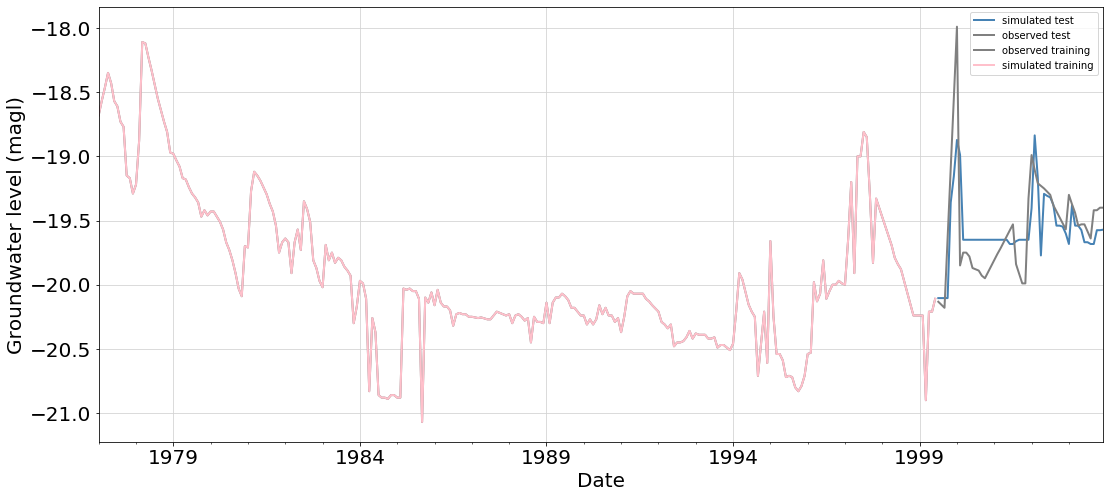

In [66]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [67]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Running fold 2
(270, 6)
Running fold 3
(270, 6)
Running fold 4
(270, 6)
Running fold 5
(270, 6)
Running fold 6
(270, 6)
Running fold 7
(270, 6)
Running fold 8
(270, 6)
Running fold 9
(270, 6)
Running fold 10
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [68]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    0.085     0.292   0.413    0.207
1   Iteration_2    0.085     0.292   0.413    0.207
2   Iteration_3    0.085     0.292   0.413    0.207
3   Iteration_4    0.085     0.292   0.413    0.207
4   Iteration_5    0.085     0.292   0.413    0.207
5   Iteration_6    0.085     0.292   0.413    0.207
6   Iteration_7    0.085     0.292   0.413    0.207
7   Iteration_8    0.085     0.292   0.413    0.207
8   Iteration_9    0.085     0.292   0.413    0.207
9  Iteration_10    0.085     0.292   0.413    0.207

In [69]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [70]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.035
Root mean squared error is: 0.186
Mean absolute error is: 0.113
R^2 score is:  0.898

The model performance for the test set
--------------------------------------
R^2 score is:  0.413
Mean squared error is: 0.085
Root mean squared error is: 0.292
Mean absolute error is: 0.207


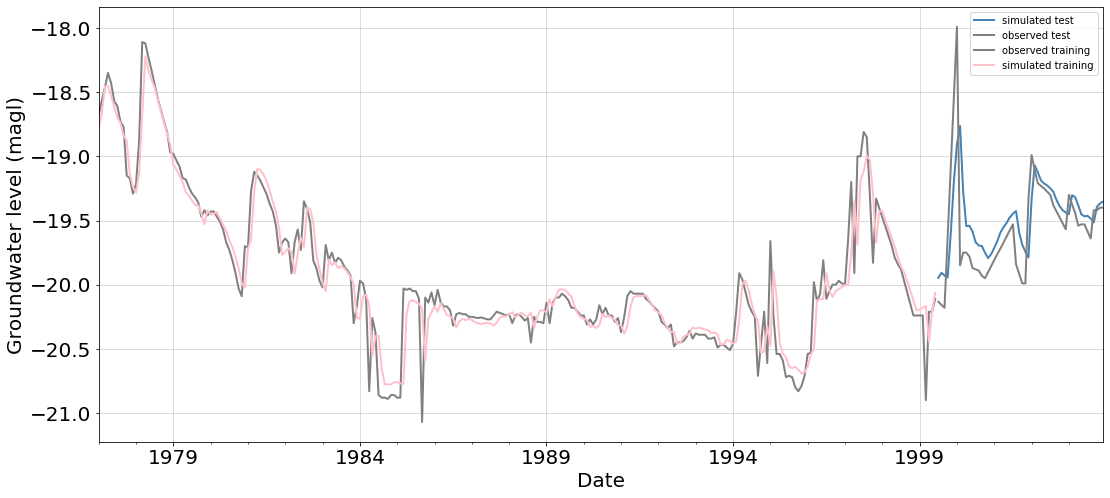

In [71]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Running fold 2
(270, 6)
Running fold 3
(270, 6)
Running fold 4
(270, 6)
Running fold 5
(270, 6)
Running fold 6
(270, 6)
Running fold 7
(270, 6)
Running fold 8
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A colu

Running fold 9
(270, 6)
Running fold 10
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   0.163    0.404 -0.122   0.310
1   Iteration_2   0.162    0.403 -0.117   0.307
2   Iteration_3   0.163    0.404 -0.122   0.309
3   Iteration_4   0.163    0.403 -0.118   0.307
4   Iteration_5   0.164    0.404 -0.124   0.309
5   Iteration_6   0.163    0.404 -0.120   0.309
6   Iteration_7   0.165    0.406 -0.132   0.310
7   Iteration_8   0.163    0.404 -0.122   0.307
8   Iteration_9   0.162    0.403 -0.117   0.309
9  Iteration_10   0.162    0.402 -0.111   0.307

In [74]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [75]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.007
Root mean squared error is: 0.083
Mean absolute error is: 0.056
R^2 score is:  0.98

The model performance for the test set
--------------------------------------
R^2 score is:  -0.12
Mean squared error is: 0.163
Root mean squared error is: 0.404
Mean absolute error is: 0.308


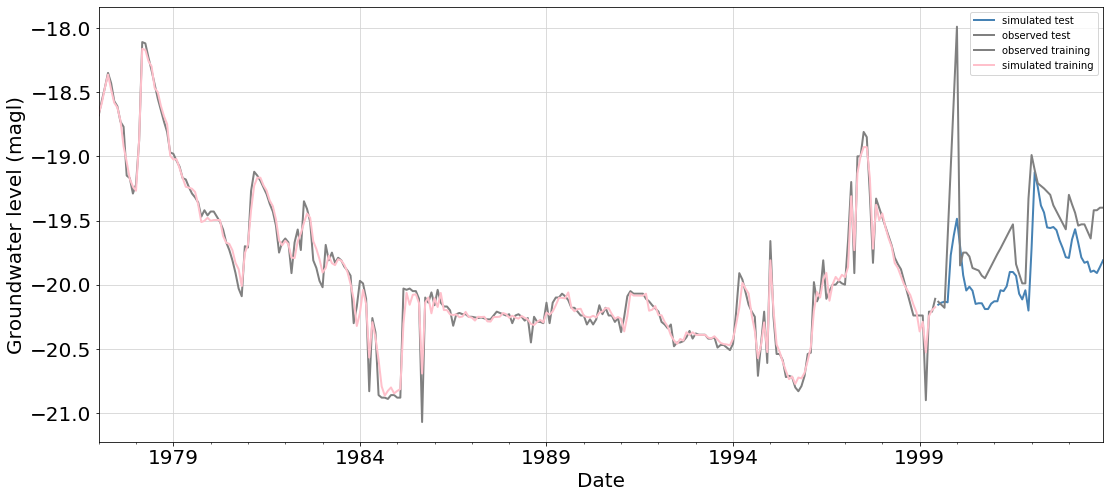

In [76]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Running fold 2
(270, 6)
Running fold 3
(270, 6)
Running fold 4
(270, 6)
Running fold 5
(270, 6)
Running fold 6
(270, 6)
Running fold 7
(270, 6)
Running fold 8
(270, 6)
Running fold 9
(270, 6)
Running fold 10
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

In [78]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   0.101    0.318  0.306   0.196
1   Iteration_2   0.108    0.329  0.257   0.193
2   Iteration_3   0.117    0.342  0.195   0.207
3   Iteration_4   0.102    0.320  0.297   0.187
4   Iteration_5   0.093    0.305  0.362   0.184
5   Iteration_6   0.091    0.301  0.376   0.190
6   Iteration_7   0.087    0.295  0.403   0.175
7   Iteration_8   0.086    0.294  0.406   0.175
8   Iteration_9   0.098    0.313  0.326   0.194
9  Iteration_10   0.095    0.308  0.349   0.183

In [79]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [80]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.007
Root mean squared error is: 0.083
Mean absolute error is: 0.056
R^2 score is:  0.98

The model performance for the test set
--------------------------------------
R^2 score is:  0.328
Mean squared error is: 0.098
Root mean squared error is: 0.312
Mean absolute error is: 0.188


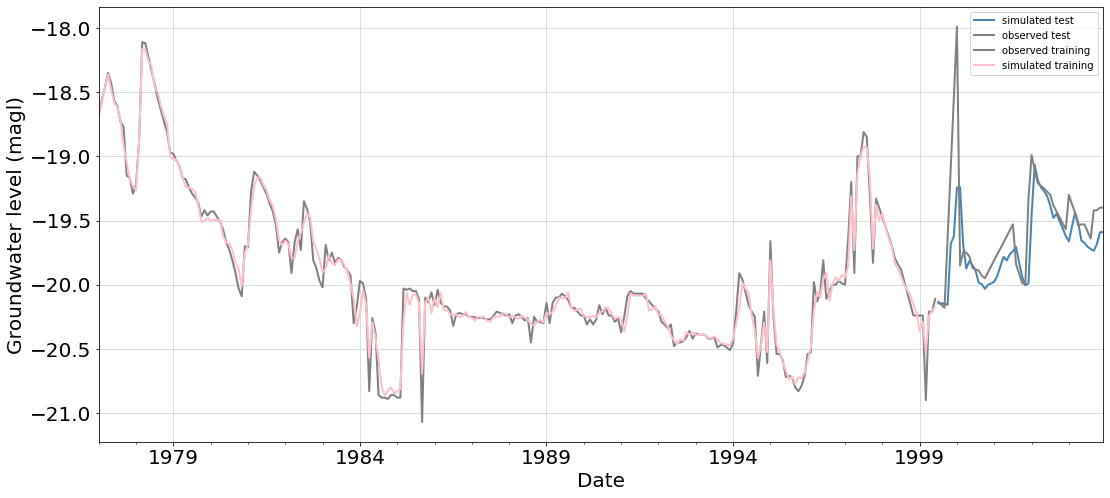

In [81]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [84]:
vs = pd.DataFrame(pima.iloc[270:324, 0].values, columns = ['Observed'],index =pima.iloc[270:324].index)
vs['FFNN'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru

Text(0, 0.5, 'Groundwater levels (magl)')

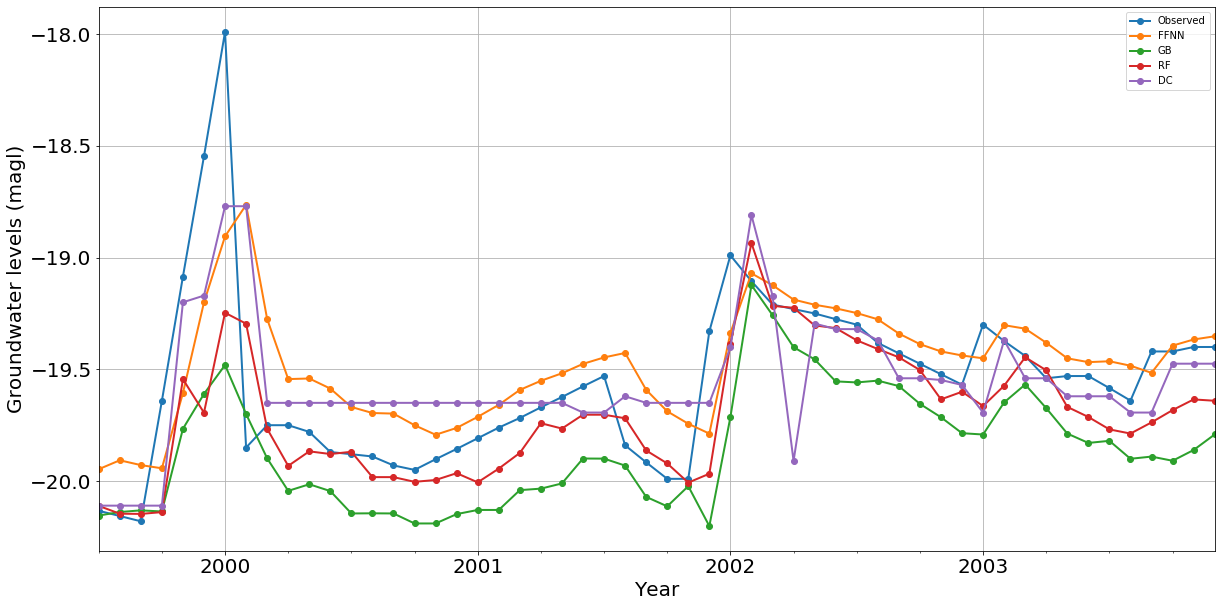

In [85]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)